# 1_Initialization

In [1]:
from safedigital import mechanical as ME  # import mechanical module
from datetime import datetime
from datetime import timedelta
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from MRC.sswgmm_mech import mech_monitor as mm
sns.set(color_codes=True)
cur_directory = r'C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics'
dir_data_washed = (cur_directory + '\\' +
                   '20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000' + '\\'
                   + '1_Data formatted')
dir_data_raw = (cur_directory + '\\' +
                '20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000' + '\\' +
                '0_Data original')
dir_noreclosing_washed = (cur_directory + '\\' +
                          '20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000' + '\\'
                          + '3_Data no reclosing' + '\\' + 'washed')
dir_noreclosing_raw = (cur_directory + '\\' +
                       '20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000' + '\\' +
                       '3_Data no reclosing' + '\\' + 'raw')
path_config = cur_directory + '\\01_Code\\lib\\sswgmm_mech\\config.json'
print(path_config)
# dir_noreclose_washed_loc = (cur_directory + '\\' + 
#                   '20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000' + '\\'
#                   + '3_Data no reclosing' + '\\' + 'washed')

C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\01_Code\lib\sswgmm_mech\config.json


# 2_Data washing
## 2.1_Data re-orgnization
### 2.1.1_All files 
Save every curve into one .csv file

In [2]:
# for all data, split and save each curve into one single .csv file
travel_path_list = []
wave_class_dict = {'角度(合闸).txt': 'travel_close', '角度(分闸).txt': 'travel_open',
                   '合闸电流(合闸).txt': 'current_close', '分闸电流(分闸).txt': 'current_open',
                   '储能电流(储能).txt': 'current_motor'}
for cur_dir, dirs, files in os.walk(dir_data_raw):
    print(cur_dir)
    for wave_class in wave_class_dict.keys():
        if wave_class in files:
            wave_path = os.path.join(cur_dir, wave_class)
            # print(travel_path)
            travel_path_list.append(wave_path)
            with open(wave_path, "r", encoding='utf-8') as f:
                data = f.read()
            wave_list = data.split("WaveID:")
            # since the 1st element is blank, wave data splitting from 2nd element
            for wave_str in wave_list[1:]:
                # extract timestamp to be name of waveform file
                time_stamp_start_idx = wave_str.find('Waveform time:') + len('Waveform time:')
                time_stamp_end_idx = wave_str.find(';Sampling frequency(ms)')
                time_stamp_str = wave_str[time_stamp_start_idx: time_stamp_end_idx]

                # change format of time stamp into 'XX_XX_XX'
                time_stamp_num = time_stamp_str.replace(' ', '_')
                time_stamp_num = time_stamp_num.replace(':', '_')
                time_stamp_num = time_stamp_num.replace('-', '_')

                # extract waveform data
                wave_data_start_idx = wave_str.find('Waveform data:') + len('Waveform data:')
                wave_data_str = wave_str[wave_data_start_idx:]
                wave_data_df = pd.DataFrame({'data': wave_data_str.split(',')})

                # export data into .csv file
                wave_file_name = time_stamp_num + '_' + wave_class_dict[wave_class]
                wave_data_df.to_csv(dir_data_washed + '\\' + wave_file_name + '.csv')


            else:
                pass
    else:
        pass
print(travel_path_list)


C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\0_Data original
C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\0_Data original\20221122-14-43   500 NV
C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\0_Data original\20221122-500--712 HV
C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\0_Data original\20221122-9-48 N
C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\0_Data original\20221123-1000--1287 LV
C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\0_Data original\2022

### 2.1.2_Files without reclosing

In [3]:
ME.DataClean.mconfig_to_csv(dir_noreclosing_raw, dir_noreclosing_washed)

C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\3_Data no reclosing\raw
C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\3_Data no reclosing\raw\20221122-14-43   500 NV
C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\3_Data no reclosing\raw\20221122-500--712 HV
C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\3_Data no reclosing\raw\20221122-9-48 N
C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\3_Data no reclosing\raw\20221123-1000--1287 LV
C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221122_ME_SA12kV_SGCC_VVV_V

### 2.1.3_Fault curves

In [2]:
dir_fault_1 = r'C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\0_Data original\20230104 fault type 1'
dir_fault_2 = r'C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\0_Data original\20230109 fault type 2'
dir_washed_fault_1 = r'C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\4_Fault data\fault 1'
dir_washed_fault_2 = r'C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\4_Fault data\fault 2'
ME.DataClean.mconfig_to_csv(dir_fault_1, dir_washed_fault_1)
ME.DataClean.mconfig_to_csv(dir_fault_2, dir_washed_fault_2)

C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\0_Data original\20230104 fault type 1
['C:\\Users\\cnbofan1\\ABB\\Safe Digital in CN - Documents - Documents\\06_Test and Analytics\\20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\\0_Data original\\20230104 fault type 1\\角度(合闸).txt', 'C:\\Users\\cnbofan1\\ABB\\Safe Digital in CN - Documents - Documents\\06_Test and Analytics\\20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\\0_Data original\\20230104 fault type 1\\角度(分闸).txt', 'C:\\Users\\cnbofan1\\ABB\\Safe Digital in CN - Documents - Documents\\06_Test and Analytics\\20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\\0_Data original\\20230104 fault type 1\\合闸电流(合闸).txt', 'C:\\Users\\cnbofan1\\ABB\\Safe Digital in CN - Documents - Documents\\06_Test and Analytics\\20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\\0_Data original\\20230104 fault type 1\\分闸电流(分闸).txt', 'C:\\Users\\cnbofan1\\ABB\\Safe D

## 2.2_Data preview
### 2.2.1_Travel open with reclosing
#### total plot

number of open trave curves: 15332


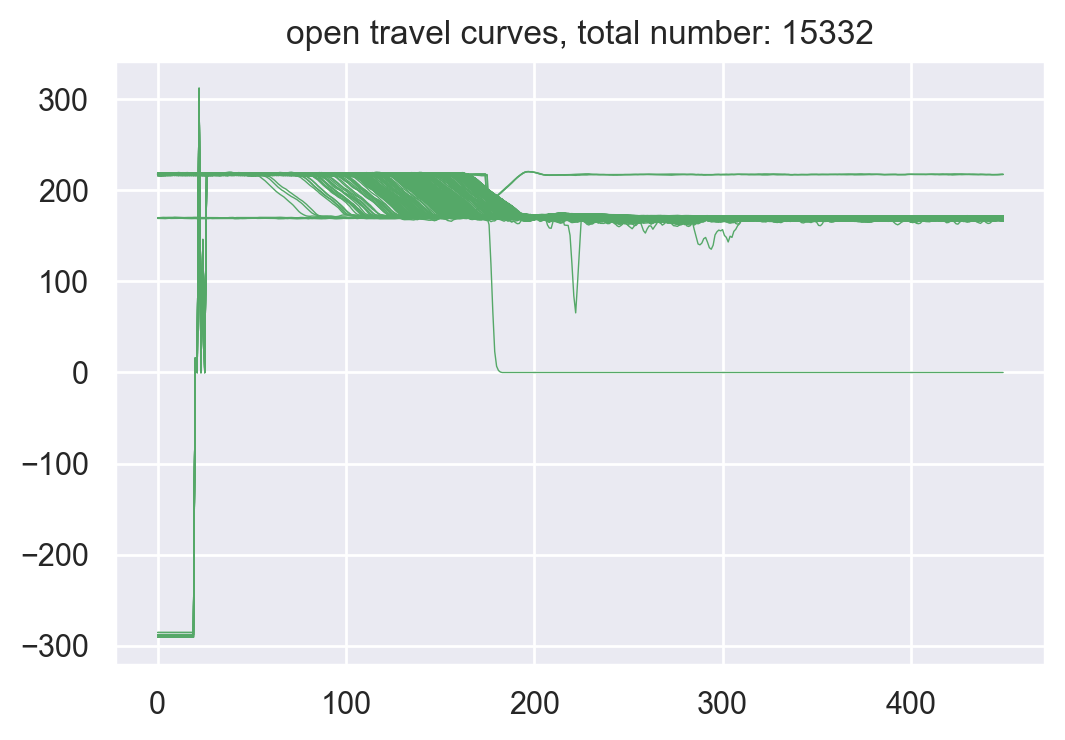

In [4]:
count_travel_open = 0
for cur_dir, dirs, files in os.walk(dir_data_washed):

    # plot open travel curve
    plt.figure(dpi=200)
    for file in files:

        if 'travel_open' in file:
            count_travel_open += 1
            curve_df = pd.read_csv(os.path.join(cur_dir, file), header=0)
            plt.plot(curve_df['data'],
                     c='g',
                     linewidth=0.5)
plt.title('open travel curves, total number: {}'.format(count_travel_open))
print('number of open trave curves:', count_travel_open)


#### plot every 2k

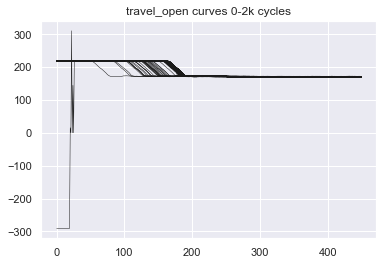

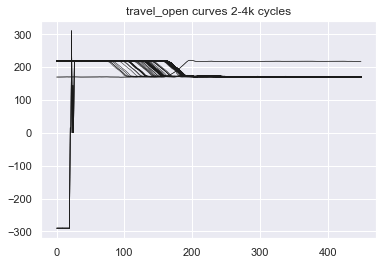

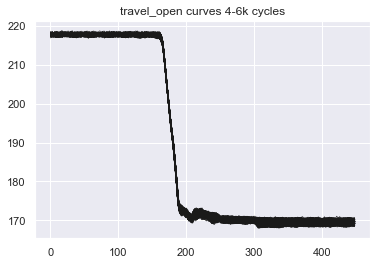

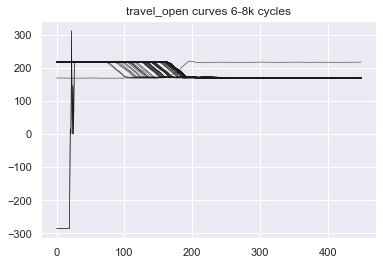

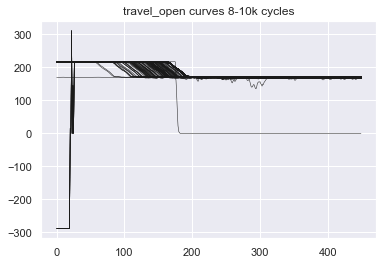

In [5]:
ME.MechOperMconfig.plot_every_2k(dir_data_washed,
                                 'travel_open',
                                 date_time_2k=datetime(2022, 11, 24),
                                 date_time_4k=datetime(2022, 11, 28),
                                 date_time_6k=datetime(2022, 12, 12),
                                 date_time_8k=datetime(2022, 12, 14),
                                 date_time_10k=datetime(2022, 12, 16),
                                 )

### 2.2.2_Travel close with reclosing
#### total plot

number of close trave curves: 15977


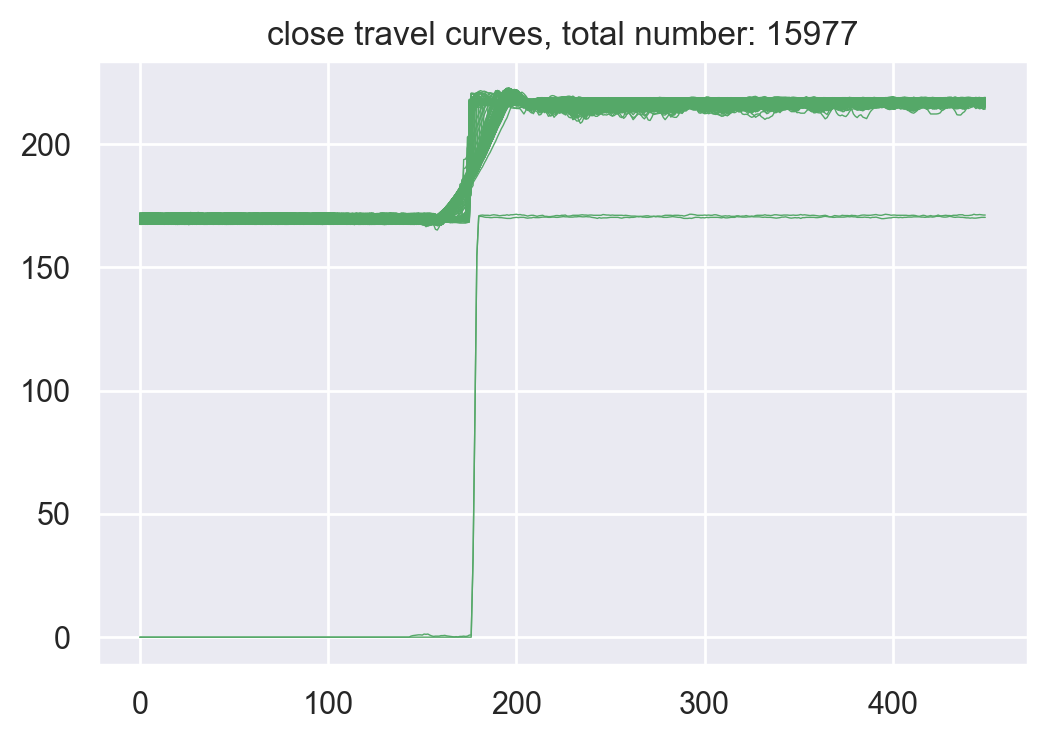

In [6]:
count_travel_close = 0
for cur_dir, dirs, files in os.walk(dir_data_washed):

    # plot open travel curve
    plt.figure(dpi=200)
    for file in files:

        if 'travel_close' in file:
            count_travel_close += 1
            curve_df = pd.read_csv(os.path.join(cur_dir, file), header=0)
            plt.plot(curve_df['data'],
                     c='g',
                     linewidth=0.5)
plt.title('close travel curves, total number: {}'.format(count_travel_close))
print('number of close trave curves:', count_travel_close)

#### plot every 2K

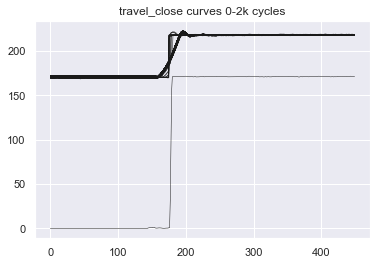

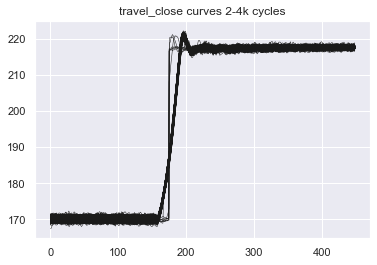

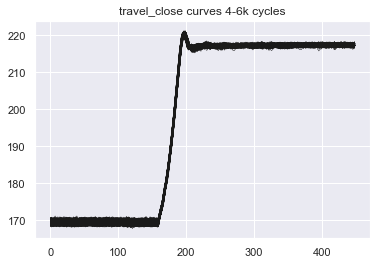

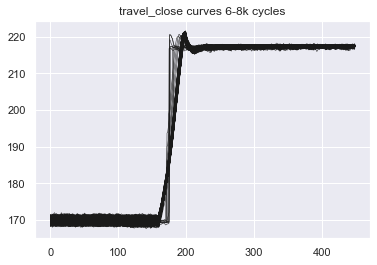

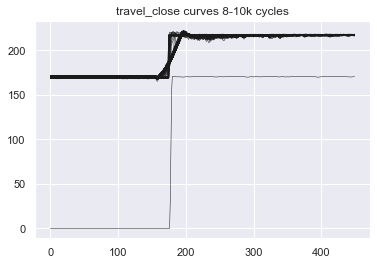

In [7]:
ME.MechOperMconfig.plot_every_2k(dir_data_washed,
                                 'travel_close',
                                 date_time_2k=datetime(2022, 11, 24),
                                 date_time_4k=datetime(2022, 11, 28),
                                 date_time_6k=datetime(2022, 12, 12),
                                 date_time_8k=datetime(2022, 12, 14),
                                 date_time_10k=datetime(2022, 12, 16),

                                 )

### 2.2.3_Current_open with reclosing
#### total plot

invalid curve file name: 2022_11_24_11_47_9_257_current_open.csv
invalid curve file name: 2022_11_24_11_52_7_630_current_open.csv
invalid curve file name: 2022_11_24_12_23_54_564_current_open.csv
invalid curve file name: 2022_11_24_12_6_1_599_current_open.csv
invalid curve file name: 2022_11_24_12_8_0_233_current_open.csv
invalid curve file name: 2022_11_24_13_14_34_73_current_open.csv
invalid curve file name: 2022_11_24_13_17_32_942_current_open.csv
invalid curve file name: 2022_11_24_13_3_38_958_current_open.csv
invalid curve file name: 2022_11_24_13_7_36_63_current_open.csv
invalid curve file name: 2022_11_24_14_13_11_558_current_open.csv
invalid curve file name: 2022_11_24_14_38_1_648_current_open.csv
invalid curve file name: 2022_11_24_14_55_54_815_current_open.csv
invalid curve file name: 2022_11_28_10_0_50_998_current_open.csv
invalid curve file name: 2022_11_28_10_27_49_473_current_open.csv
invalid curve file name: 2022_11_28_10_35_16_285_current_open.csv
invalid curve file nam

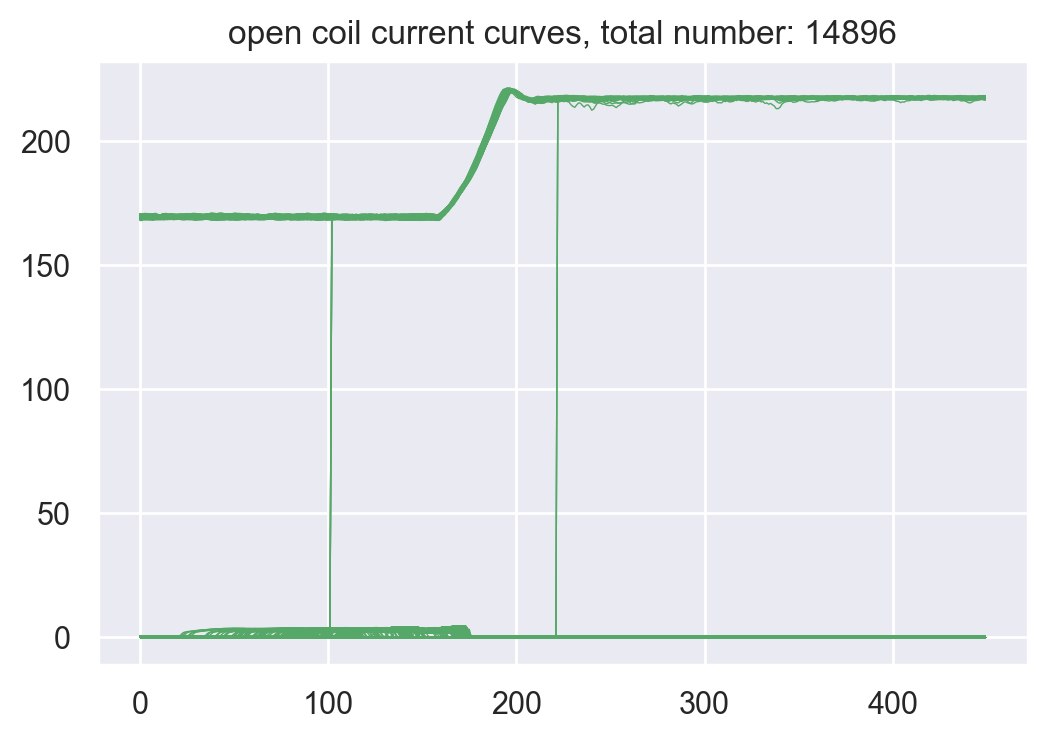

In [8]:
count_current_open = 0
for cur_dir, dirs, files in os.walk(dir_data_washed):

    # plot open travel curve
    plt.figure(dpi=200)
    for file in files:

        if 'current_open' in file:
            count_current_open += 1
            curve_df = pd.read_csv(os.path.join(cur_dir, file), header=0)
            plt.plot(curve_df['data'],
                     c='g',
                     linewidth=0.5)
            if np.mean(curve_df['data']) >= 50:
                print('invalid curve file name:', file)
plt.title('open coil current curves, total number: {}'.format(count_current_open))
print('number of open coil current curves:', count_current_open)

#### plot every 2k

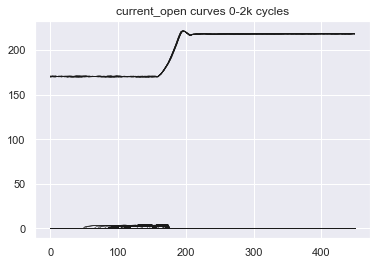

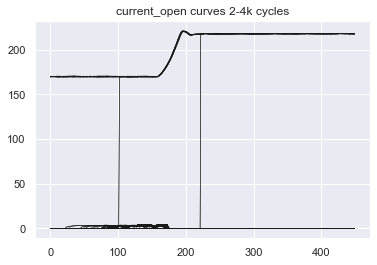

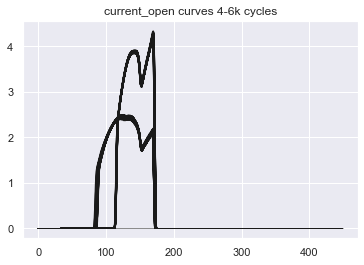

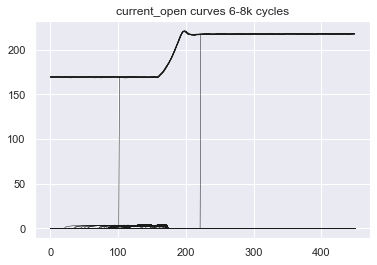

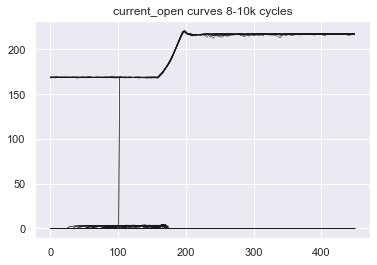

In [9]:
ME.MechOperMconfig.plot_every_2k(dir_data_washed,
                                 'current_open',
                                 date_time_2k=datetime(2022, 11, 24),
                                 date_time_4k=datetime(2022, 11, 28),
                                 date_time_6k=datetime(2022, 12, 12),
                                 date_time_8k=datetime(2022, 12, 14),
                                 date_time_10k=datetime(2022, 12, 16),
                                 )

#### invalid curve plot

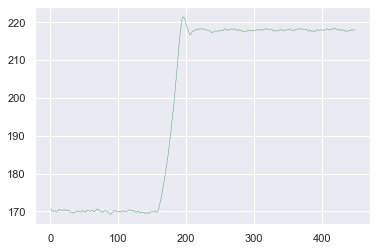

In [10]:
file = '2022_11_24_11_47_9_257_current_open.csv'
curve_df_test = pd.read_csv(os.path.join(cur_dir, file), header=0)
plt.plot(curve_df_test['data'],
         c='g',
         linewidth=0.5)

### 2.2.4_Current_close  with reclosing
#### total plot

number of close coil current curves: 15629


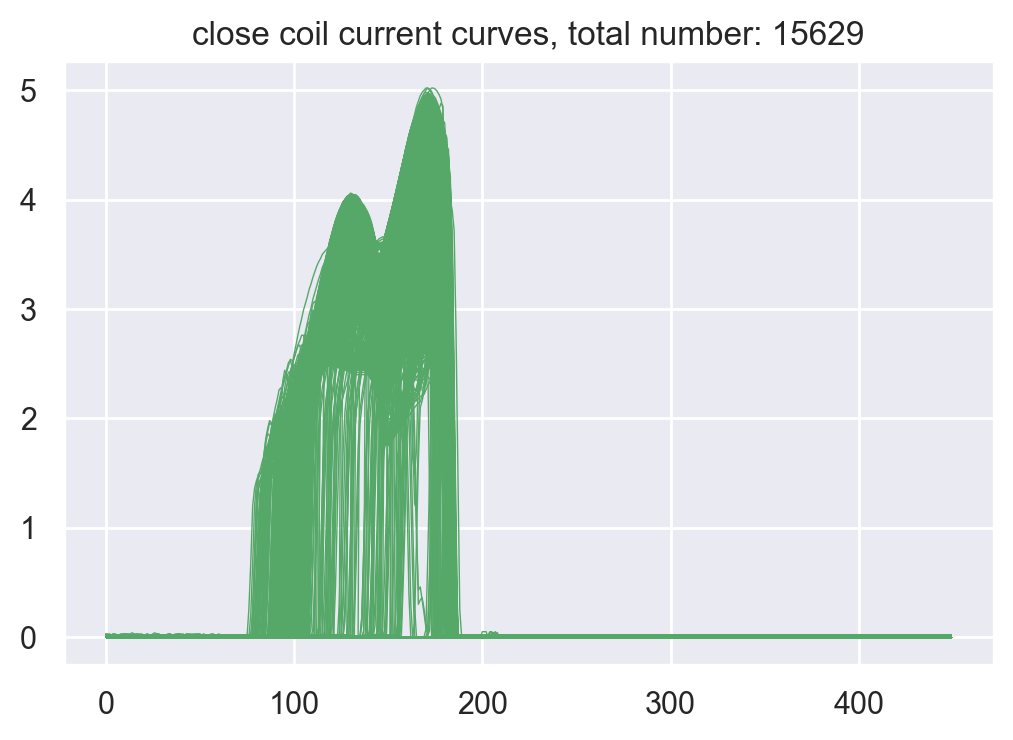

In [11]:
count_current_close = 0
for cur_dir, dirs, files in os.walk(dir_data_washed):

    # plot close coil current curve
    plt.figure(dpi=200)
    for file in files:

        if 'current_close' in file:
            count_current_close += 1
            curve_df = pd.read_csv(os.path.join(cur_dir, file), header=0)
            plt.plot(curve_df['data'],
                     c='g',
                     linewidth=0.5)
            # if np.mean(curve_df['data']) >= 50:
            #     print('invalid curve file name:', file)
plt.title('close coil current curves, total number: {}'.format(count_current_close))
print('number of close coil current curves:', count_current_close)

#### plot every 2k

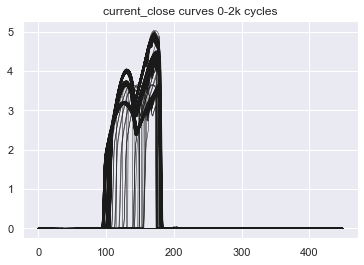

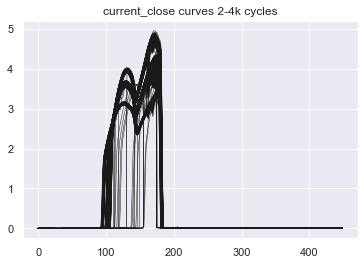

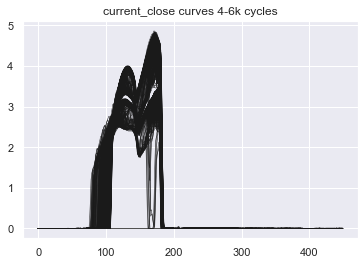

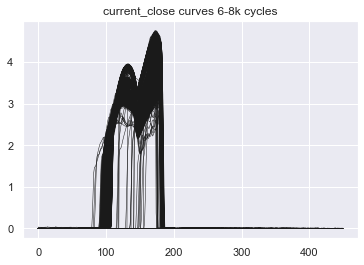

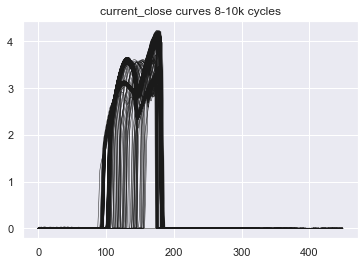

In [12]:
ME.MechOperMconfig.plot_every_2k(dir_data_washed,
                                 'current_close',
                                 date_time_2k=datetime(2022, 11, 24),
                                 date_time_4k=datetime(2022, 11, 28),
                                 date_time_6k=datetime(2022, 12, 12),
                                 date_time_8k=datetime(2022, 12, 14),
                                 date_time_10k=datetime(2022, 12, 16),
                                 )

### 2.2.5_Travel open without reclosing
#### plot every 2k

number of travel_open curves: 3734


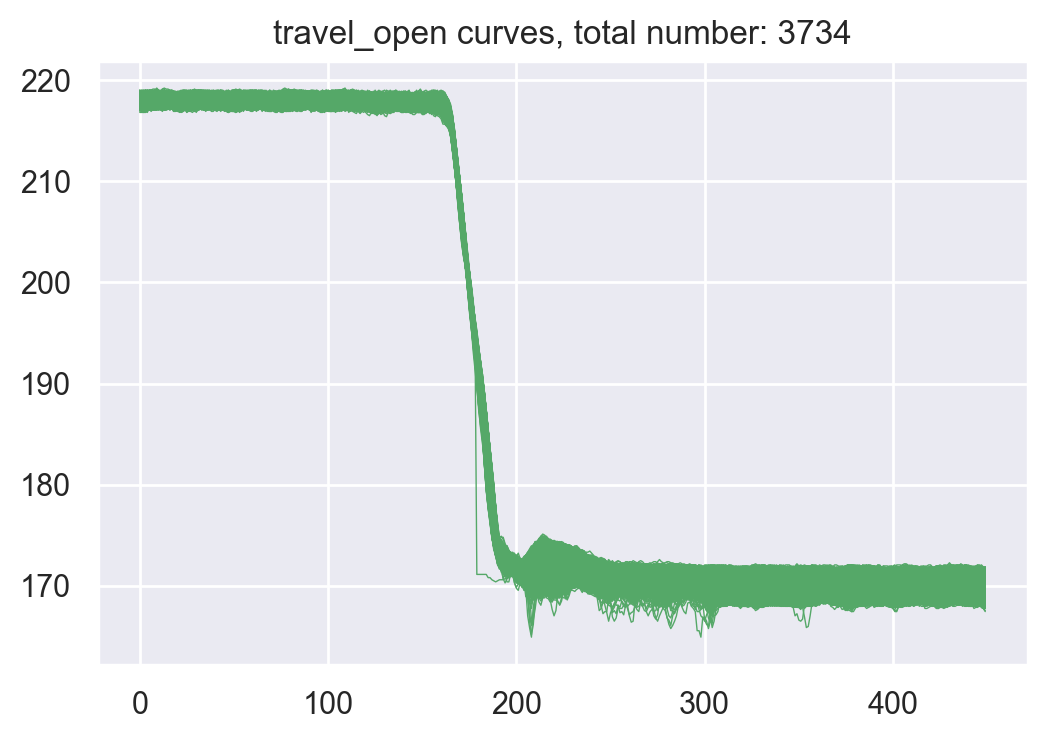

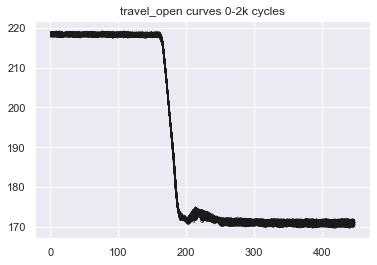

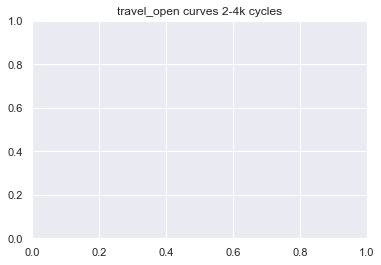

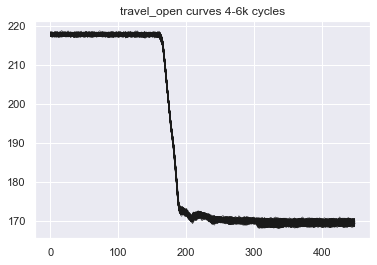

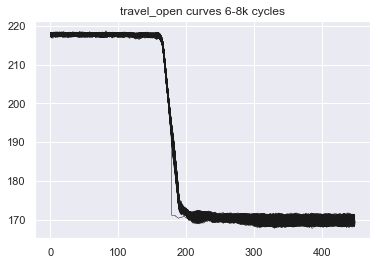

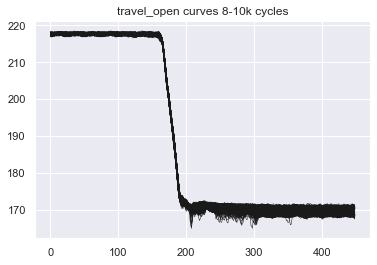

In [2]:
ME.MechOperMconfig.plot_all_csv(dir_noreclosing_washed, 'travel_open')
ME.MechOperMconfig.plot_every_2k(dir_noreclosing_washed,
                                 'travel_open',
                                 date_time_2k=datetime(2022, 11, 24),
                                 date_time_4k=datetime(2022, 11, 28),
                                 date_time_6k=datetime(2022, 12, 12),
                                 date_time_8k=datetime(2022, 12, 14),
                                 date_time_10k=datetime(2022, 12, 16),
                                 )

#### single plot

### 2.2.6_Travel close without reclosing

number of travel_close curves: 3733


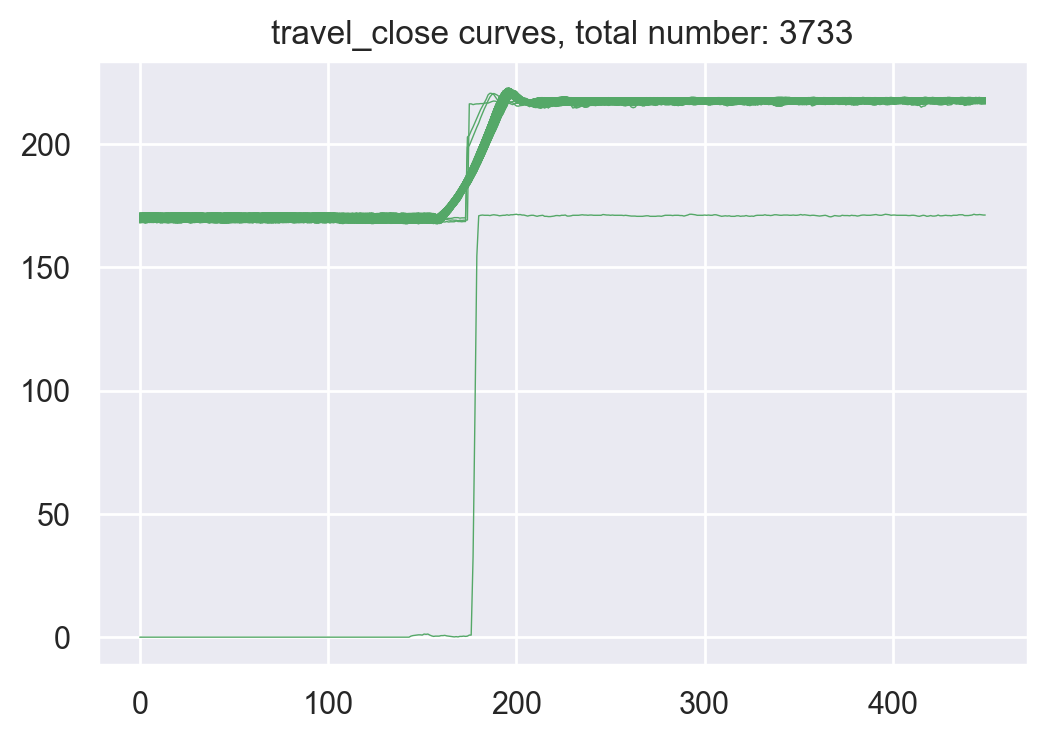

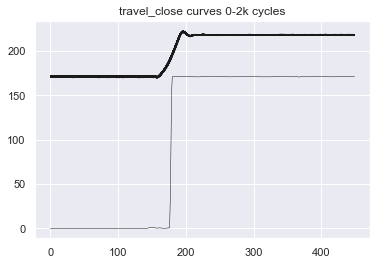

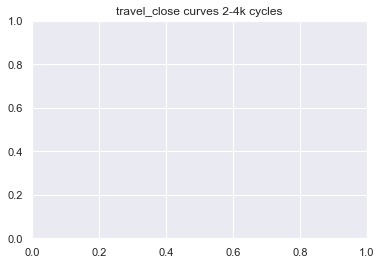

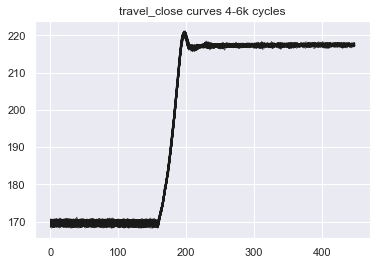

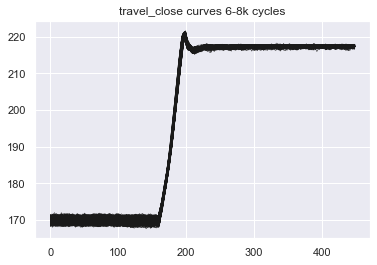

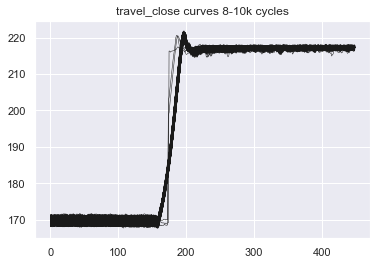

In [14]:
ME.MechOperMconfig.plot_all_csv(dir_noreclosing_washed, 'travel_close')
ME.MechOperMconfig.plot_every_2k(dir_noreclosing_washed,
                                 'travel_close',
                                 date_time_2k=datetime(2022, 11, 24),
                                 date_time_4k=datetime(2022, 11, 28),
                                 date_time_6k=datetime(2022, 12, 12),
                                 date_time_8k=datetime(2022, 12, 14),
                                 date_time_10k=datetime(2022, 12, 16),
                                 )

### 2.2.7_Current open without reclosing
#### plot every 2k

number of current_open curves: 3736


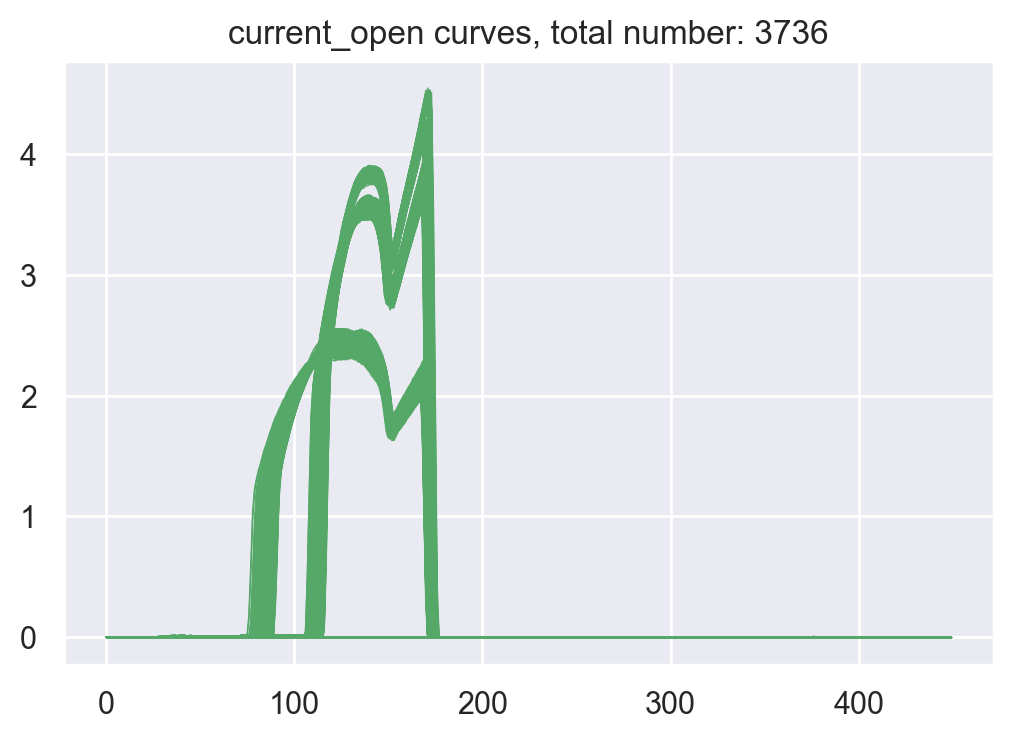

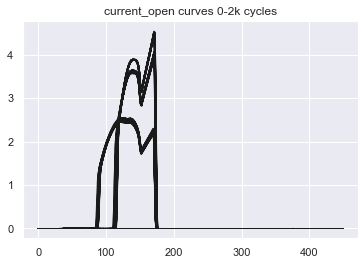

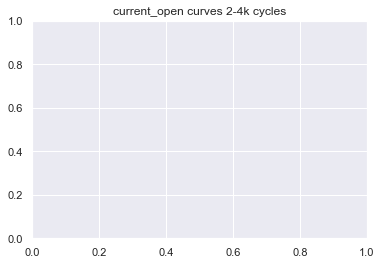

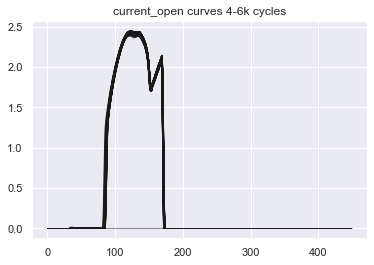

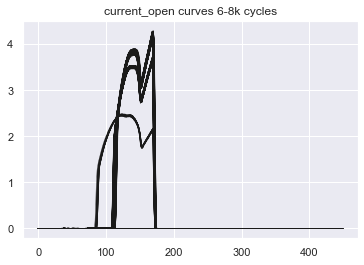

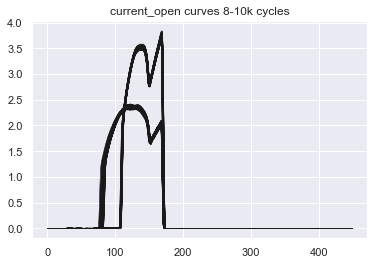

In [15]:
ME.MechOperMconfig.plot_all_csv(dir_noreclosing_washed, 'current_open')
ME.MechOperMconfig.plot_every_2k(dir_noreclosing_washed,
                                 'current_open',
                                 date_time_2k=datetime(2022, 11, 24),
                                 date_time_4k=datetime(2022, 11, 28),
                                 date_time_6k=datetime(2022, 12, 12),
                                 date_time_8k=datetime(2022, 12, 14),
                                 date_time_10k=datetime(2022, 12, 16),
                                 )

#### single plot

number of current_open curves: 1


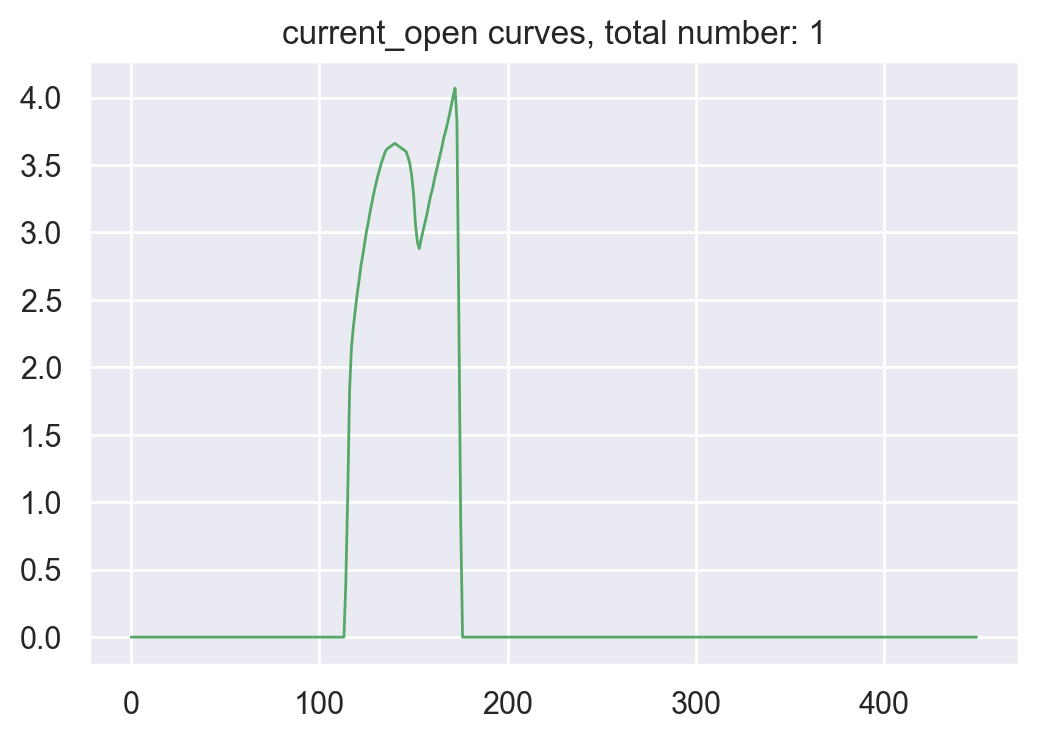

In [2]:
ME.MechOperMconfig.plot_all_csv(dir_noreclosing_washed,
                                'current_open',
                                start_ix=0,
                                end_ix=5,
                                linew=1)

### 2.2.8_Current close without reclosing 

number of current_close curves: 3732


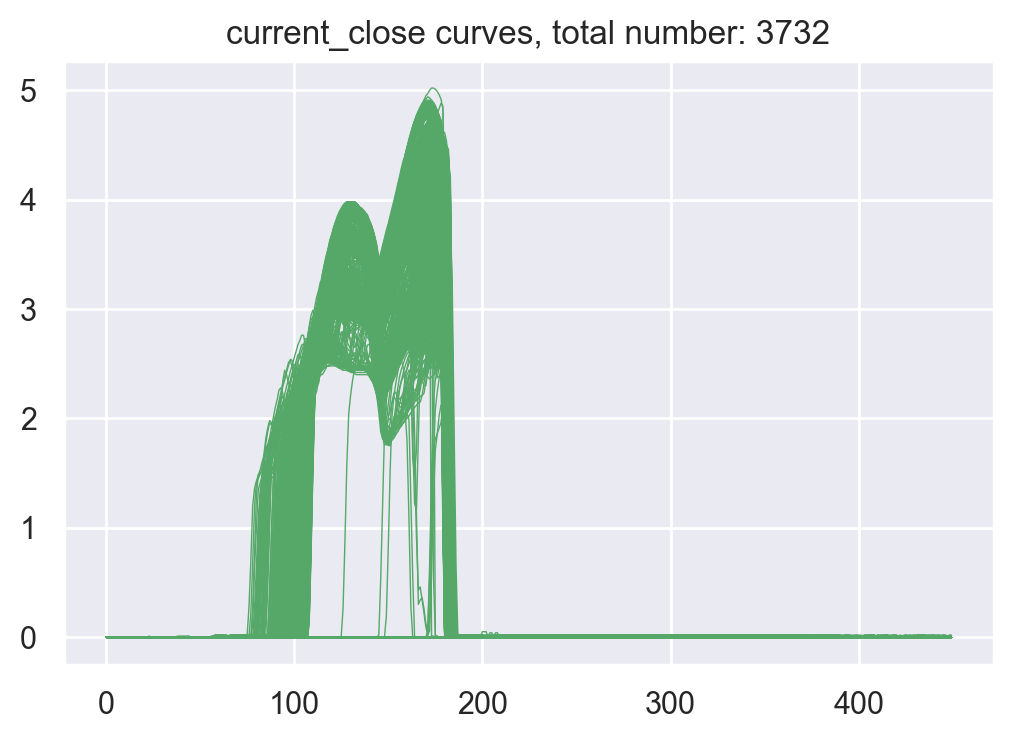

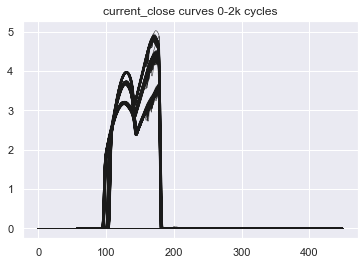

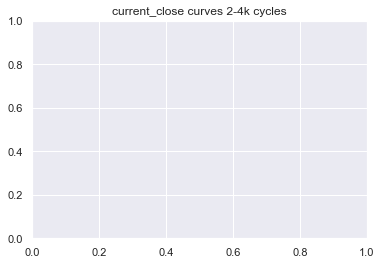

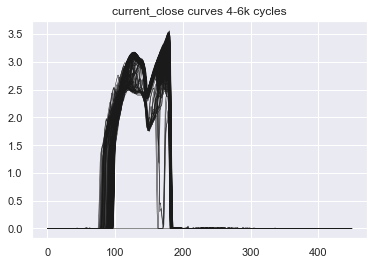

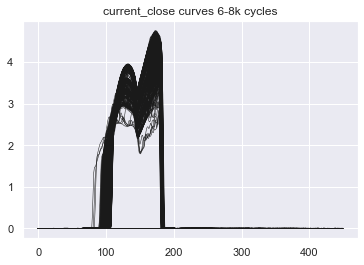

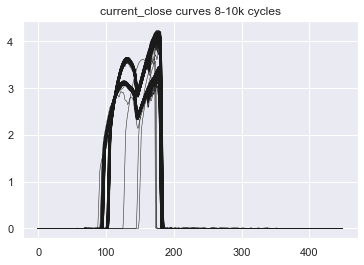

In [16]:
ME.MechOperMconfig.plot_all_csv(dir_noreclosing_washed, 'current_close')
ME.MechOperMconfig.plot_every_2k(dir_noreclosing_washed,
                                 'current_close',
                                 date_time_2k=datetime(2022, 11, 24),
                                 date_time_4k=datetime(2022, 11, 28),
                                 date_time_6k=datetime(2022, 12, 12),
                                 date_time_8k=datetime(2022, 12, 14),
                                 date_time_10k=datetime(2022, 12, 16),
                                 )

### 2.2.9_Motor_current

invalid curve file name: 2022_11_22_8_58_15_575_current_motor.csv
invalid curve file name: 2022_11_22_8_58_48_551_current_motor.csv
invalid curve file name: 2022_11_22_8_58_55_983_current_motor.csv
invalid curve file name: 2022_11_22_8_58_9_823_current_motor.csv
invalid curve file name: 2022_11_22_8_59_28_441_current_motor.csv
invalid curve file name: 2022_11_22_8_59_34_772_current_motor.csv
invalid curve file name: 2022_11_22_9_0_13_462_current_motor.csv
invalid curve file name: 2022_11_22_9_0_46_79_current_motor.csv
invalid curve file name: 2022_11_22_9_0_52_210_current_motor.csv
invalid curve file name: 2022_11_22_9_0_7_234_current_motor.csv
invalid curve file name: 2022_11_22_9_10_2_251_current_motor.csv
invalid curve file name: 2022_11_22_9_10_35_27_current_motor.csv
invalid curve file name: 2022_11_22_9_10_41_64_current_motor.csv
invalid curve file name: 2022_11_22_9_11_15_796_current_motor.csv
invalid curve file name: 2022_11_22_9_11_21_927_current_motor.csv
invalid curve file n

c:\users\cnbofan1\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


invalid curve file name: 2022_11_22_9_13_52_18_current_motor.csv
invalid curve file name: 2022_11_22_9_13_58_63_current_motor.csv
invalid curve file name: 2022_11_22_9_14_31_755_current_motor.csv
invalid curve file name: 2022_11_22_9_14_37_785_current_motor.csv
invalid curve file name: 2022_11_22_9_15_10_542_current_motor.csv
invalid curve file name: 2022_11_22_9_15_16_571_current_motor.csv
invalid curve file name: 2022_11_22_9_15_50_348_current_motor.csv
invalid curve file name: 2022_11_22_9_15_55_279_current_motor.csv
invalid curve file name: 2022_11_22_9_16_29_155_current_motor.csv
invalid curve file name: 2022_11_22_9_16_35_87_current_motor.csv
invalid curve file name: 2022_11_22_9_17_14_878_current_motor.csv
invalid curve file name: 2022_11_22_9_17_47_755_current_motor.csv
invalid curve file name: 2022_11_22_9_17_53_685_current_motor.csv
invalid curve file name: 2022_11_22_9_17_8_943_current_motor.csv
invalid curve file name: 2022_11_22_9_18_27_522_current_motor.csv
invalid curve 

Text(0.5, 1.0, 'motor current curves, total number: 3795')

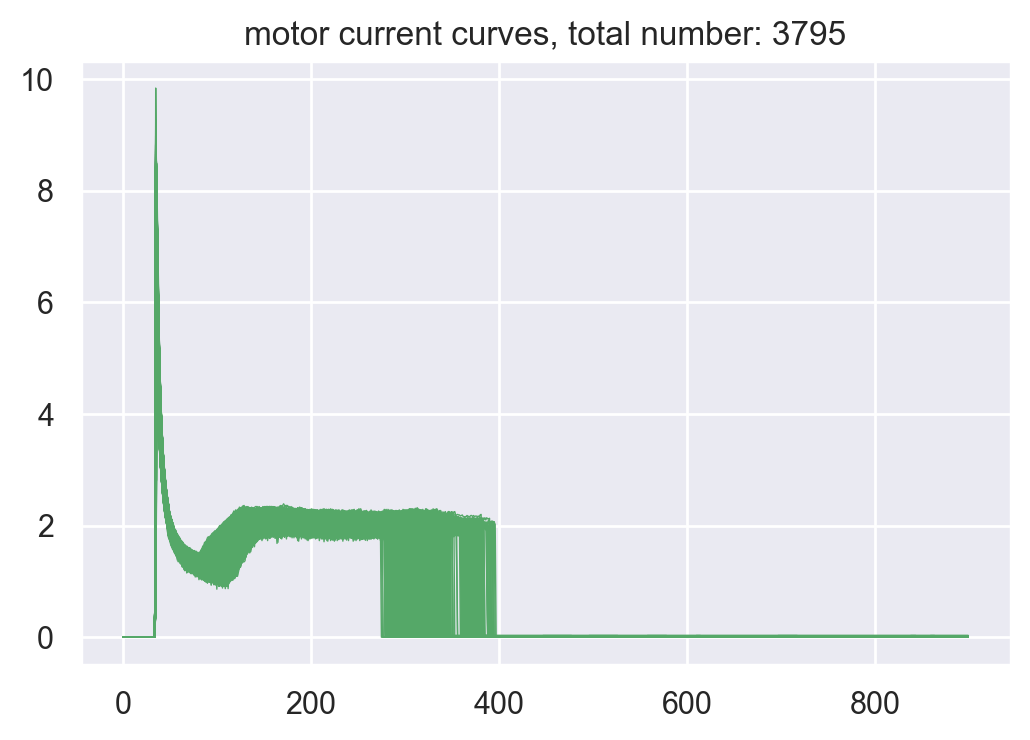

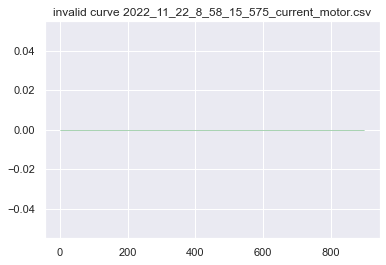

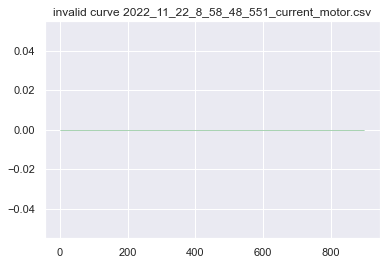

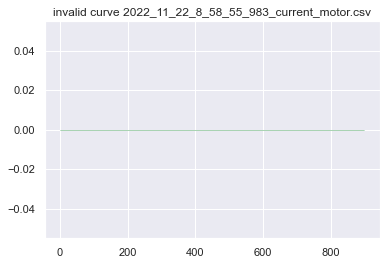

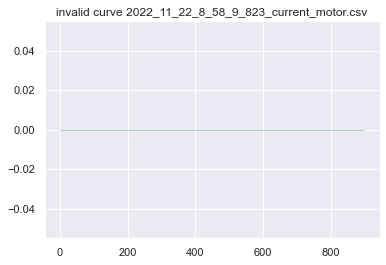

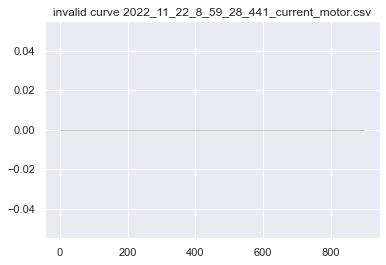

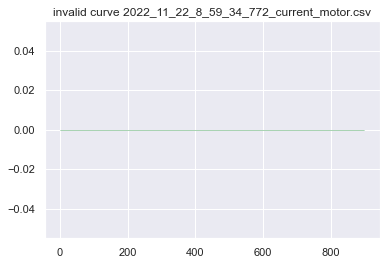

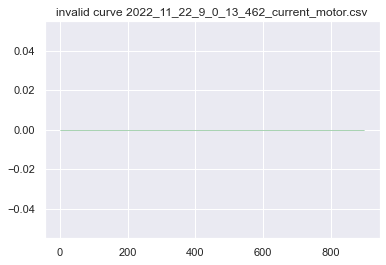

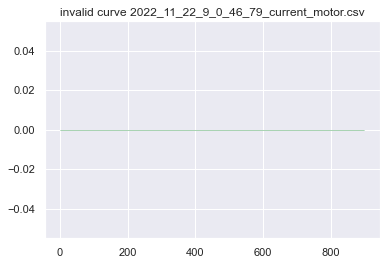

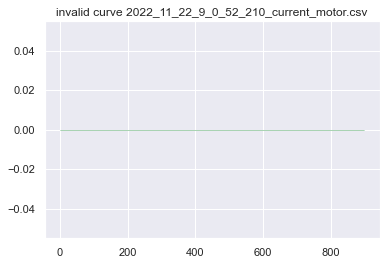

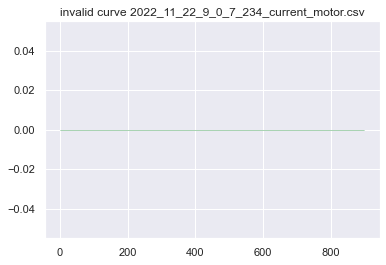

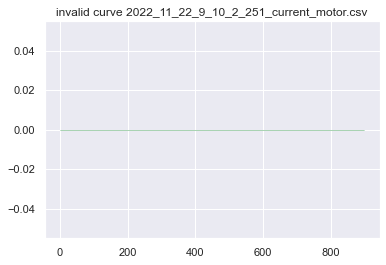

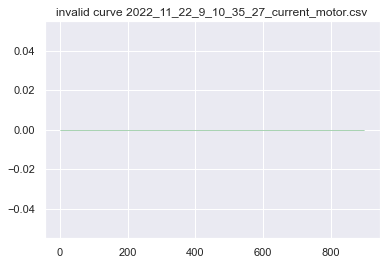

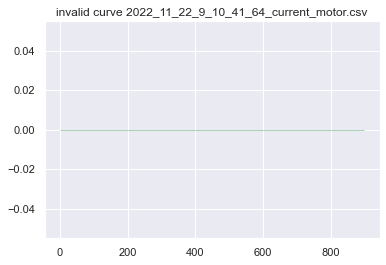

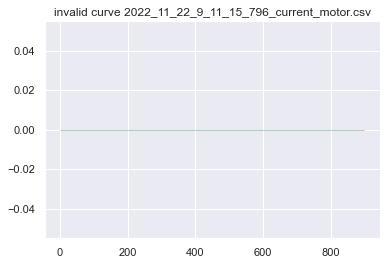

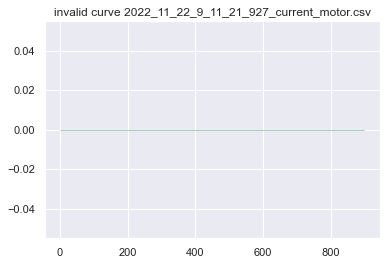

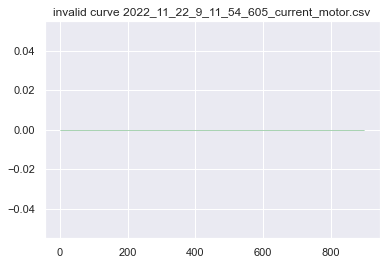

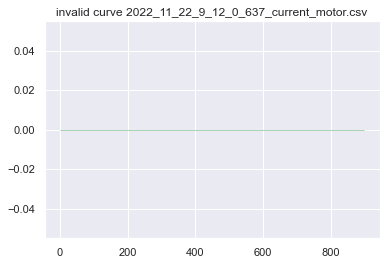

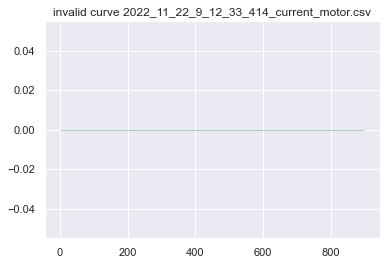

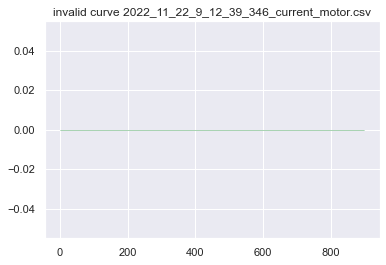

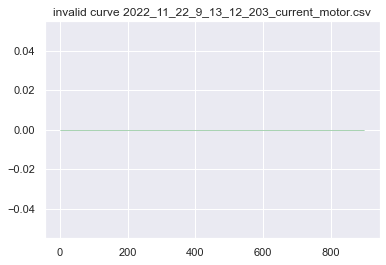

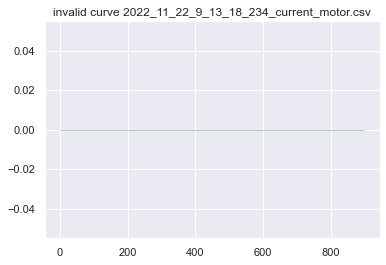

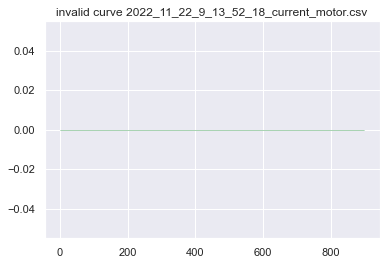

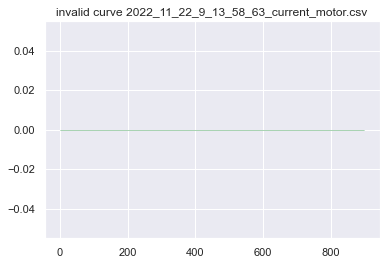

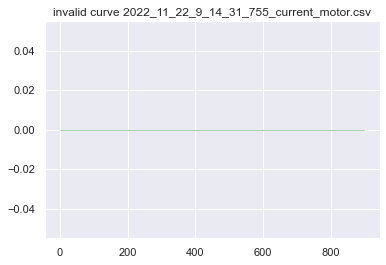

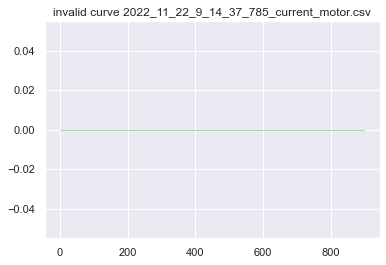

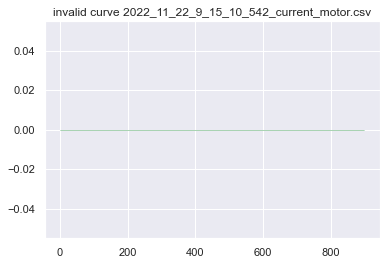

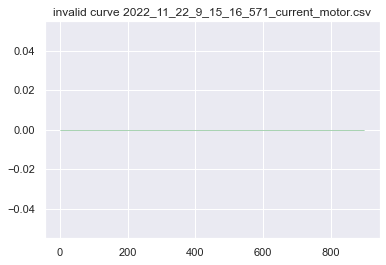

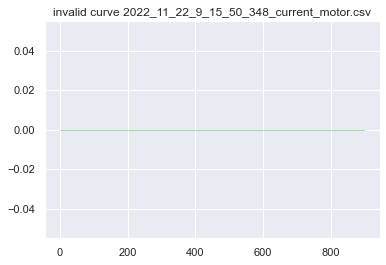

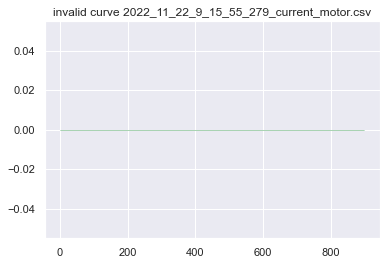

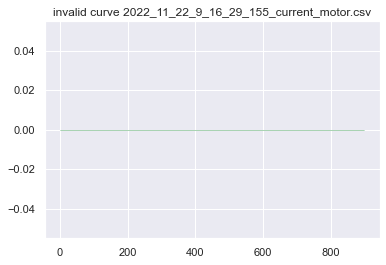

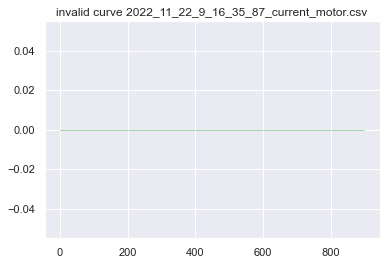

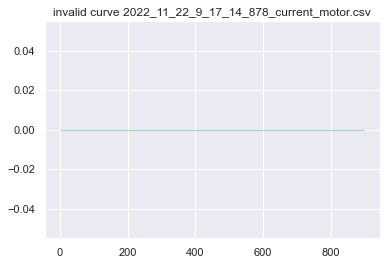

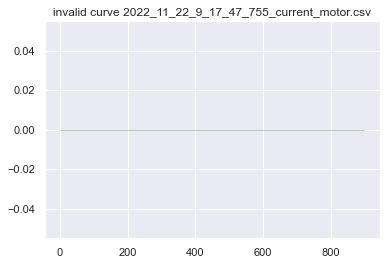

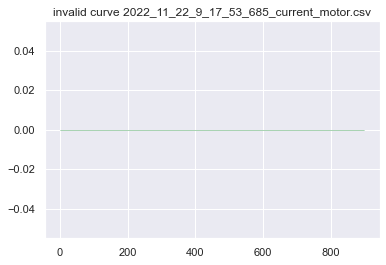

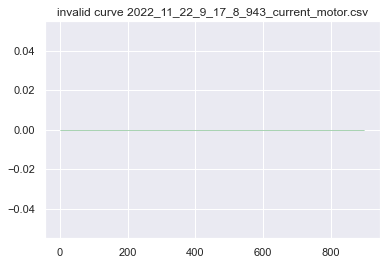

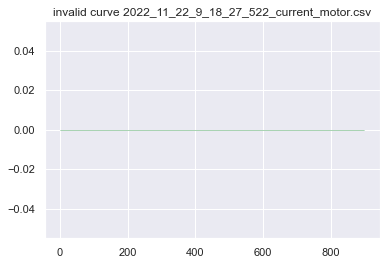

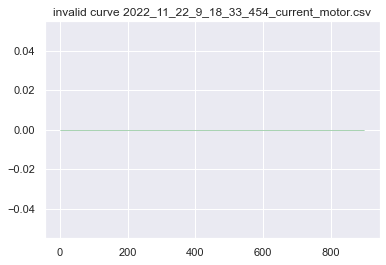

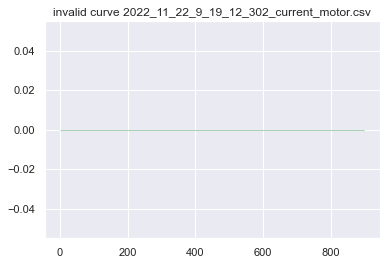

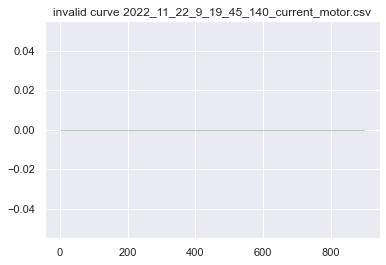

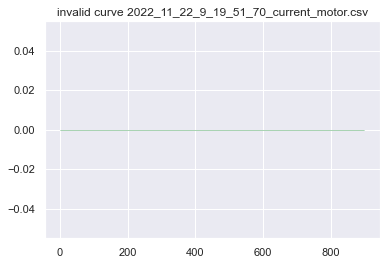

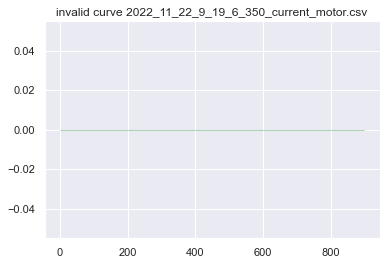

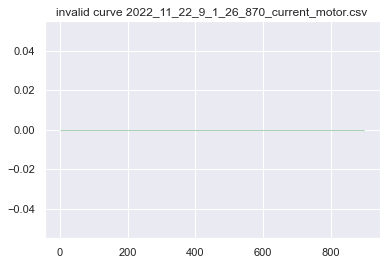

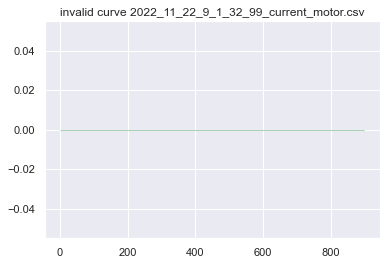

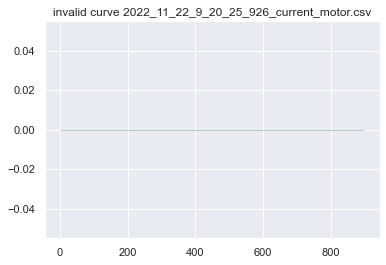

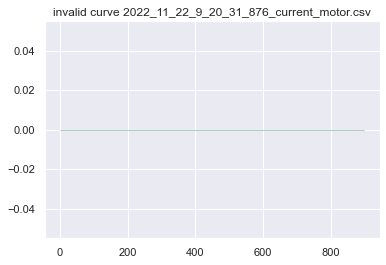

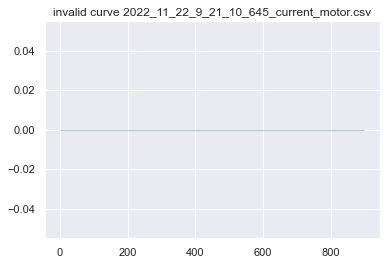

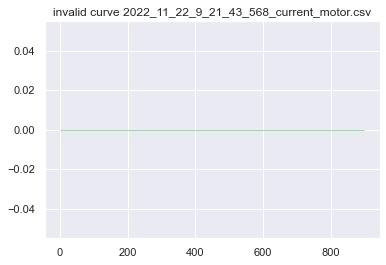

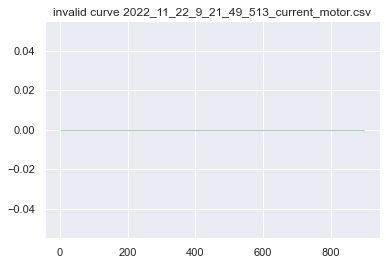

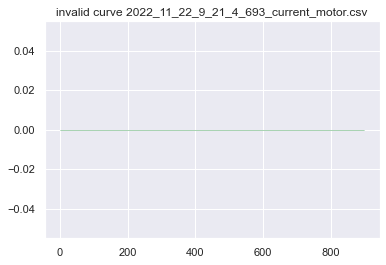

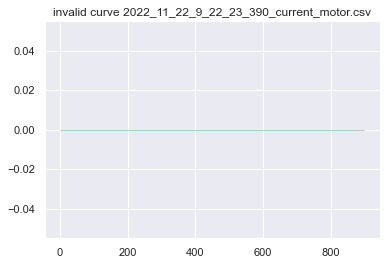

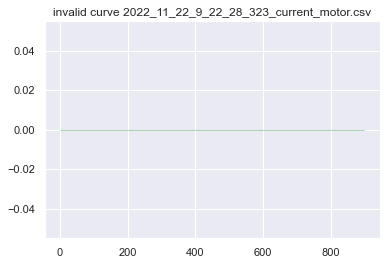

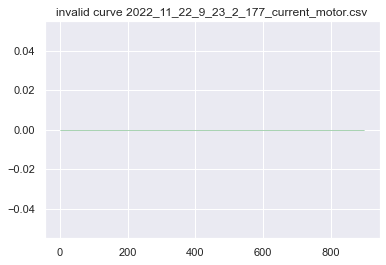

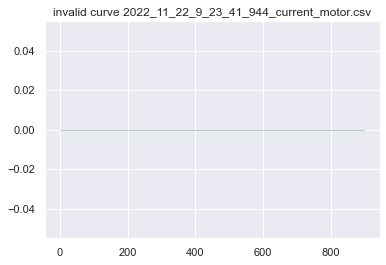

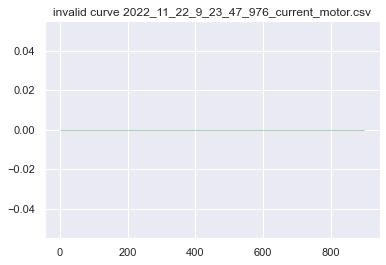

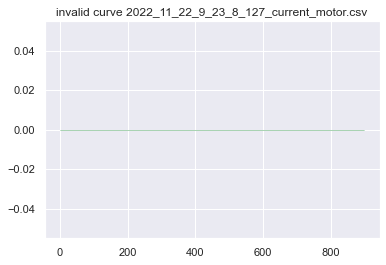

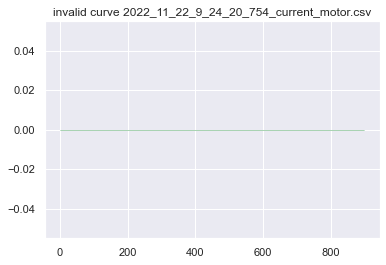

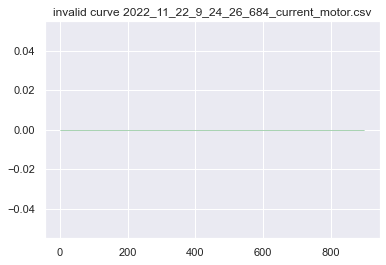

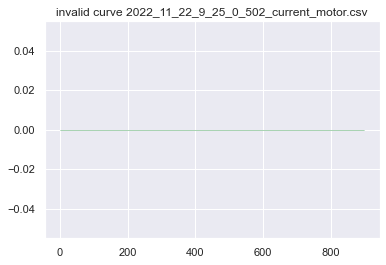

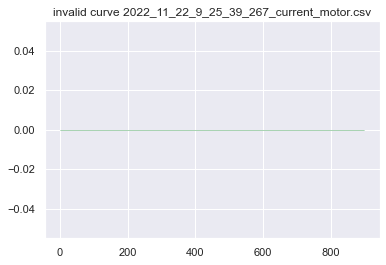

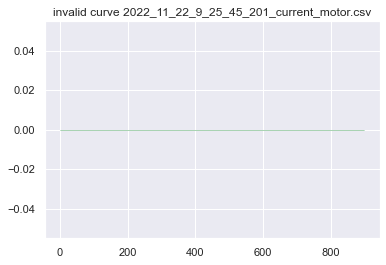

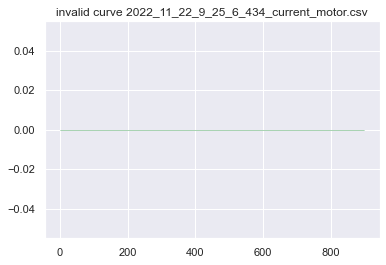

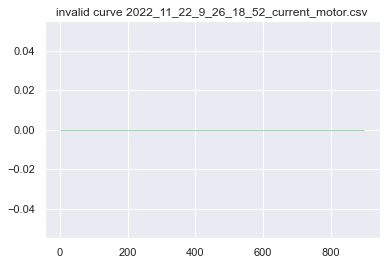

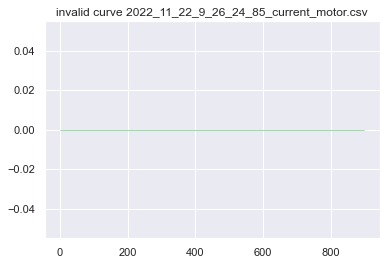

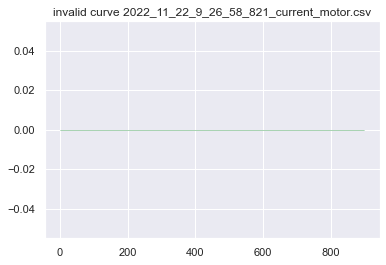

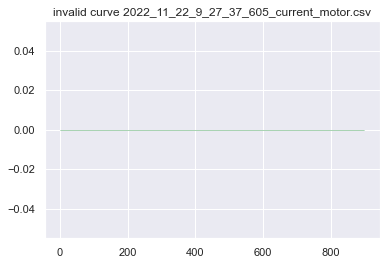

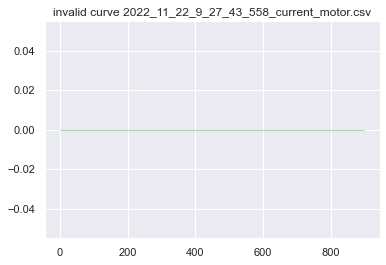

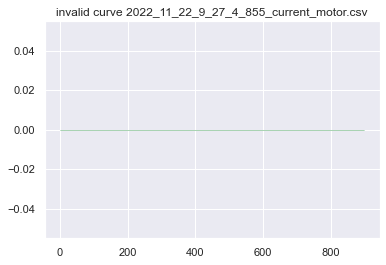

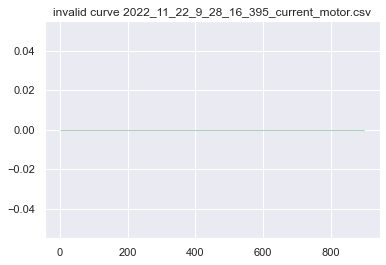

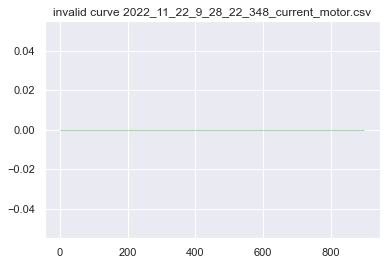

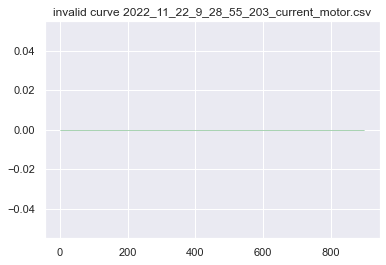

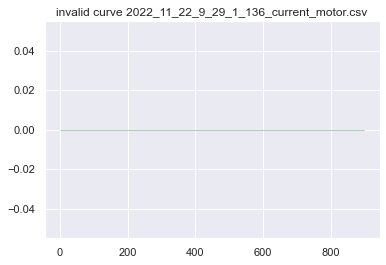

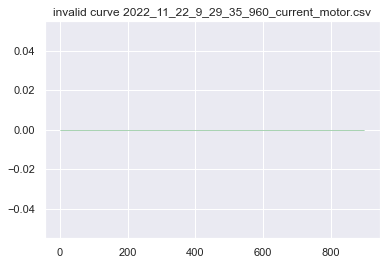

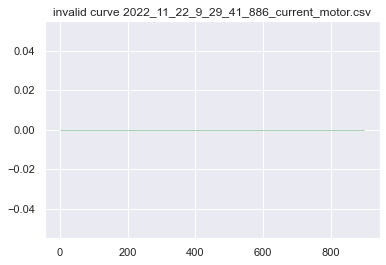

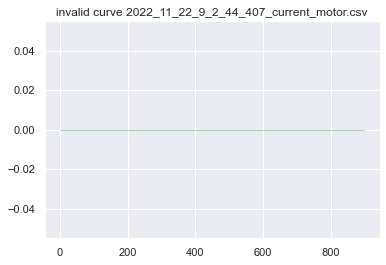

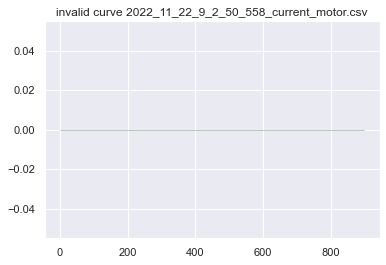

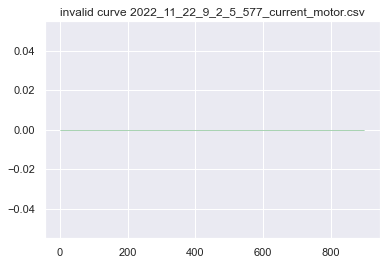

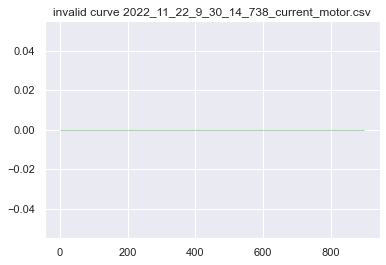

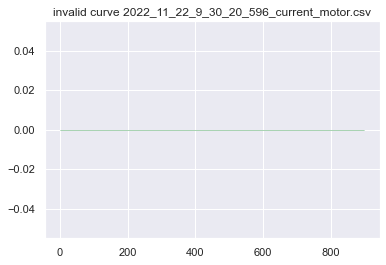

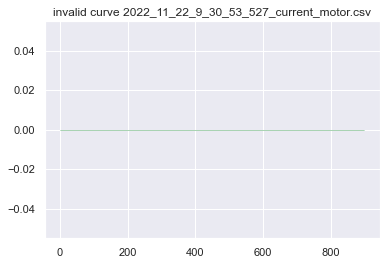

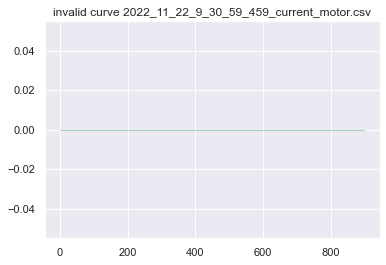

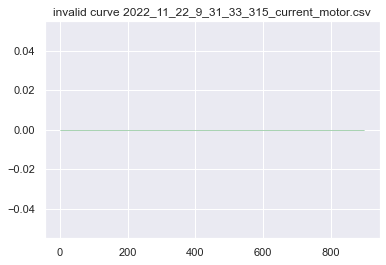

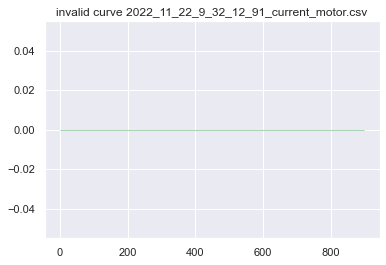

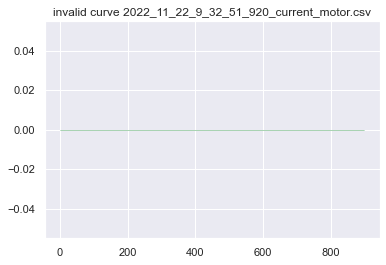

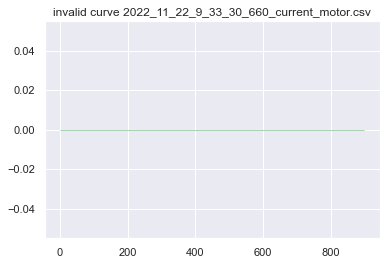

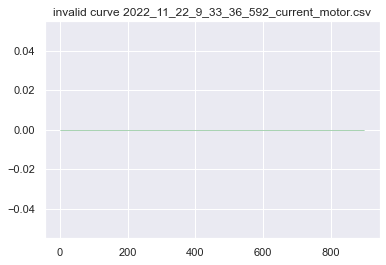

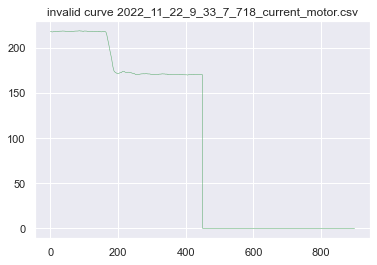

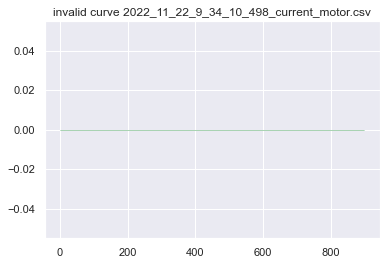

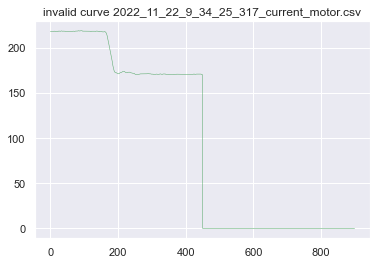

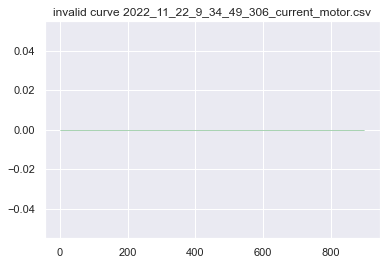

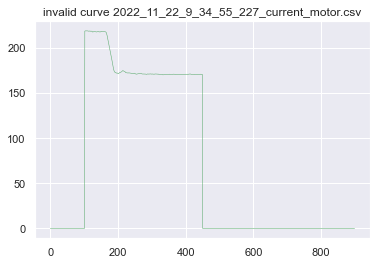

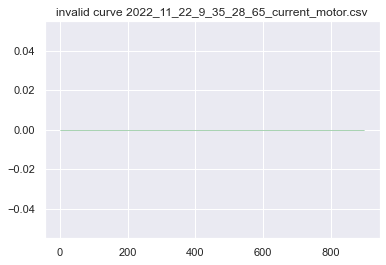

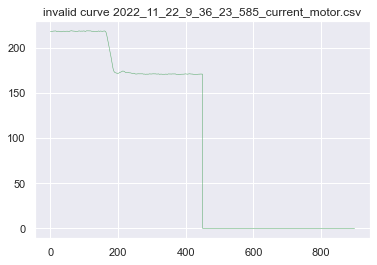

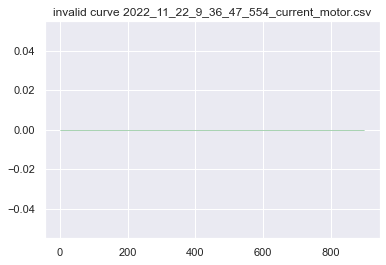

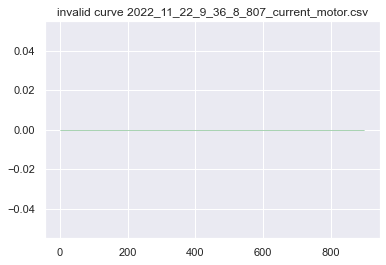

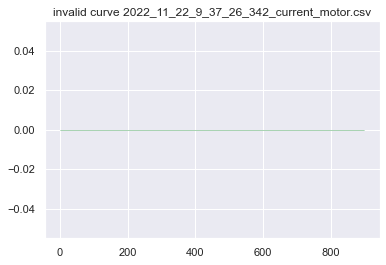

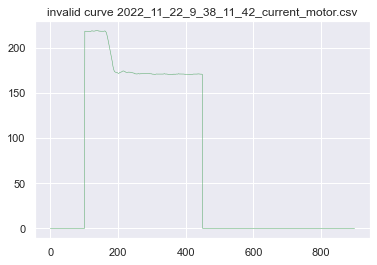

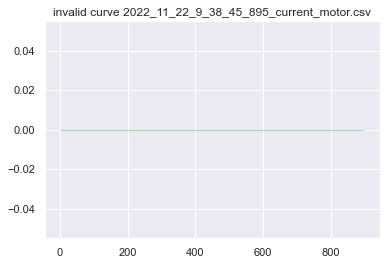

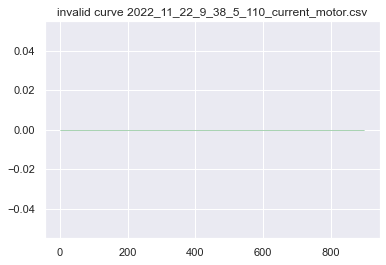

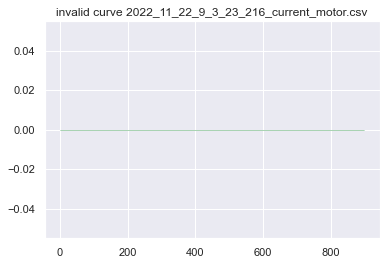

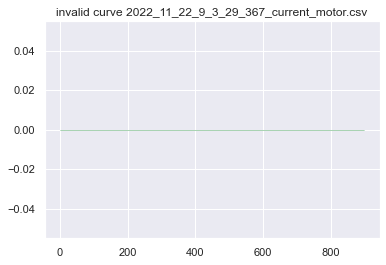

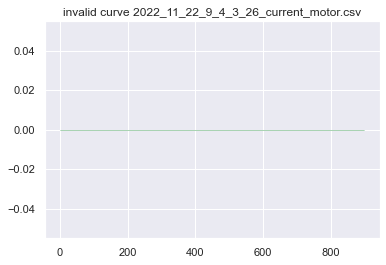

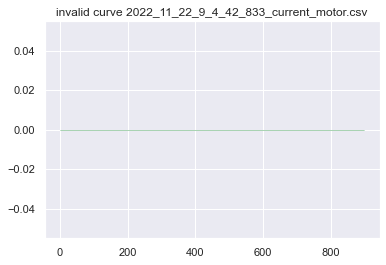

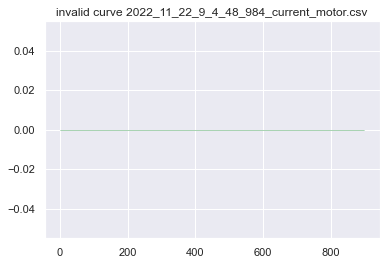

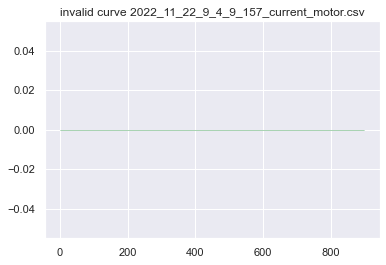

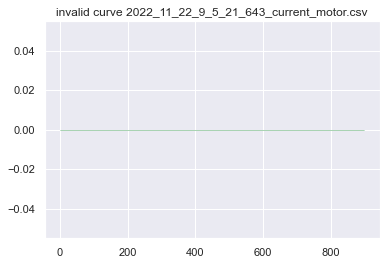

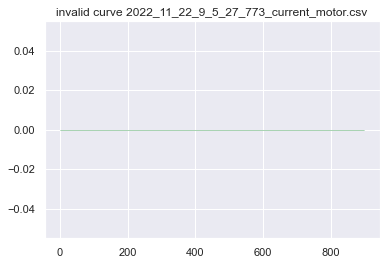

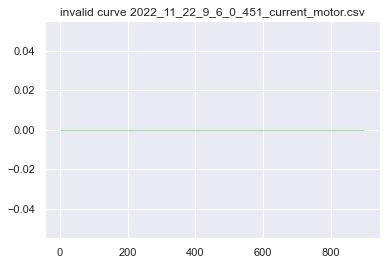

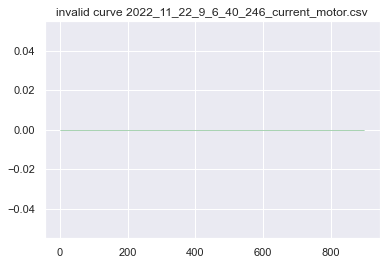

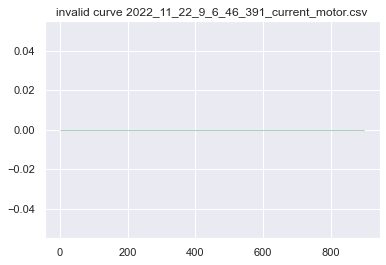

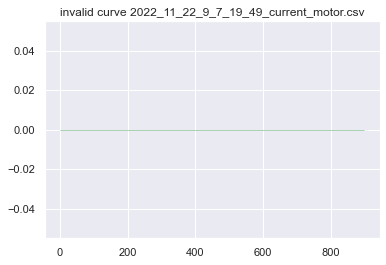

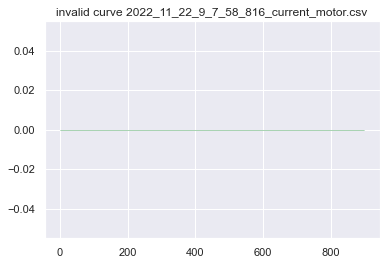

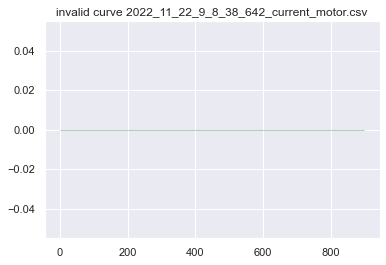

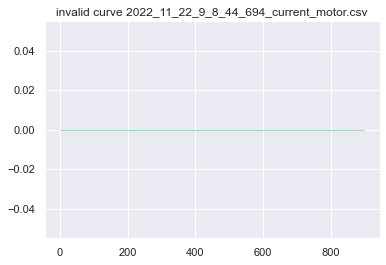

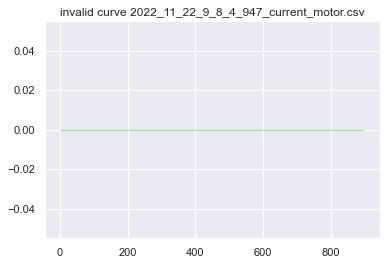

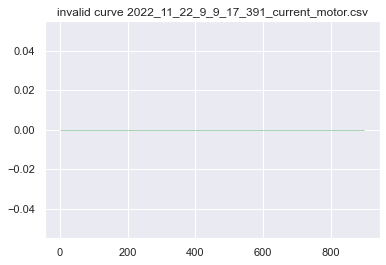

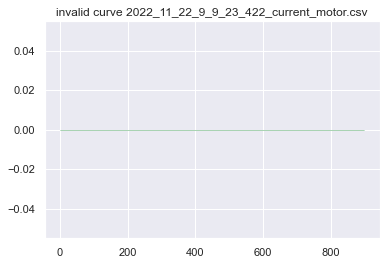

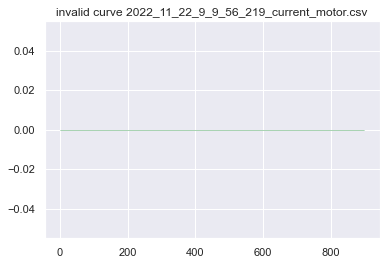

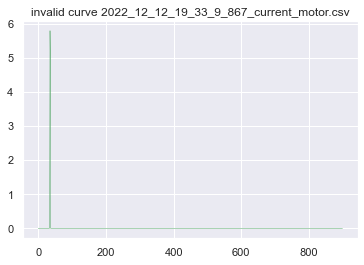

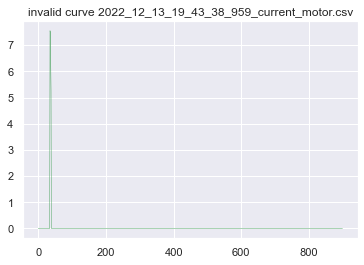

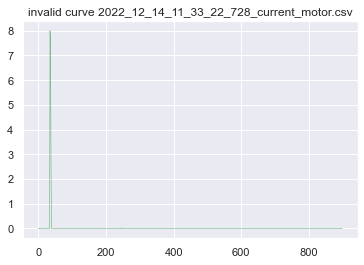

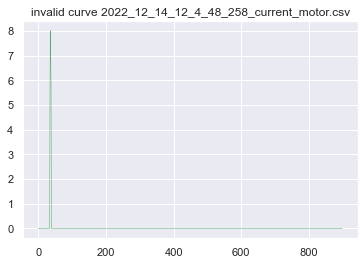

In [17]:
count_motor_current = 0
fig, ax = plt.subplots(dpi=200)
for cur_dir, dirs, files in os.walk(dir_noreclosing_washed):

    # plot motor current curve

    for file in files[:]:
        if 'current_motor' in file:
            count_motor_current += 1
            curve_df = pd.read_csv(os.path.join(cur_dir, file), header=0)
            if 0.1 < np.mean(curve_df['data']) < 2:
                ax.plot(curve_df['data'],
                        c='g',
                        linewidth=0.5)
            else:
                print('invalid curve file name:', file)
                plt.figure()
                plt.plot(curve_df['data'],
                         c='g',
                         linewidth=0.5)
                plt.title('invalid curve {}'.format(file))

ax.set_title('motor current curves, total number: {}'.format(count_motor_current))
# print('number of motor current curves:', count_motor_current)     

### 2.2.10 fault curves

number of current_open curves: 10
number of current_close curves: 10
number of travel_open curves: 9
number of travel_close curves: 10
number of current_motor curves: 10
number of current_open curves: 10
number of current_close curves: 10
number of travel_open curves: 10
number of travel_close curves: 10
number of current_motor curves: 9


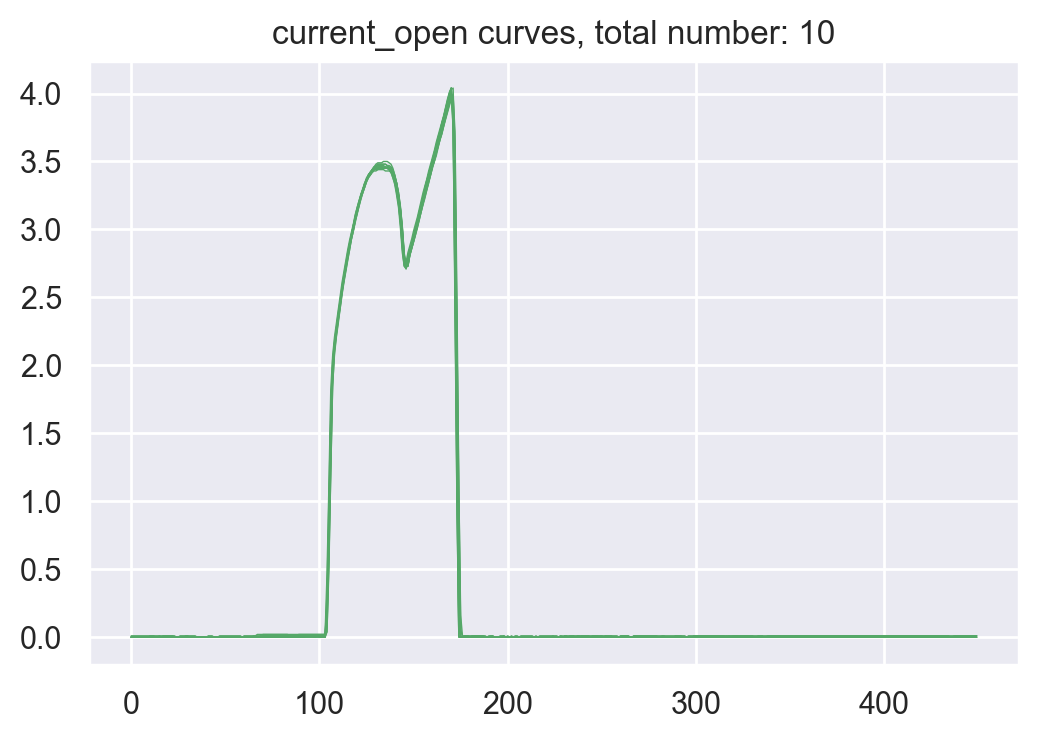

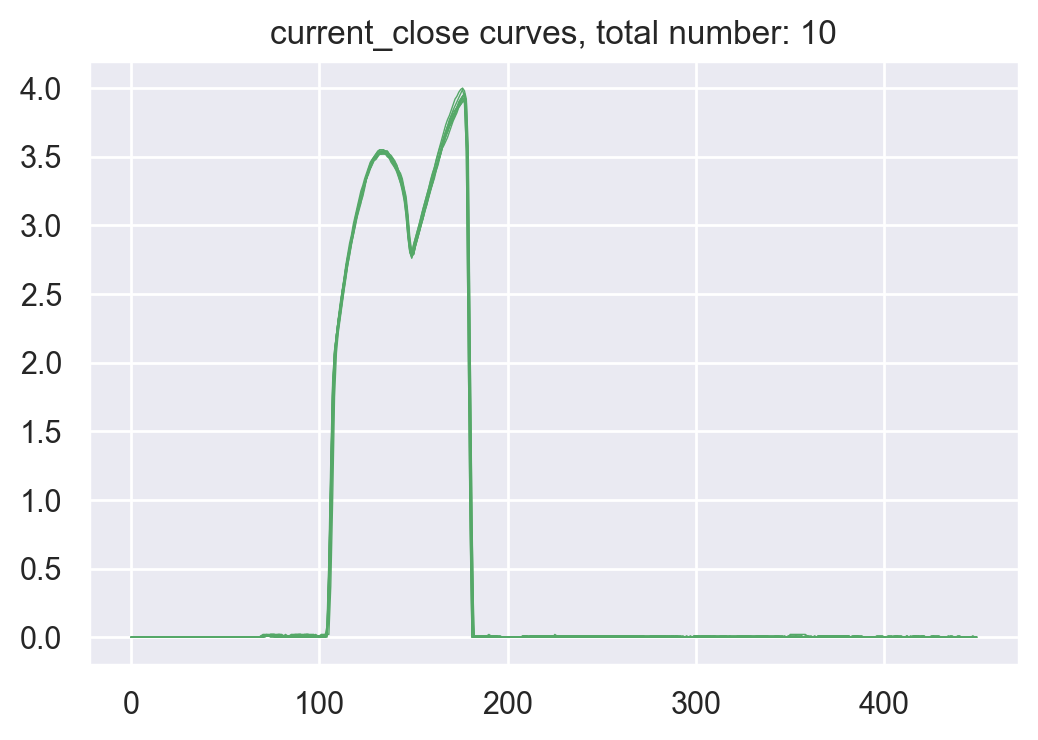

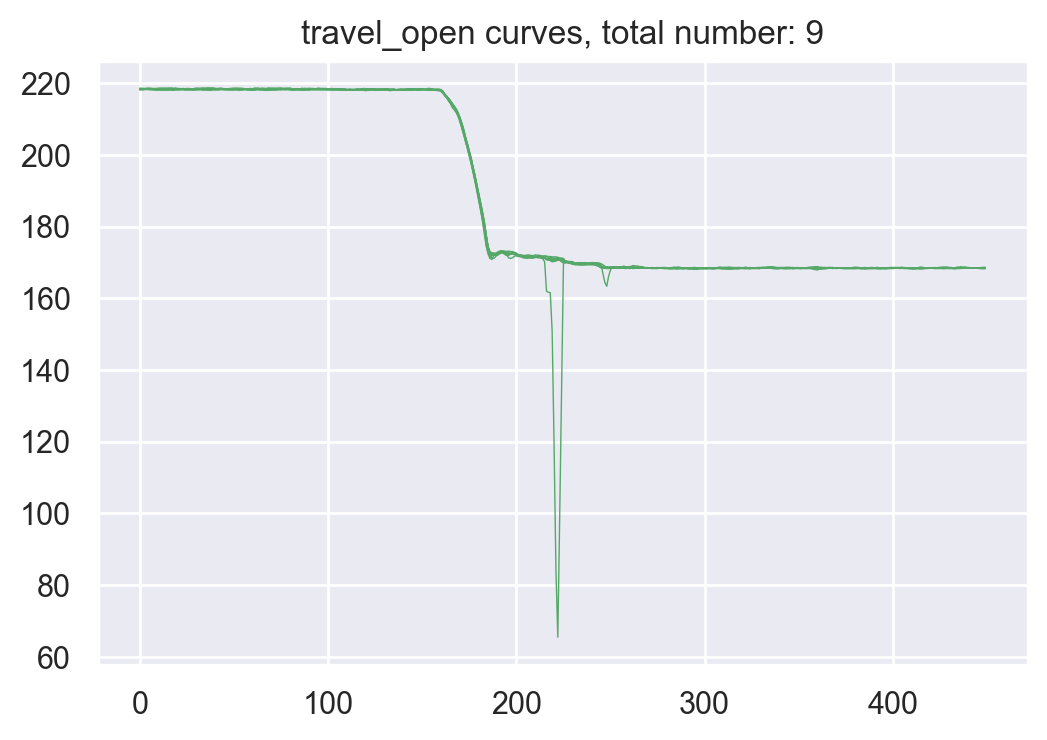

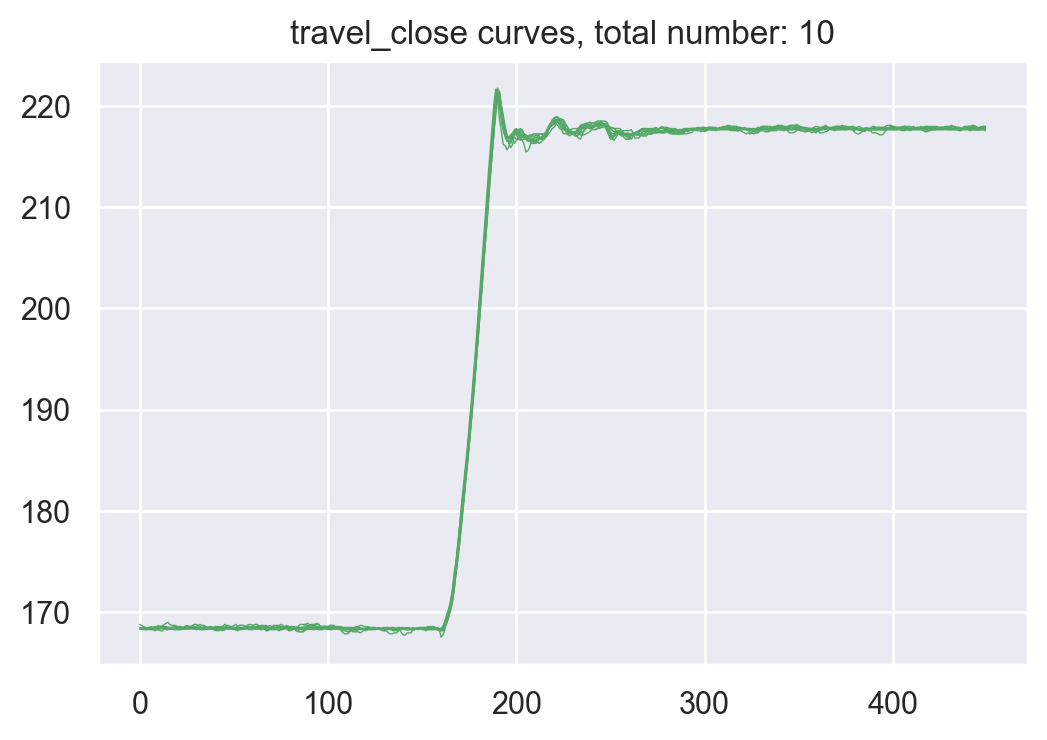

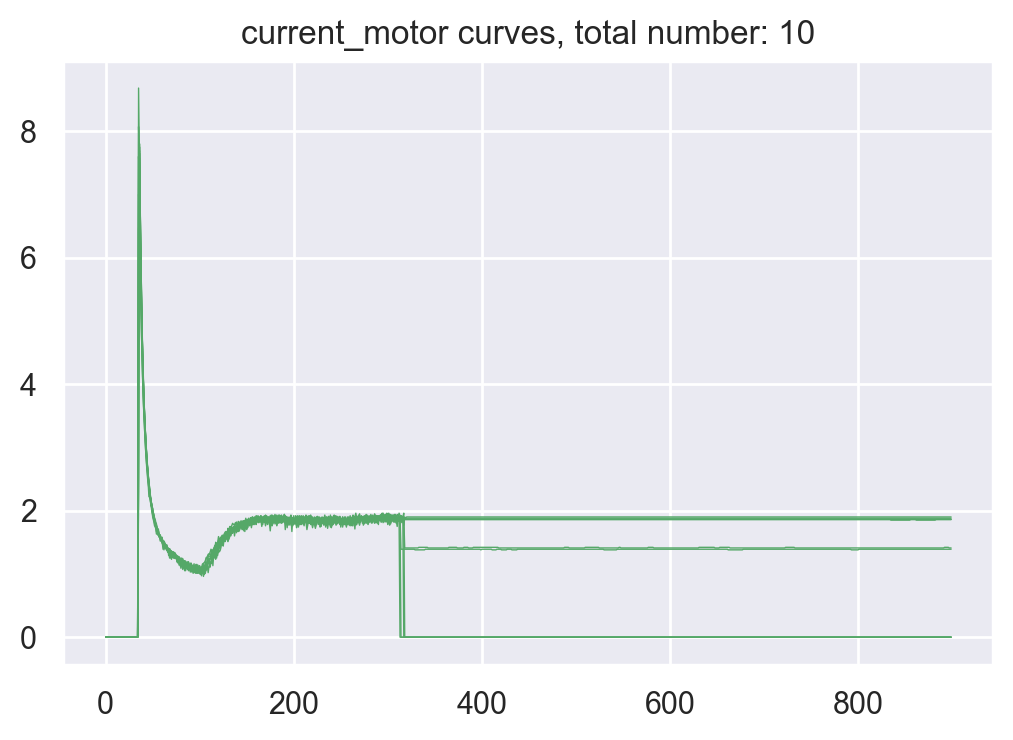

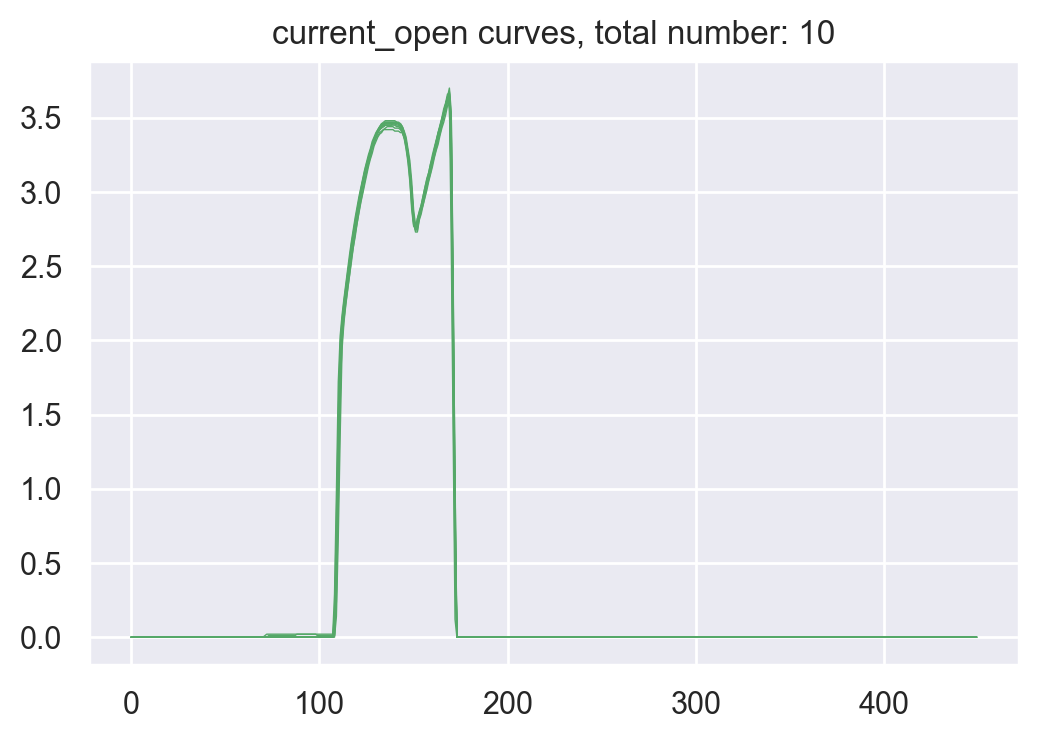

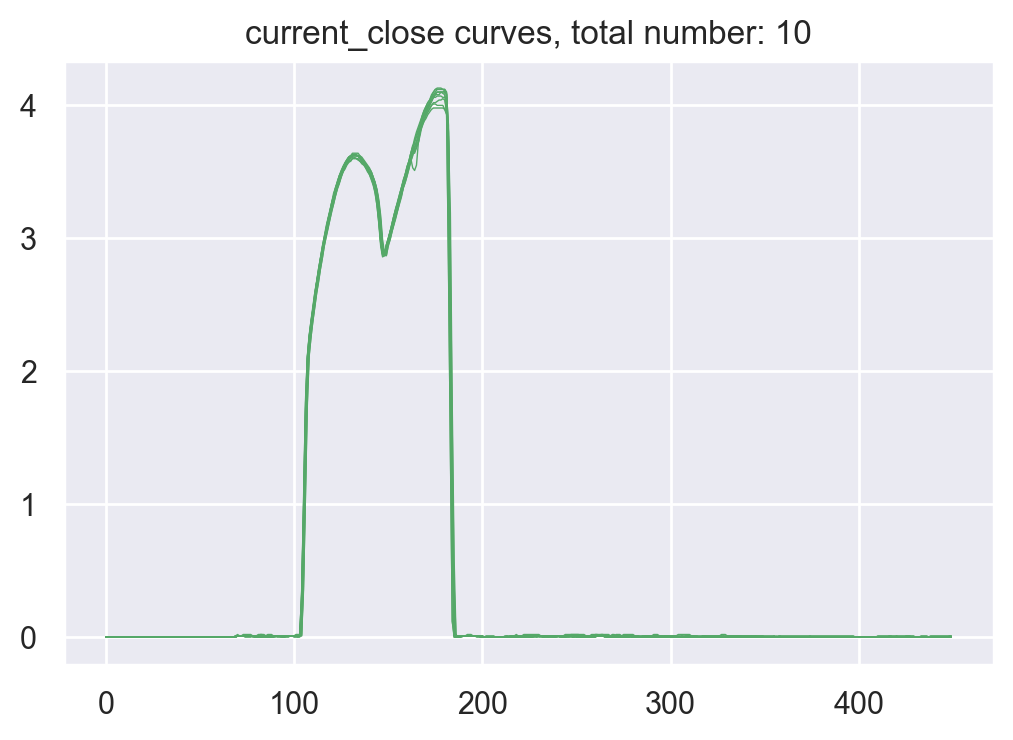

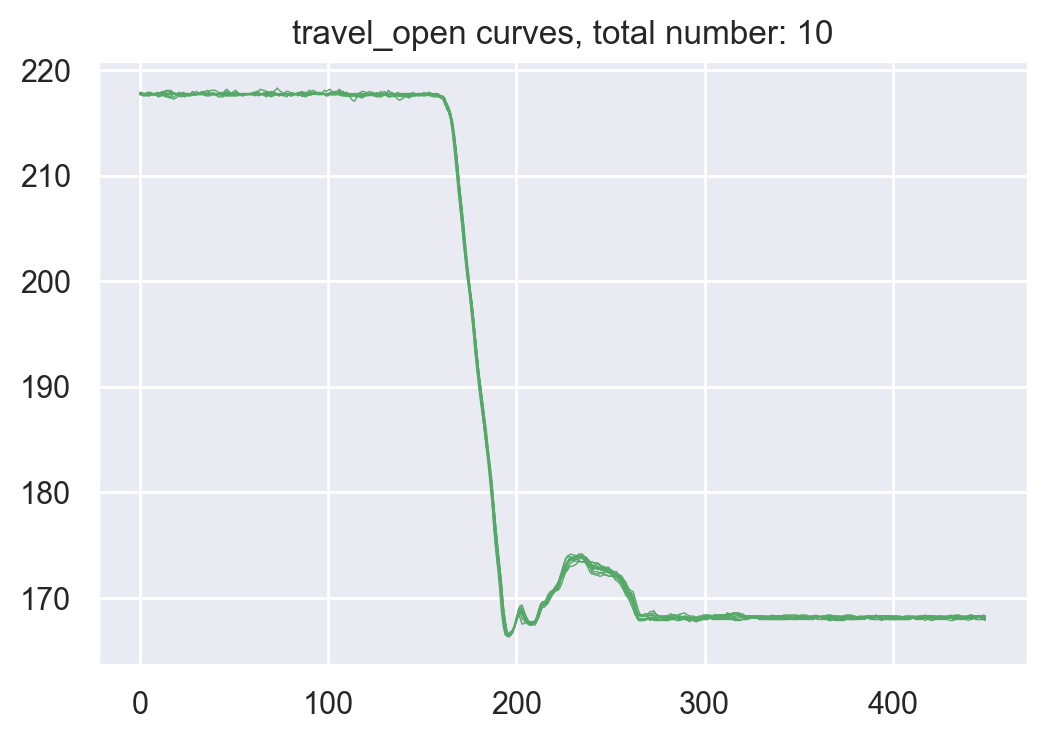

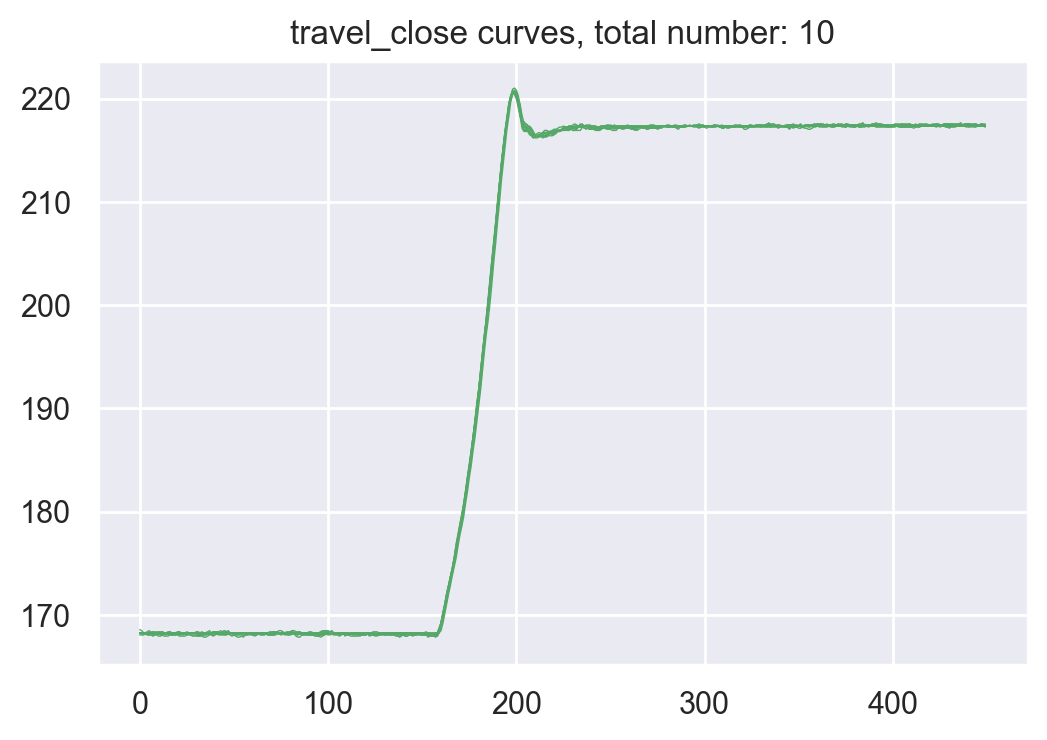

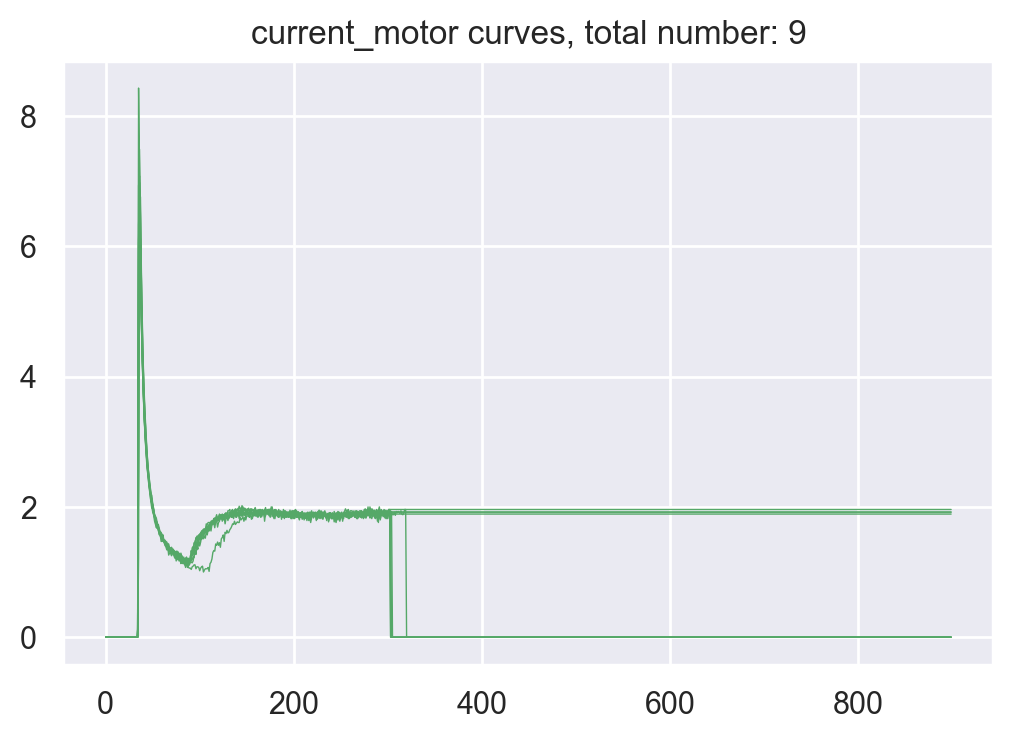

In [4]:
dir_washed_fault_1 = r'C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\4_Fault data\fault 1'
dir_washed_fault_2 = r'C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000\4_Fault data\fault 2'
ME.MechOperMconfig.plot_all_csv(dir_washed_fault_1, 'current_open')
ME.MechOperMconfig.plot_all_csv(dir_washed_fault_1, 'current_close')
ME.MechOperMconfig.plot_all_csv(dir_washed_fault_1, 'travel_open')
ME.MechOperMconfig.plot_all_csv(dir_washed_fault_1, 'travel_close')
ME.MechOperMconfig.plot_all_csv(dir_washed_fault_1, 'current_motor')

ME.MechOperMconfig.plot_all_csv(dir_washed_fault_2, 'current_open')
ME.MechOperMconfig.plot_all_csv(dir_washed_fault_2, 'current_close')
ME.MechOperMconfig.plot_all_csv(dir_washed_fault_2, 'travel_open')
ME.MechOperMconfig.plot_all_csv(dir_washed_fault_2, 'travel_close')
ME.MechOperMconfig.plot_all_csv(dir_washed_fault_2, 'current_motor')

# 3_Parameter calculation

open current out of range 2022_11_22_8_57_45_761_current_open.csv
open current out of range 2022_11_22_8_58_25_573_current_open.csv
close current out of range 2022_11_22_8_58_44_510_current_close.csv
close current out of range 2022_11_22_8_59_24_287_current_close.csv
open current out of range 2022_11_22_8_59_43_184_current_open.csv
open current out of range 2022_11_22_8_59_4_367_current_open.csv
no current curve found 2022_11_22_9_0_23_4_current_open.csv
close current out of range 2022_11_22_9_0_3_96_current_close.csv
close current out of range 2022_11_22_9_0_42_940_current_close.csv
open current out of range 2022_11_22_9_10_12_67_current_open.csv
close current out of range 2022_11_22_9_10_31_982_current_close.csv
open current out of range 2022_11_22_9_10_51_857_current_open.csv
close current out of range 2022_11_22_9_11_11_763_current_close.csv


C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\01_Code\lib\safedigital\mechanical.py:740: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


no current curve found 2022_11_22_9_11_30_667_current_open.csv
close current out of range 2022_11_22_9_11_50_570_current_close.csv
open current out of range 2022_11_22_9_12_10_470_current_open.csv
close current out of range 2022_11_22_9_12_29_368_current_close.csv
open current out of range 2022_11_22_9_12_49_243_current_open.csv
open current out of range 2022_11_22_9_13_28_50_current_open.csv
close current out of range 2022_11_22_9_13_48_960_current_close.csv
close current out of range 2022_11_22_9_13_8_153_current_close.csv
close current out of range 2022_11_22_9_14_27_718_current_close.csv
open current out of range 2022_11_22_9_14_47_575_current_open.csv
open current out of range 2022_11_22_9_14_7_811_current_open.csv
open current out of range 2022_11_22_9_15_26_379_current_open.csv
close current out of range 2022_11_22_9_15_46_292_current_close.csv
close current out of range 2022_11_22_9_15_6_511_current_close.csv
close current out of range 2022_11_22_9_16_25_110_current_close.csv
o

C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\01_Code\lib\safedigital\mechanical.py:330: RuntimeWarning: divide by zero encountered in double_scalars
  speed = np.abs((pt_1 - pt_0) / t)


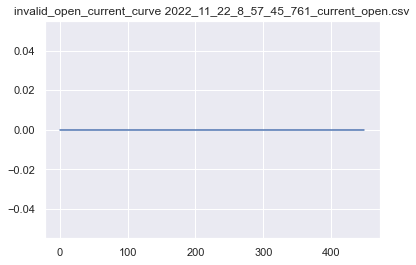

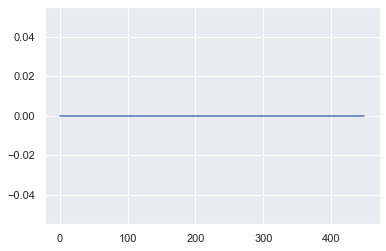

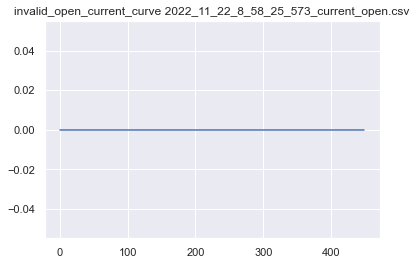

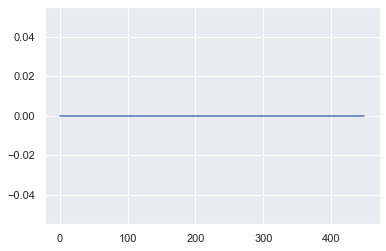

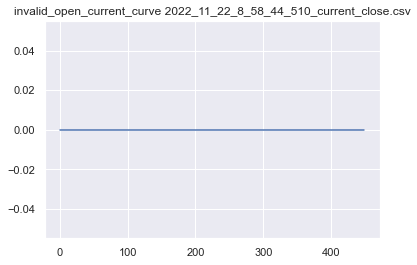

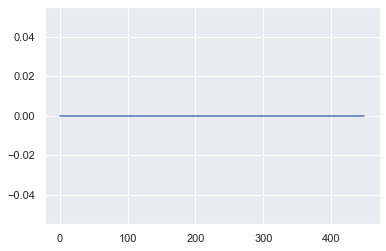

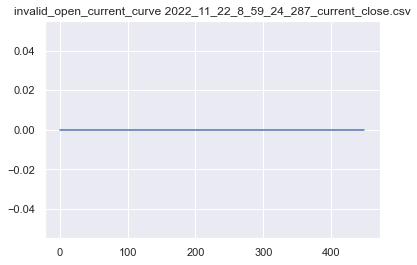

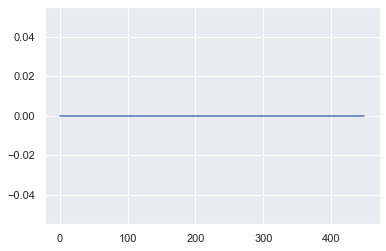

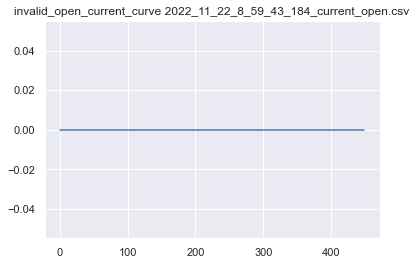

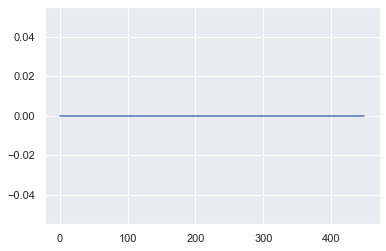

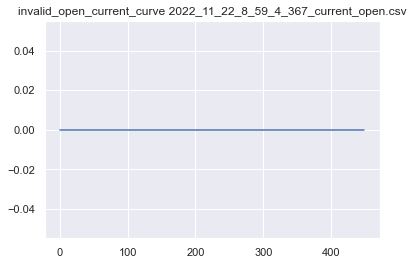

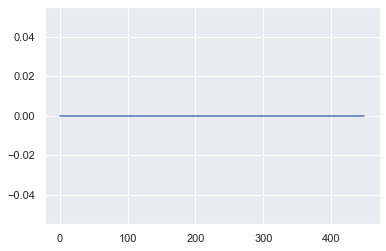

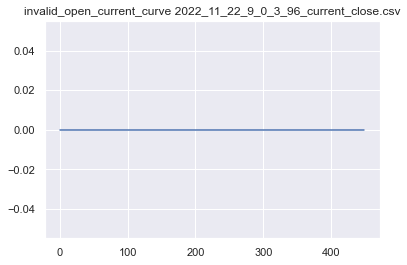

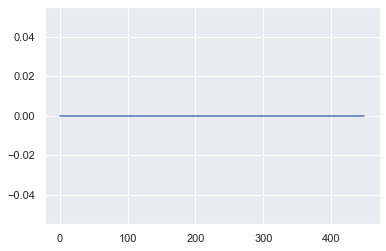

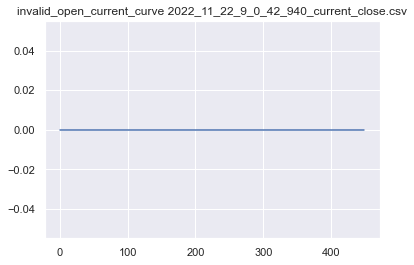

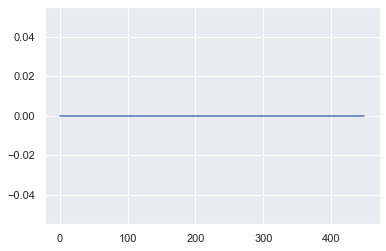

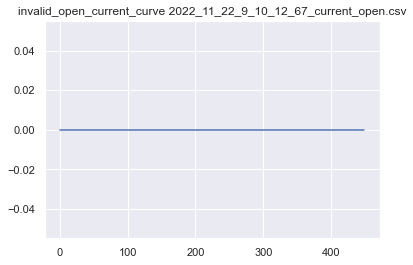

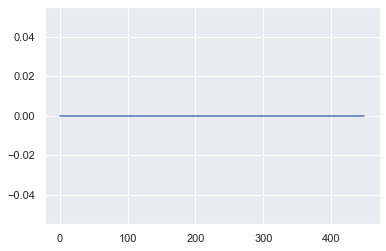

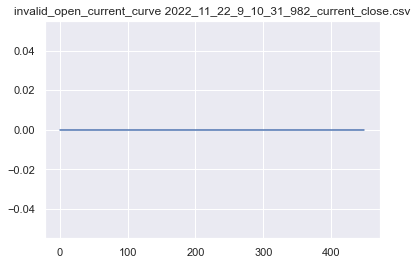

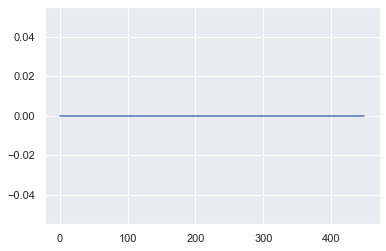

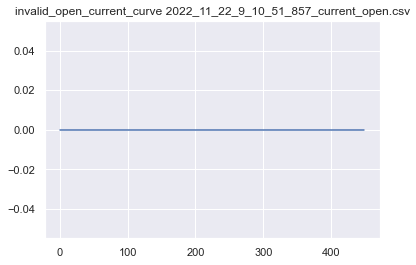

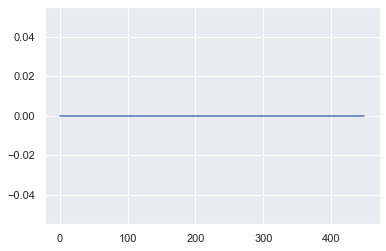

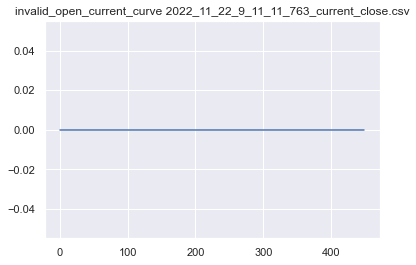

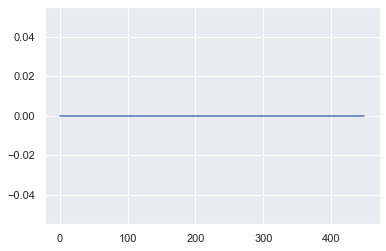

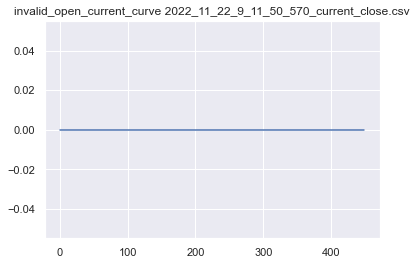

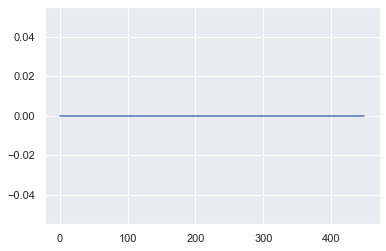

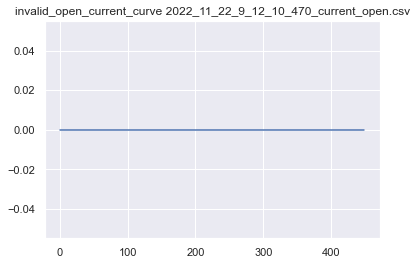

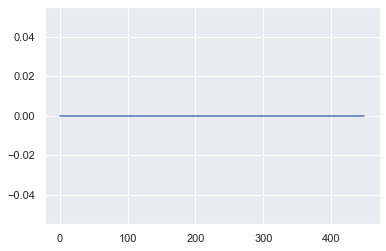

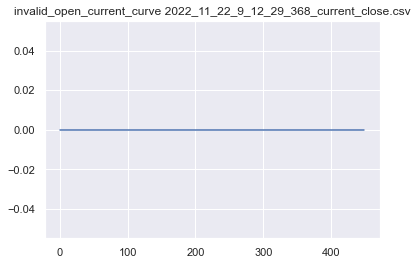

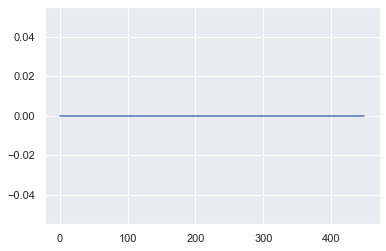

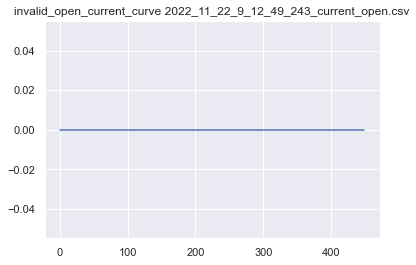

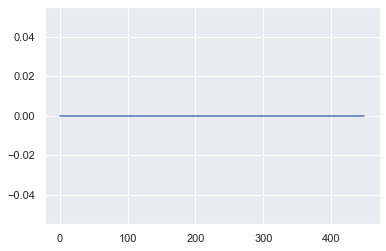

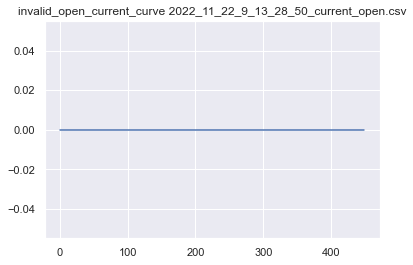

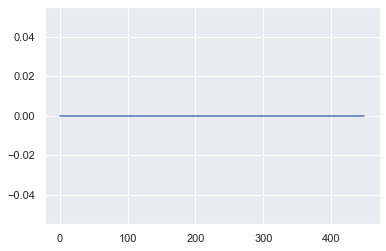

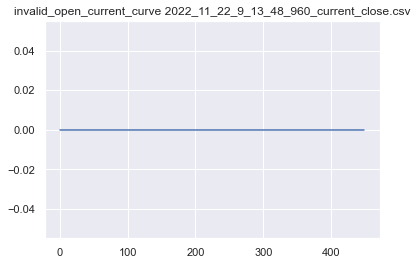

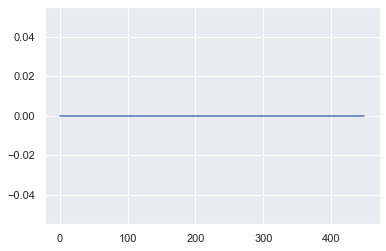

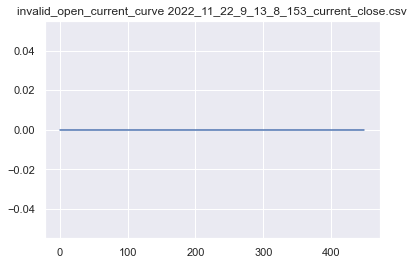

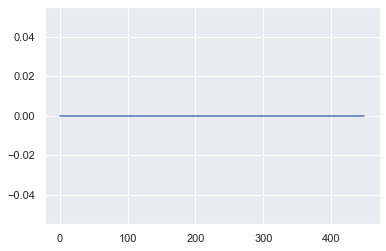

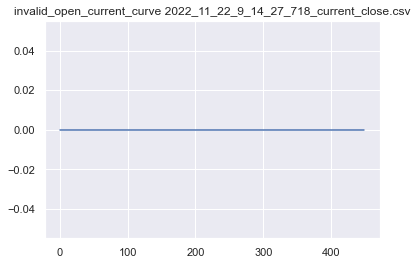

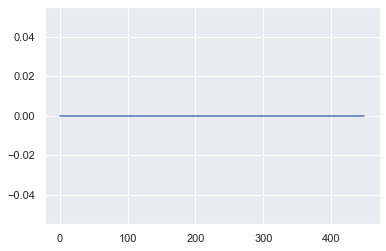

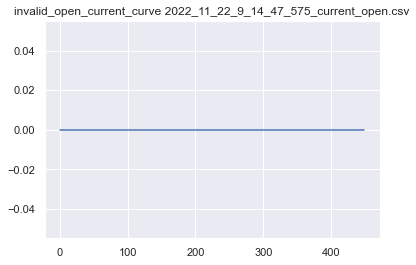

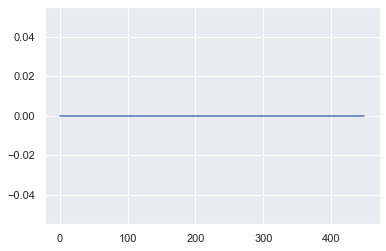

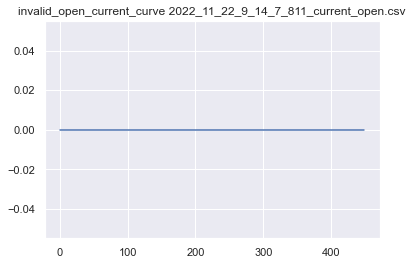

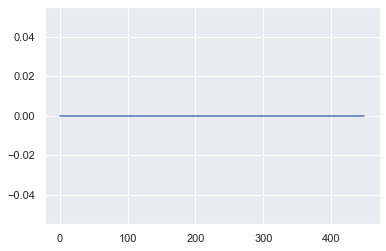

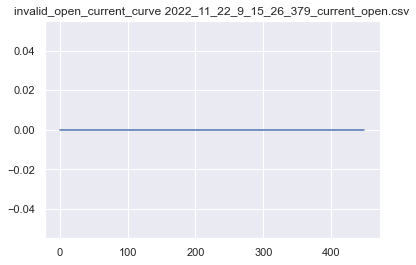

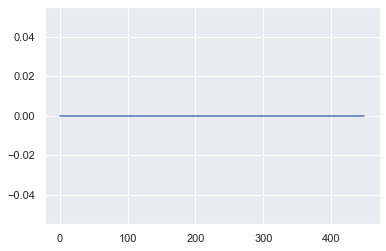

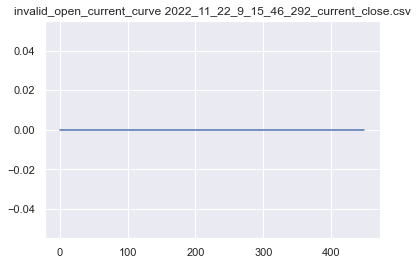

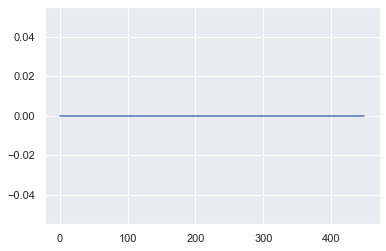

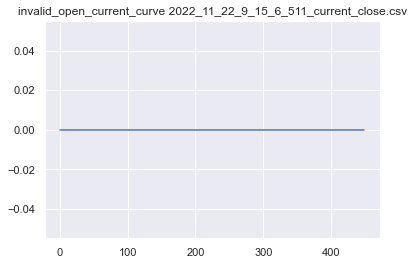

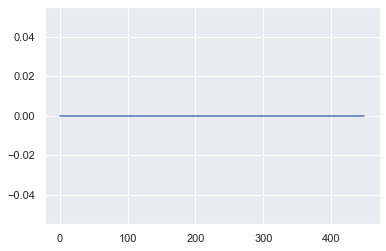

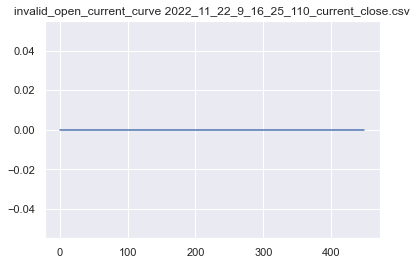

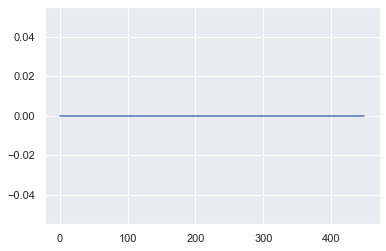

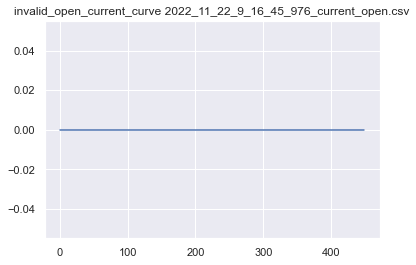

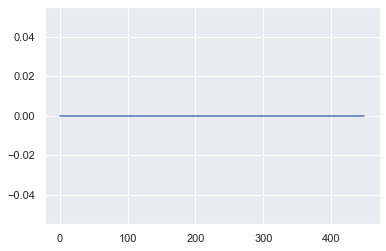

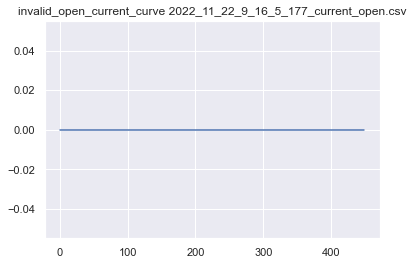

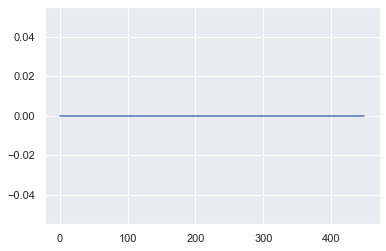

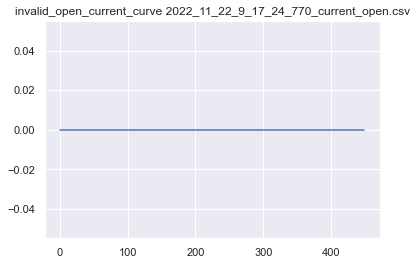

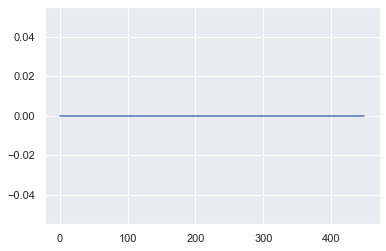

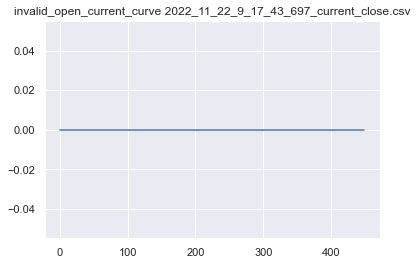

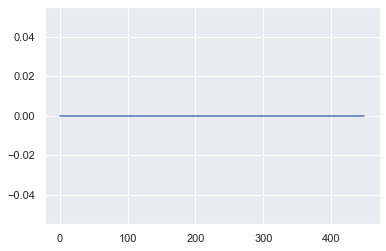

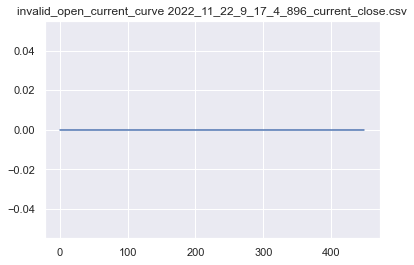

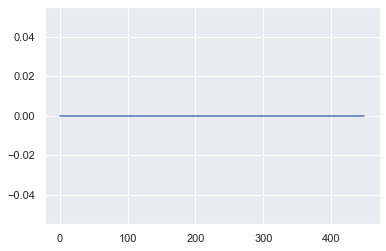

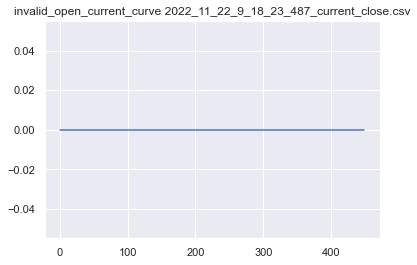

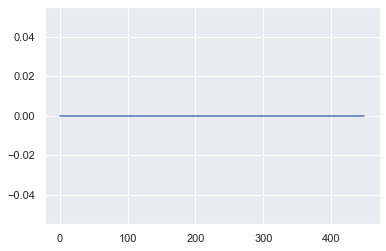

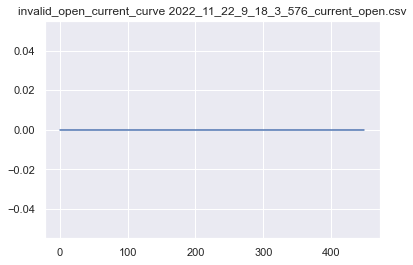

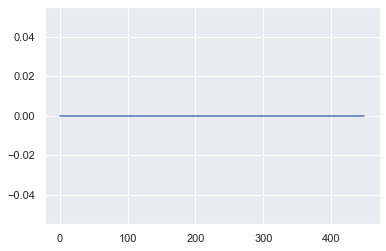

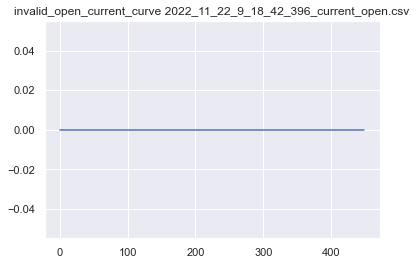

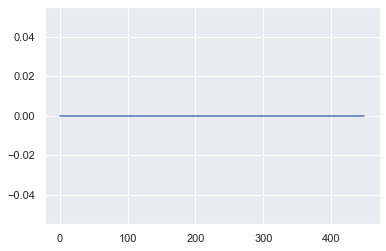

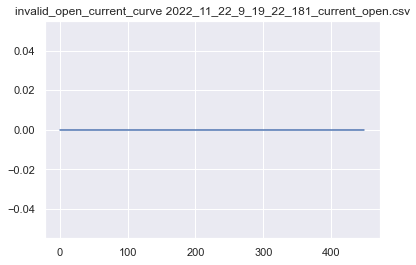

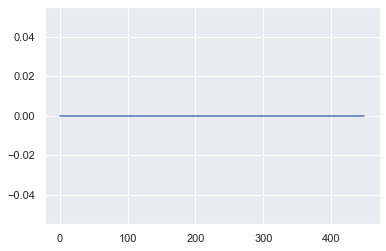

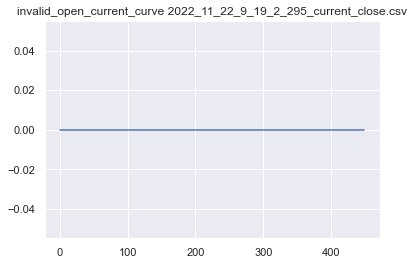

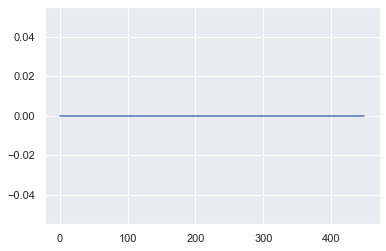

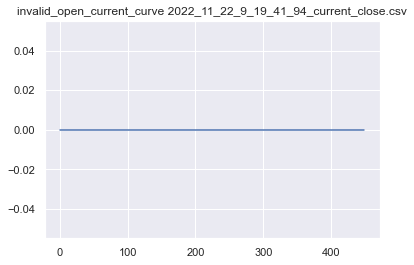

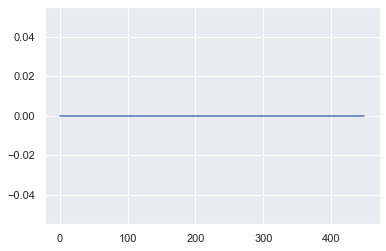

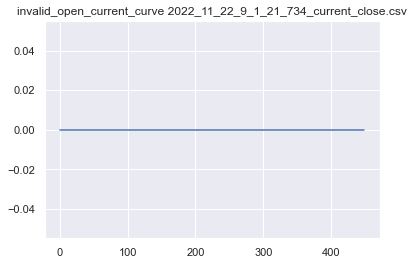

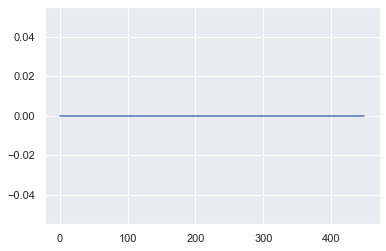

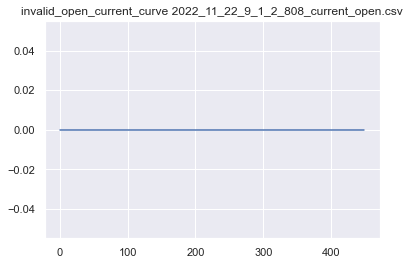

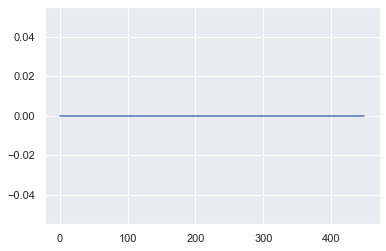

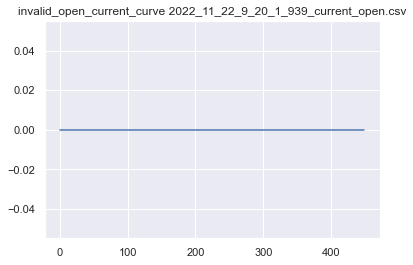

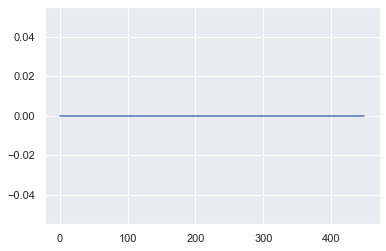

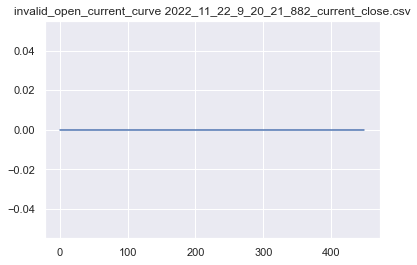

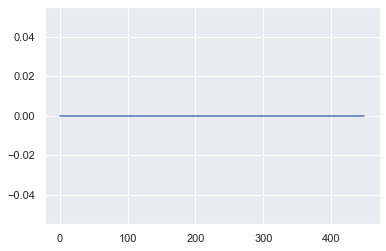

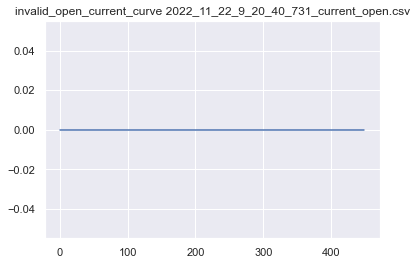

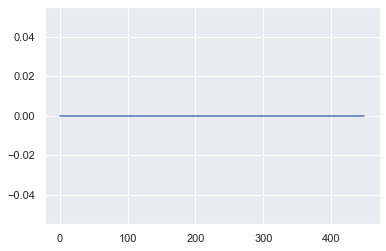

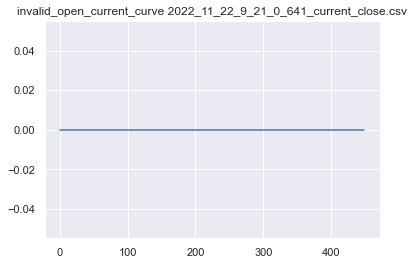

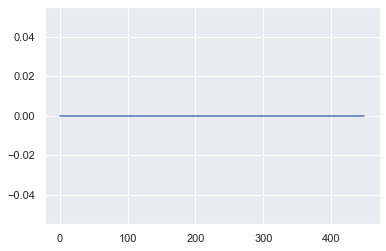

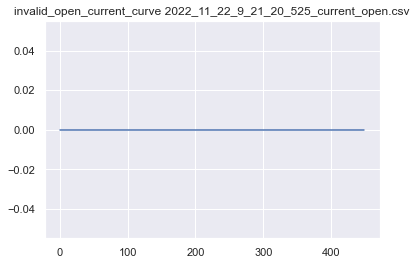

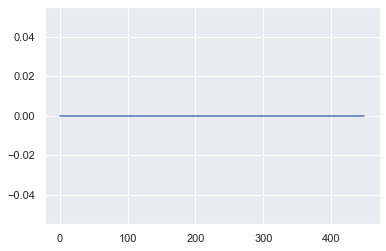

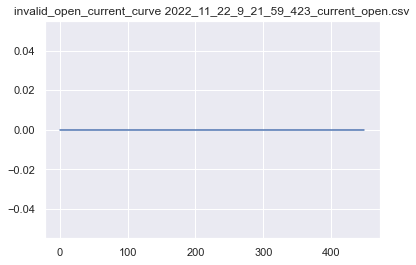

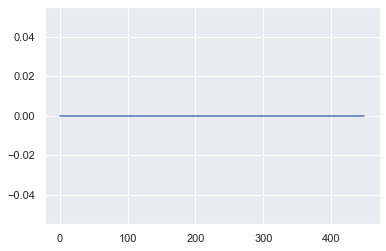

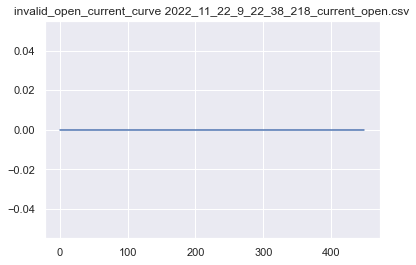

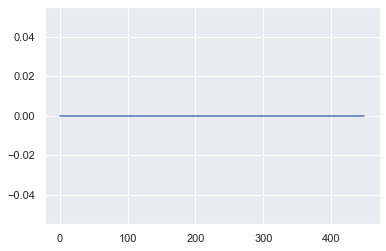

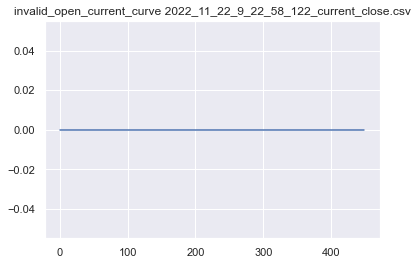

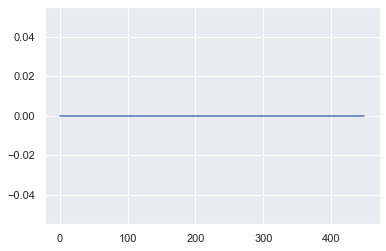

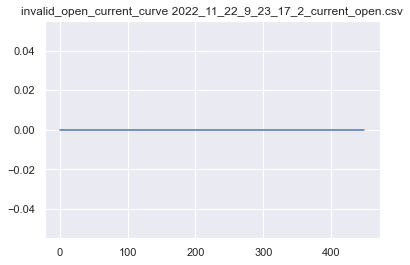

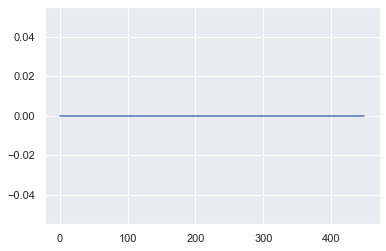

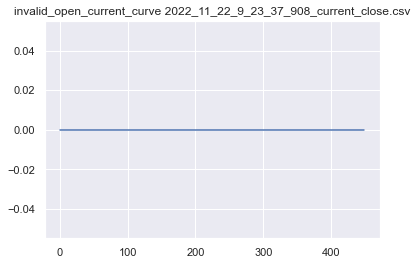

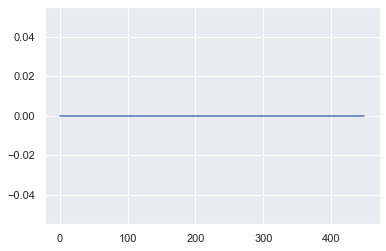

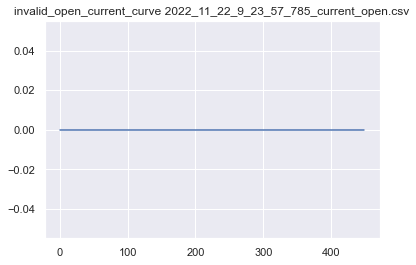

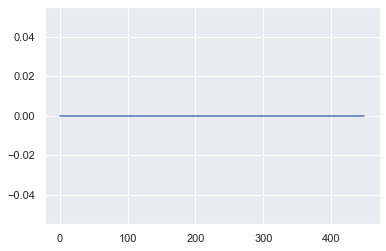

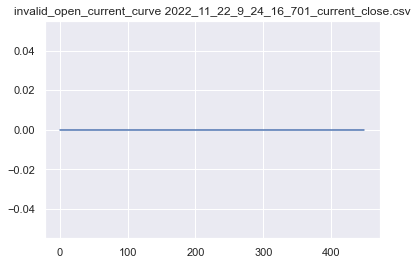

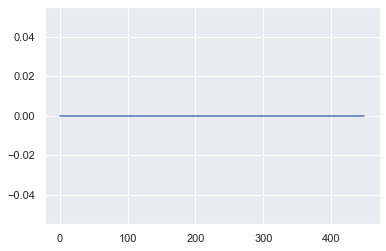

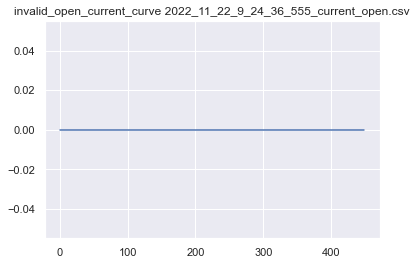

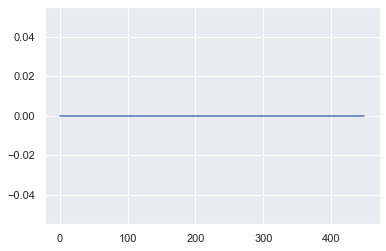

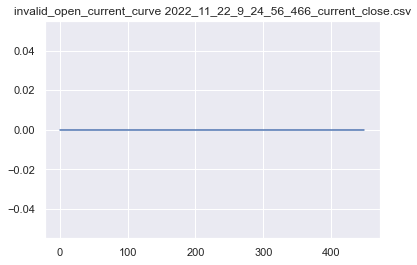

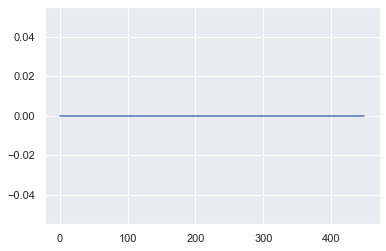

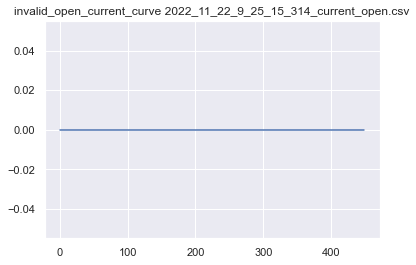

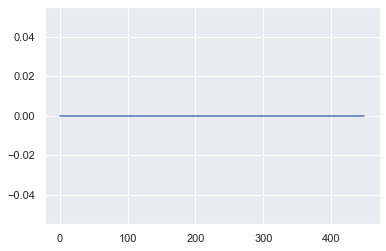

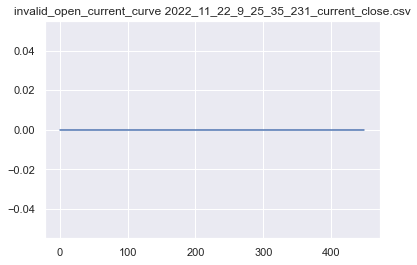

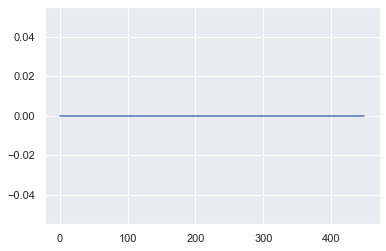

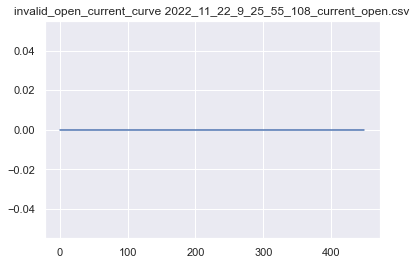

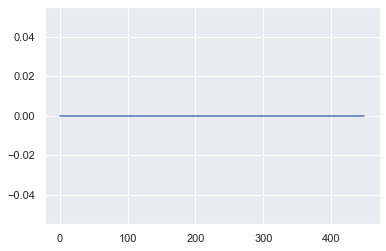

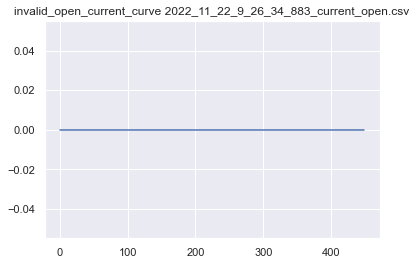

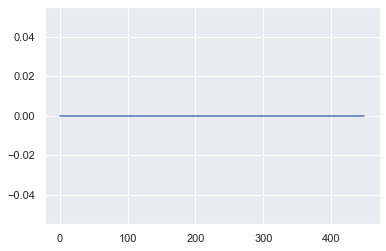

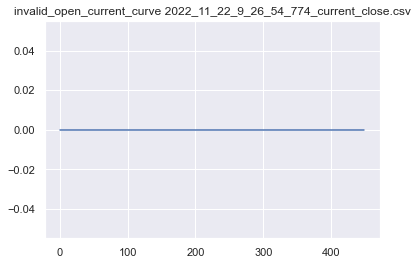

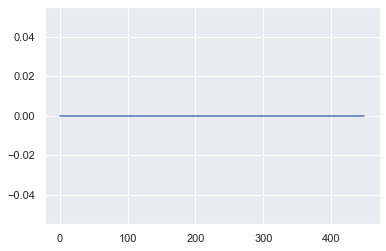

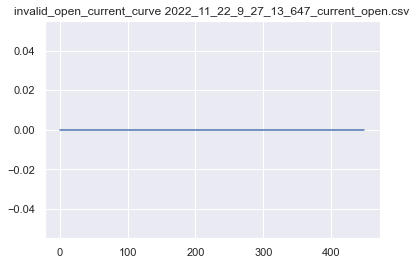

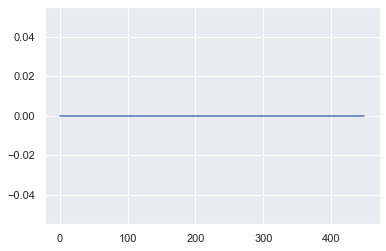

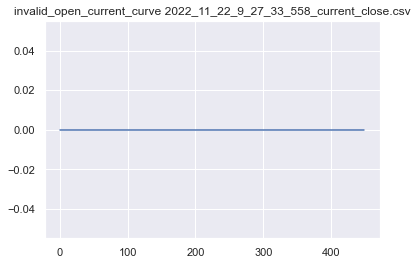

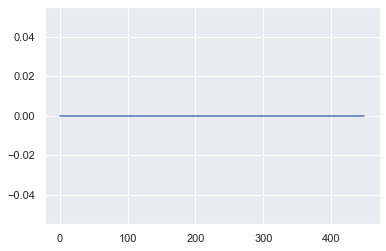

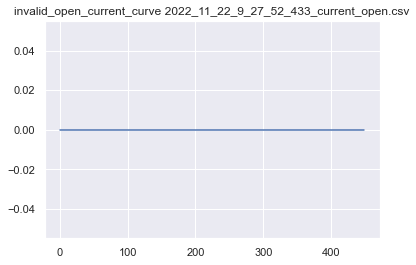

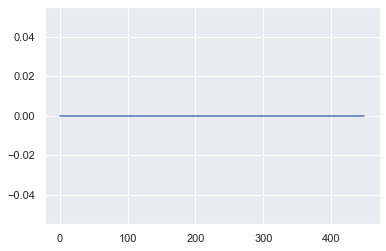

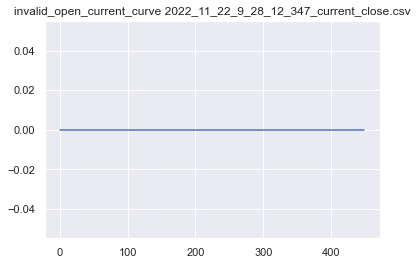

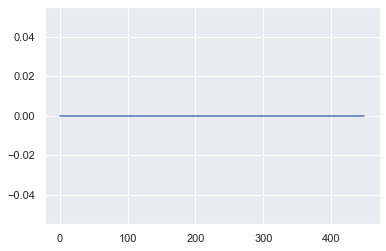

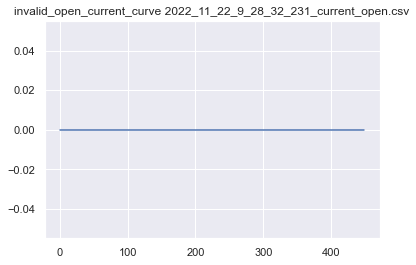

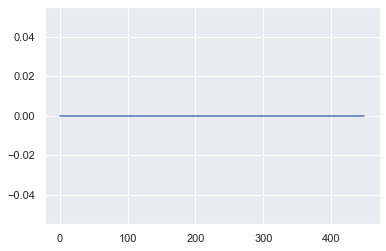

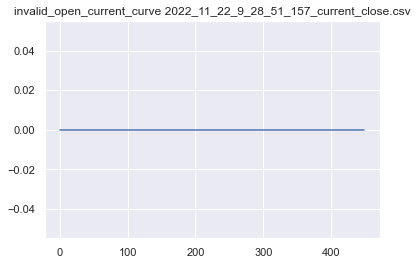

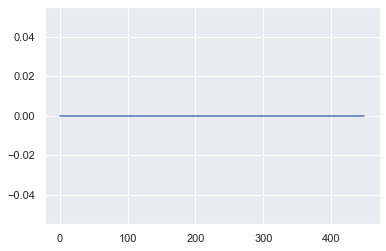

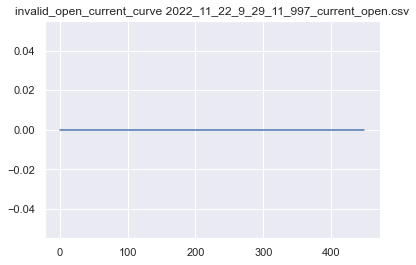

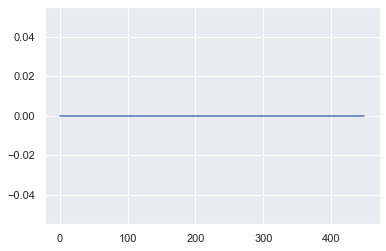

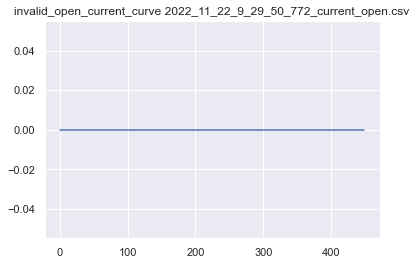

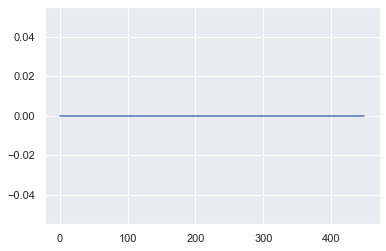

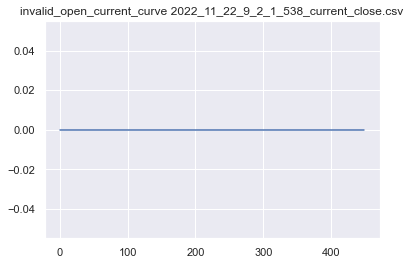

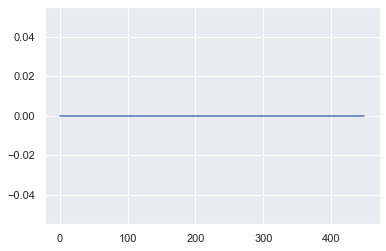

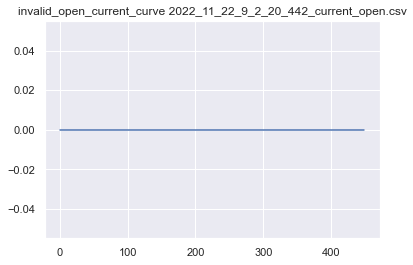

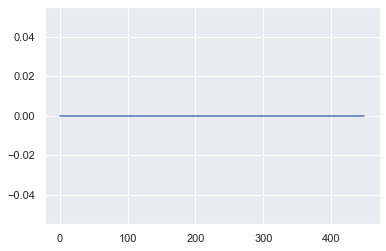

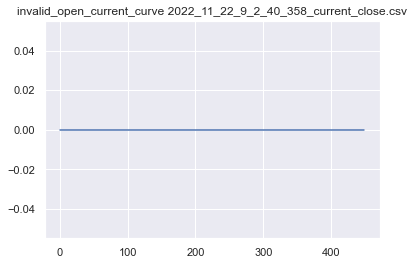

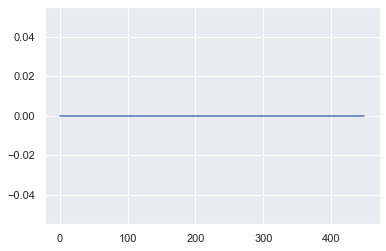

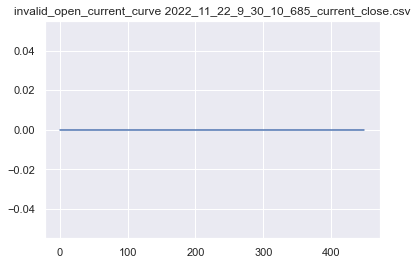

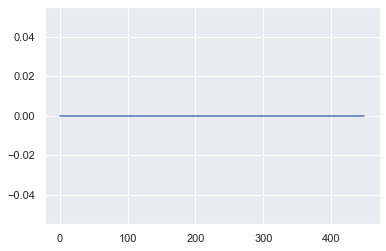

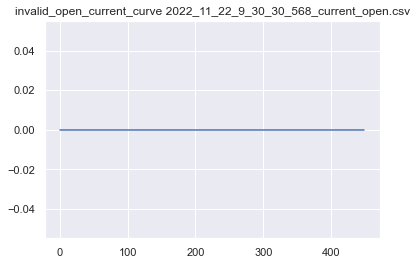

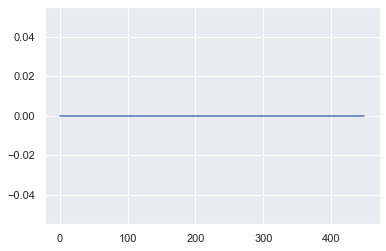

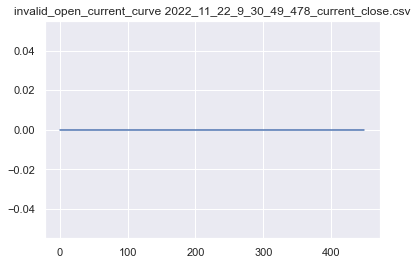

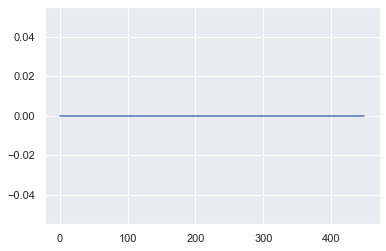

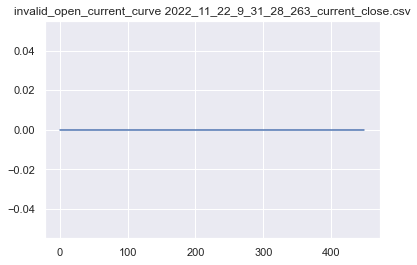

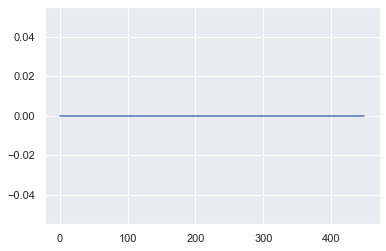

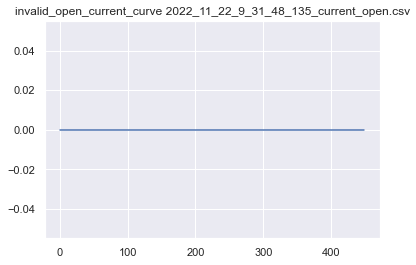

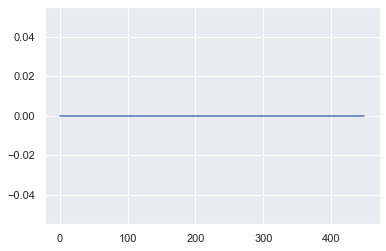

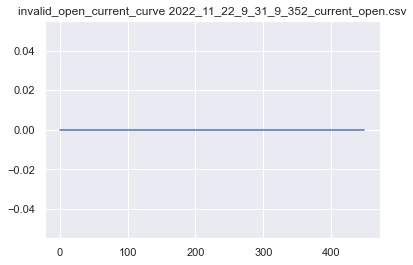

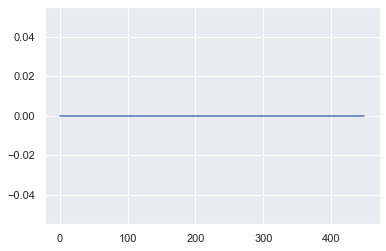

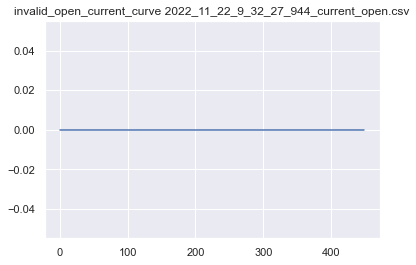

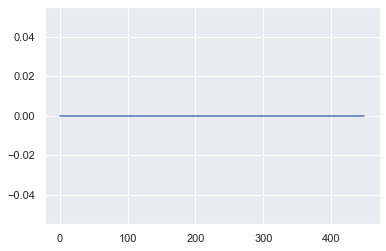

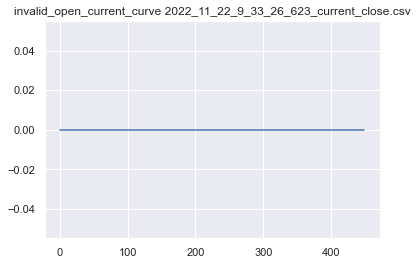

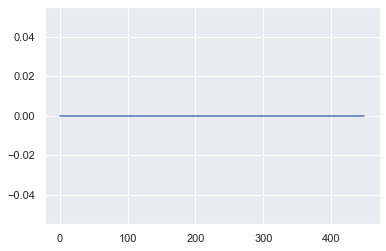

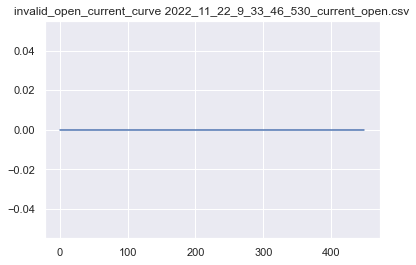

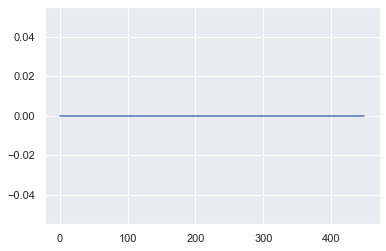

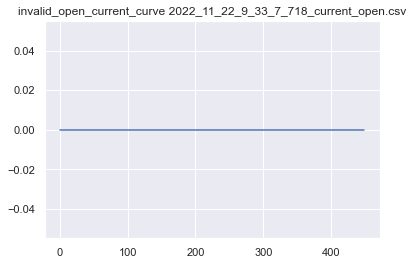

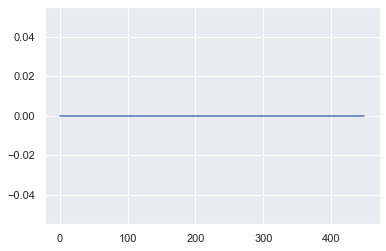

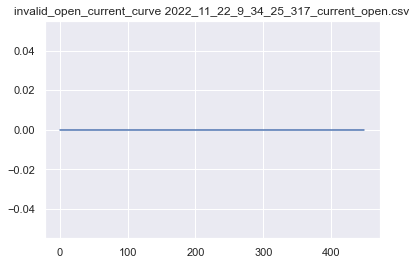

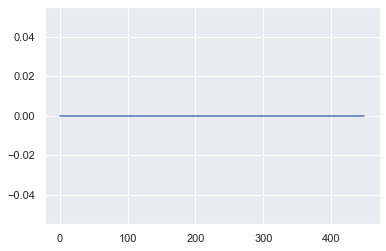

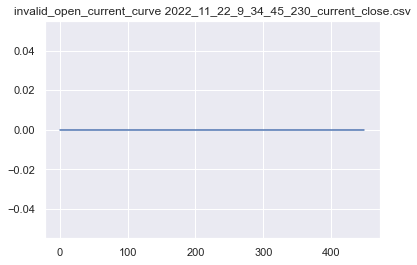

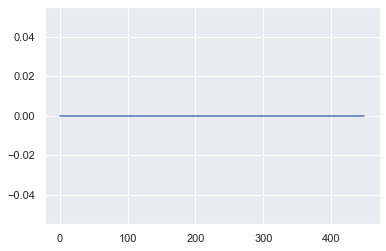

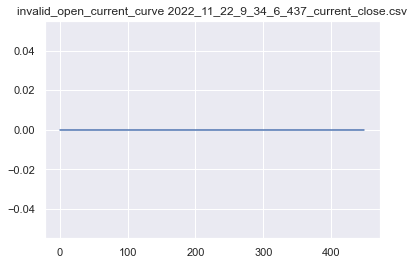

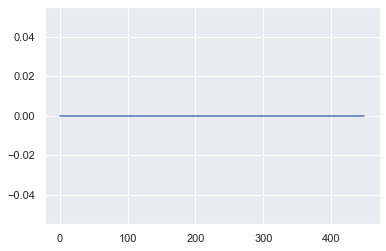

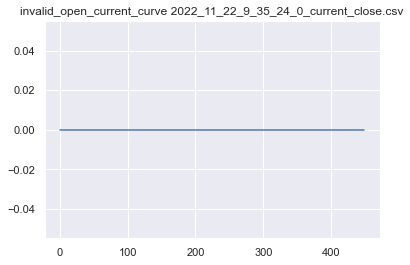

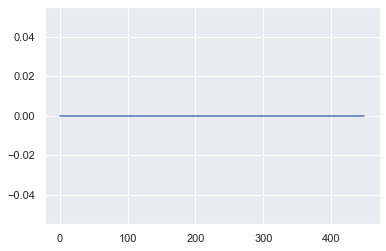

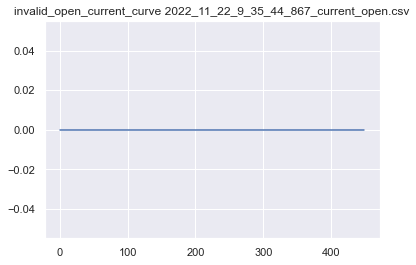

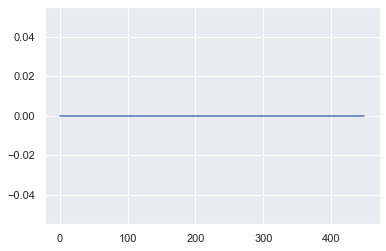

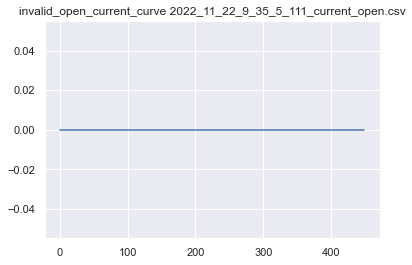

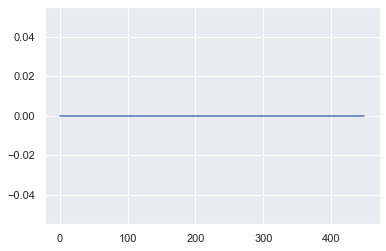

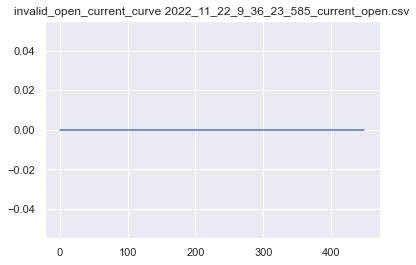

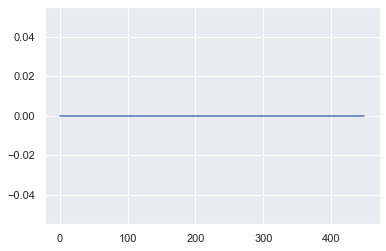

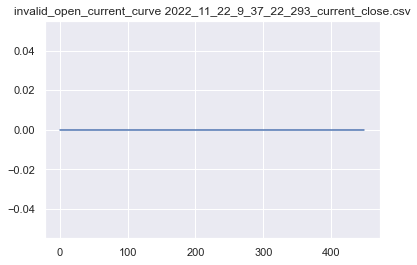

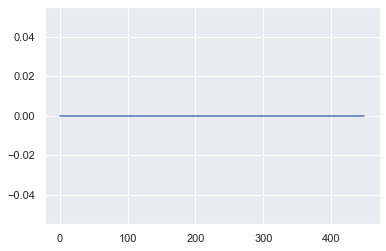

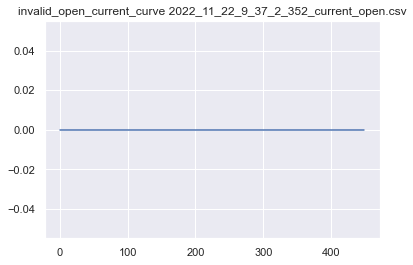

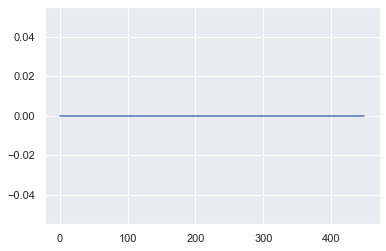

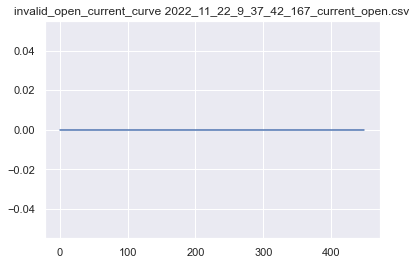

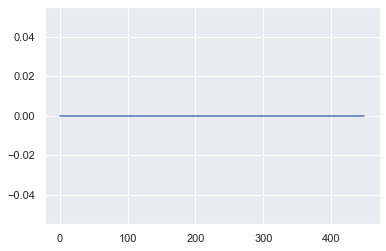

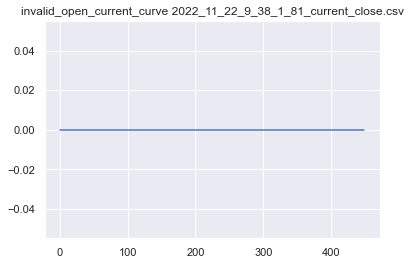

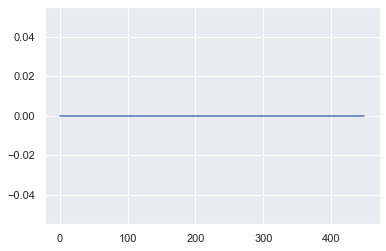

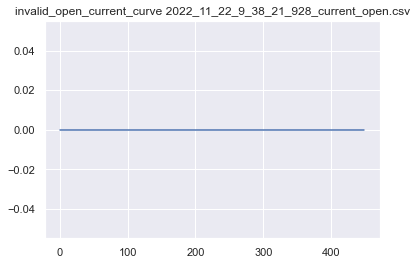

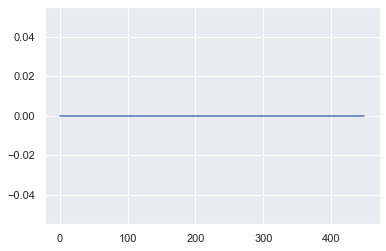

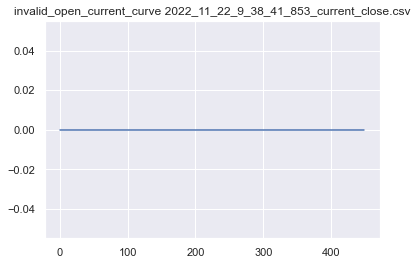

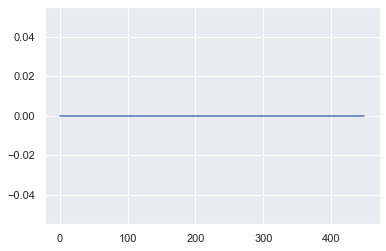

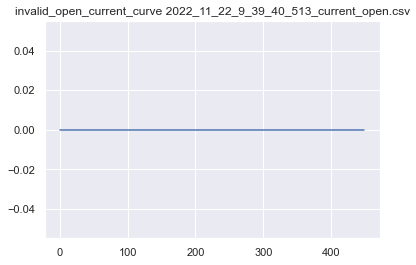

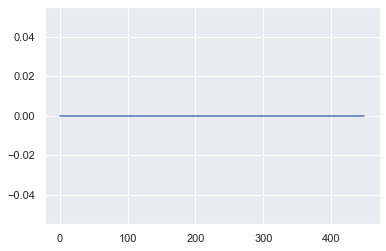

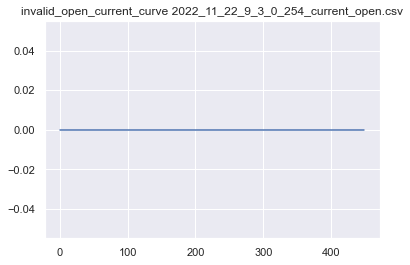

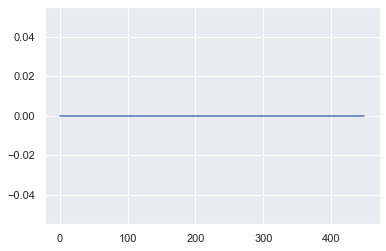

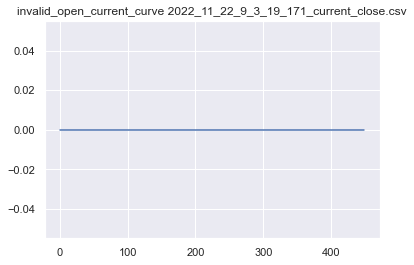

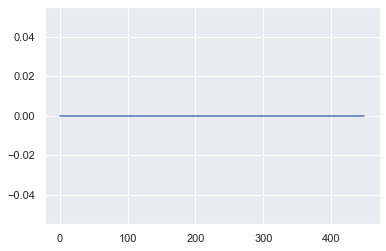

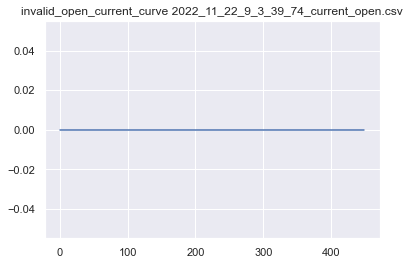

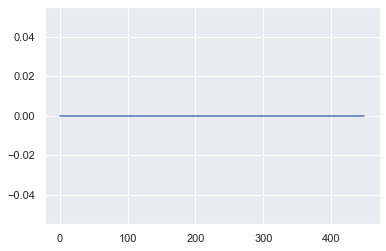

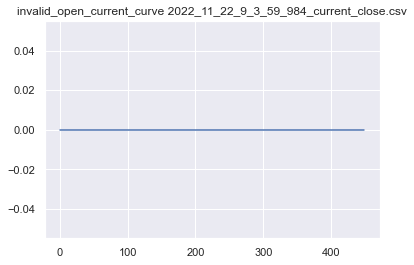

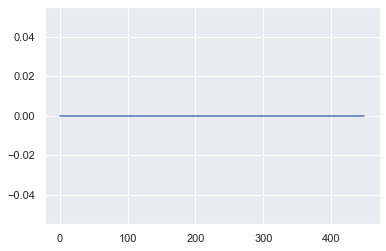

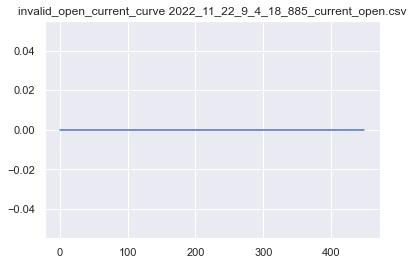

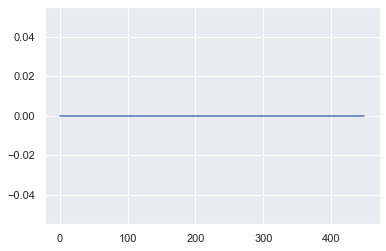

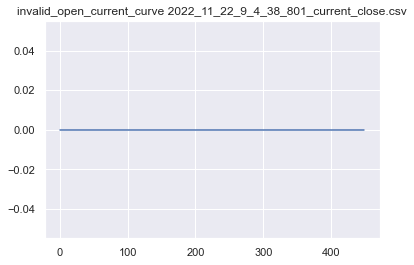

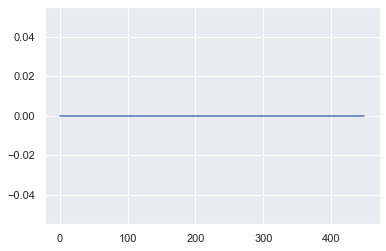

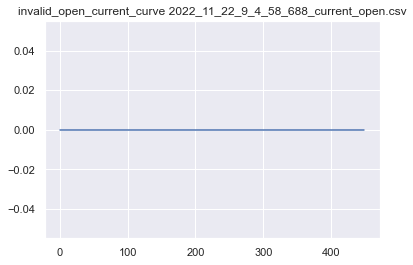

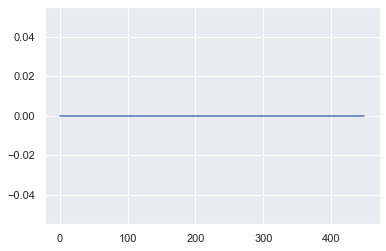

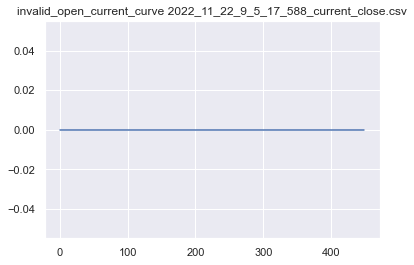

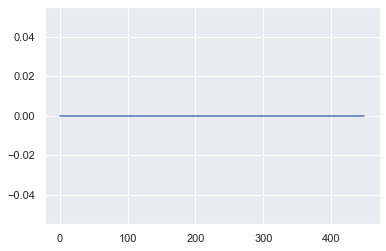

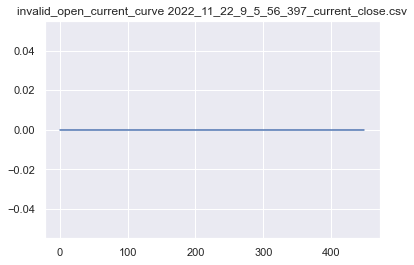

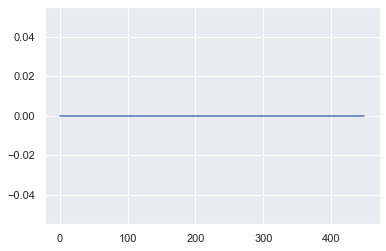

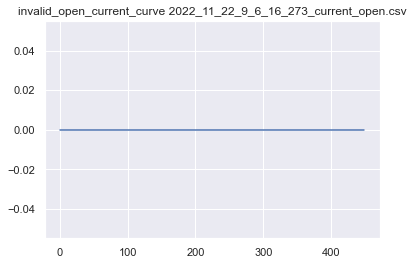

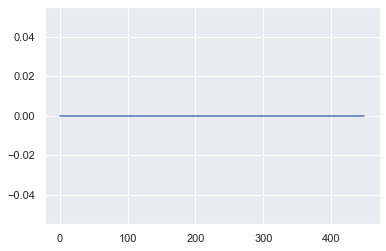

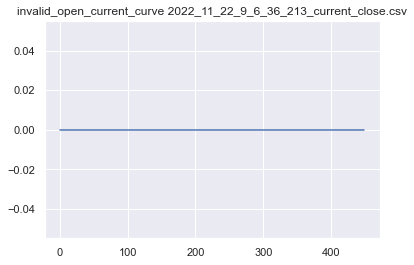

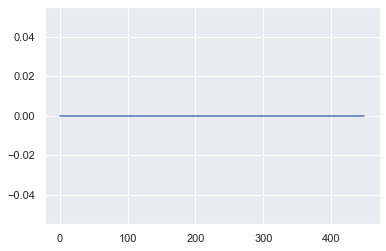

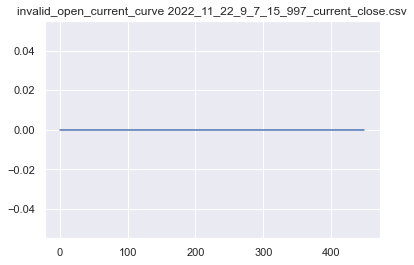

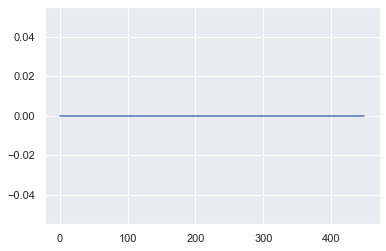

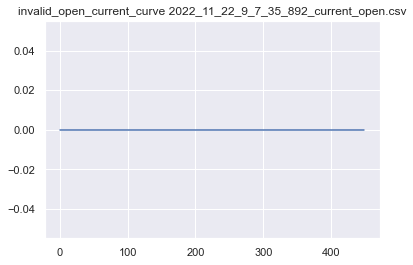

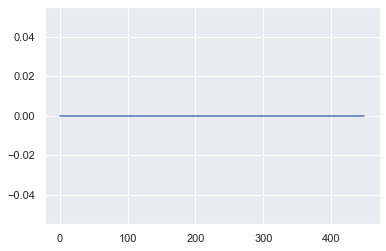

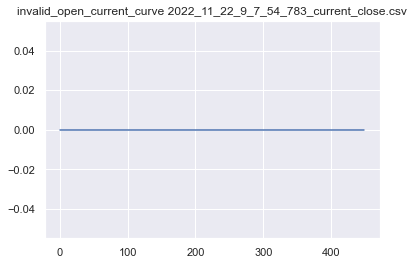

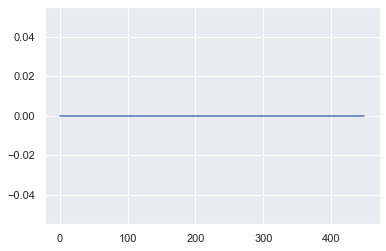

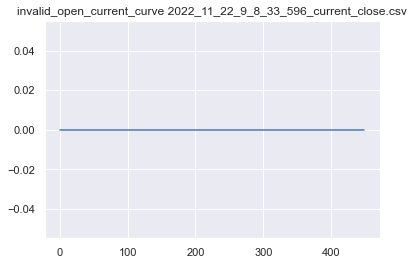

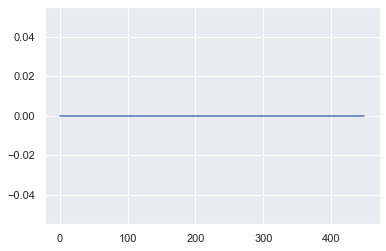

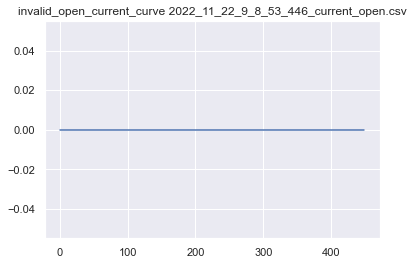

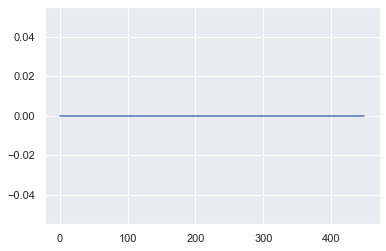

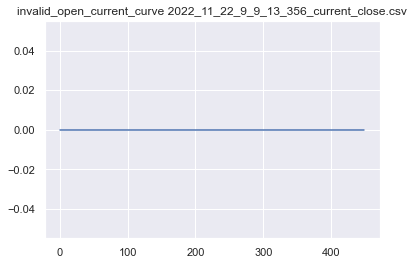

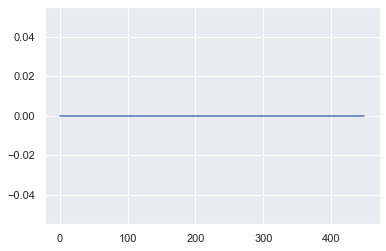

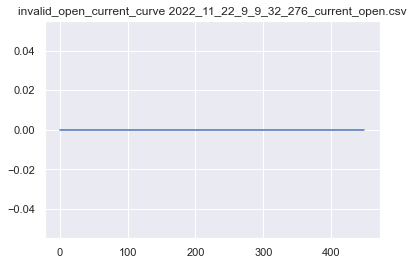

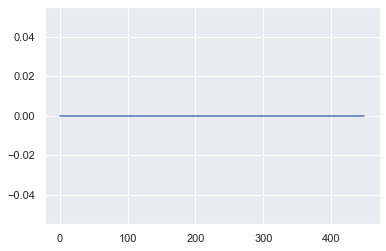

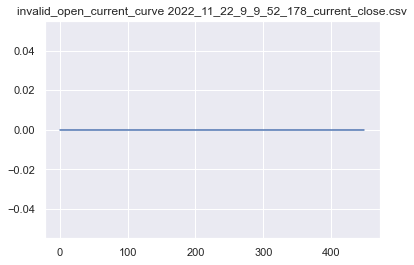

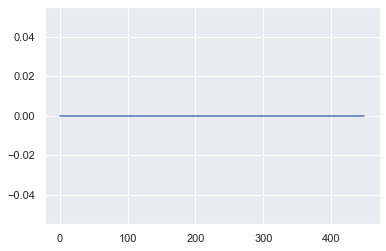

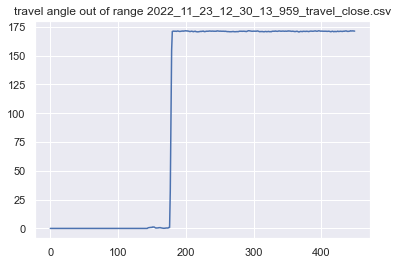

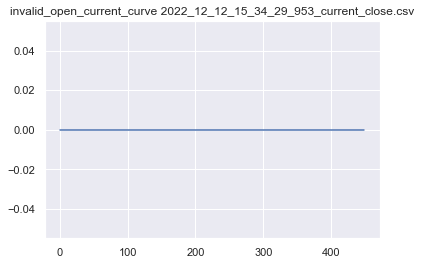

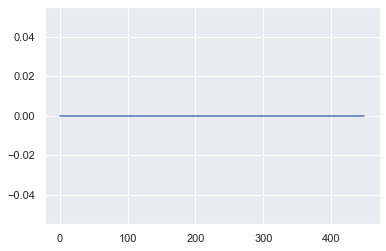

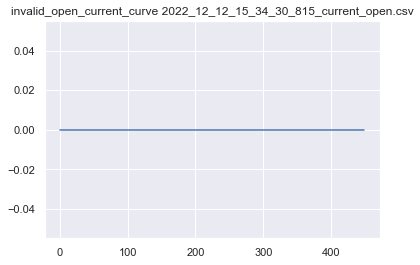

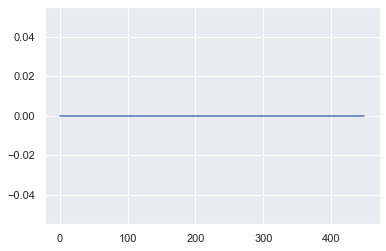

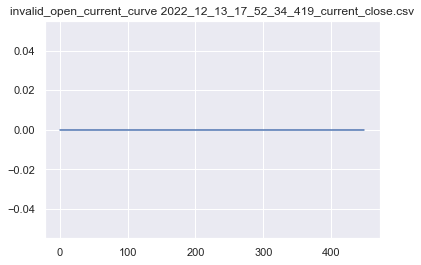

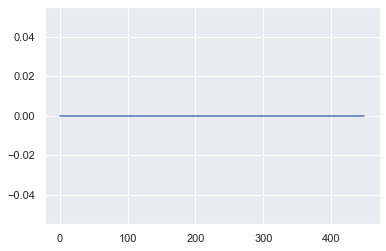

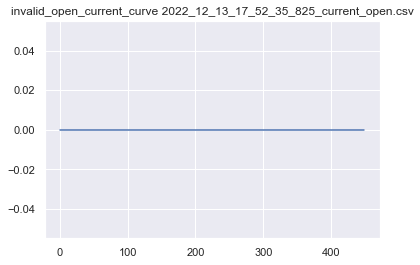

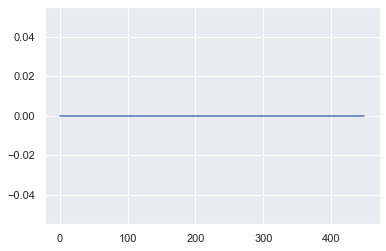

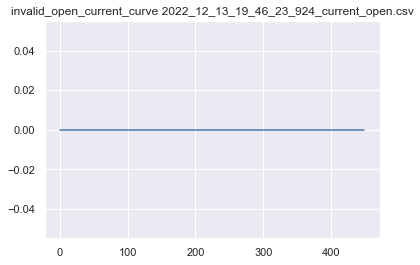

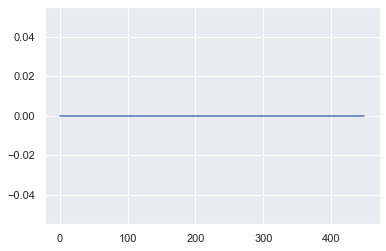

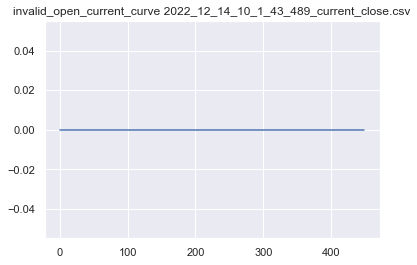

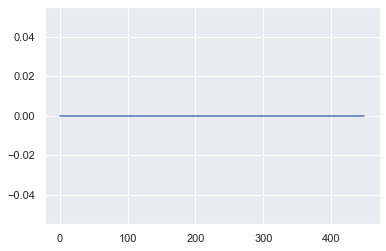

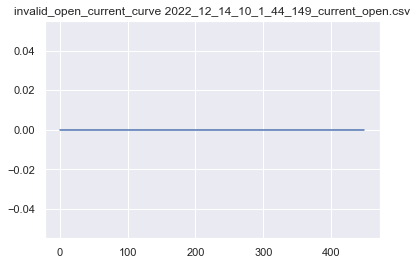

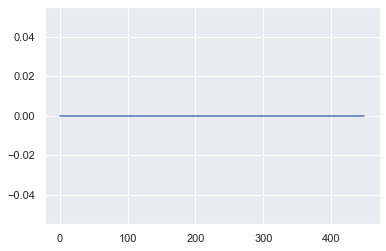

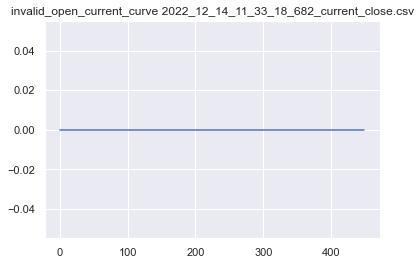

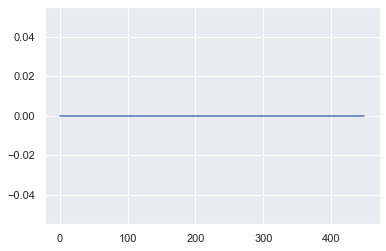

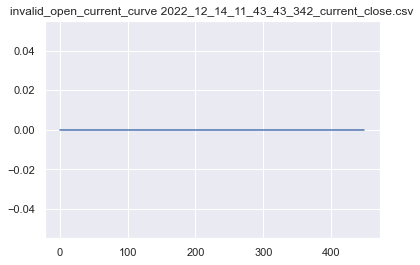

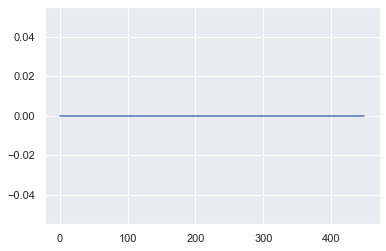

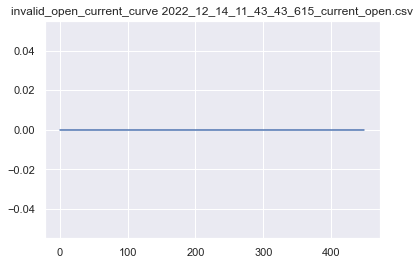

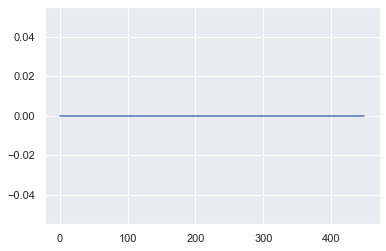

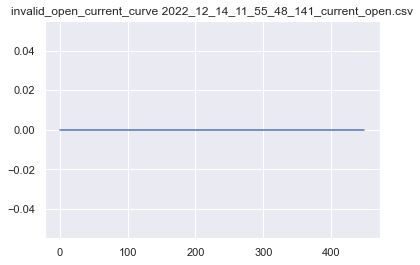

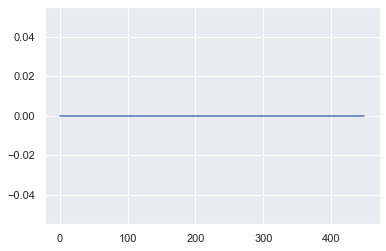

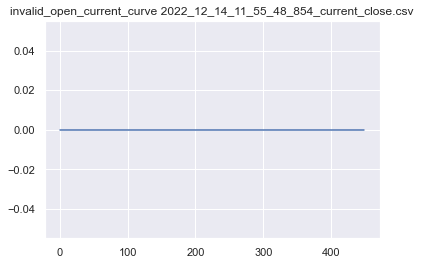

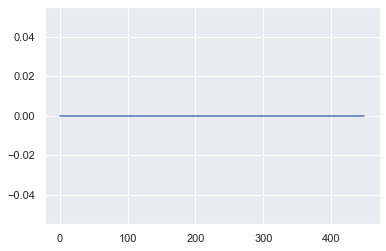

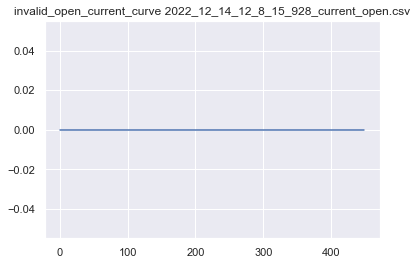

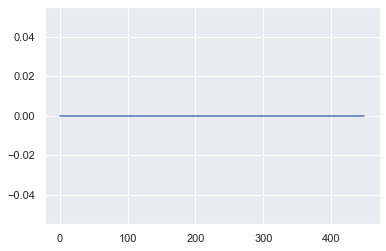

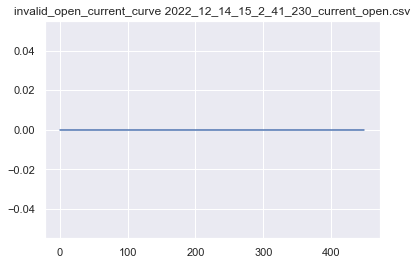

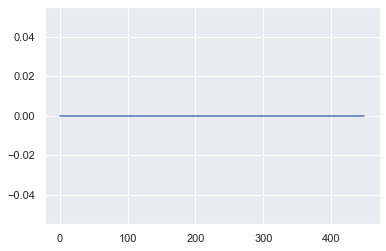

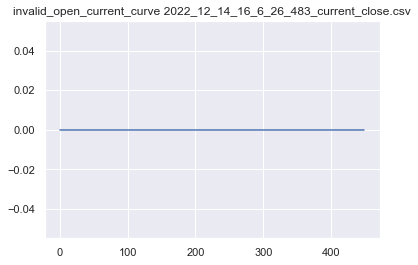

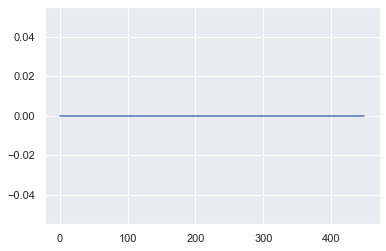

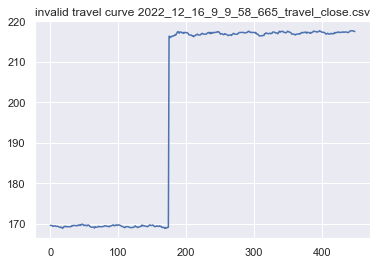

In [6]:
# pamameters for eachy O/C operation are saved in lists
travel_list, travel_invalid_list = [], []
open_spd_list, close_spd_list = [], []
open_rebounce_list, open_overshoot_list, close_overshoot_list = [], [], []
open_time_list, close_time_list, open_cur_list, close_cur_list = [], [], [], []
invalid_count = 0
threshold = 0.1

# search all files
for cur_dir, dirs, files in os.walk(dir_noreclosing_washed):
    for file in files[:]:
        # if file is a travel curve
        if ('travel_open' in file) | ('travel_close' in file):
            case = ME.MechOperMconfig(cur_dir, file, path_config)
            head = np.mean(case.angle_arr[:50])
            tail = np.mean(case.angle_arr[-50:])
            # print(head,tail)
            travel, angle_open, angle_close = case.cal_travel(head=head, tail=tail)
            if (travel <= 60) & (travel >= 30):
                travel_list.append(travel)
                speed = case.cal_speed(travel, angle_close)
                if 0 < speed < 10:
                    if case.oper_type == 'C':
                        close_spd_list.append(speed)
                        overshoot, overshoot_idx = case.cal_overshoot_close(angle_close)
                        close_overshoot_list.append(overshoot)
                        datetime_str = file[:file.find('_travel_close.csv')]
                        # print(datetime_str)
                        file_current_close = datetime_str + '_current_close.csv'
                        # print(file_current_close)
                        if file_current_close in files:
                            # read close coil current data
                            coil_current_df = pd.read_csv(os.path.join(cur_dir, file_current_close),
                                                          header=0)
                            coil_current_arr = np.array(coil_current_df['data'])

                            # calculate current parameters
                            # try:
                            start_ix, end_ix, left_ix, right_ix, current_avg = case.cal_current_avg(coil_current_arr,
                                                                                                    threshold=threshold,
                                                                                                    invalid_title='invalid_open_current_curve {}'.format(
                                                                                                        file_current_close))
                            if 5 > current_avg > 0:
                                close_cur_list.append(current_avg)

                            else:
                                print('close current out of range {}'.format(file_current_close))
                                plt.figure()
                                plt.plot(coil_current_arr)
                            # calculate operation time
                            oper_time = case.cal_op_time(start_ix)
                            close_time_list.append(oper_time)
                            if oper_time > 60:
                                plt.subplots()
                                plt.subplot(2,1,1)
                                plt.plot(case.angle_arr)
                                plt.subplot(2,1,2)
                                plt.plot(coil_current_arr)
                                plt.title('{} operation oper_time > 60'.format(case.datetime_str))
                        else:
                            print('no current curve found {}'.format(file_current_close))


                    elif case.oper_type == 'O':
                        open_spd_list.append(speed)
                        rebounce, rebounce_idx, overshoot, overshoot_idx = case.cal_rebounce_overshoot_open(angle_open)
                        open_rebounce_list.append(rebounce)
                        open_overshoot_list.append(overshoot)
                        datetime_str = file[:file.find('_travel_open.csv')]
                        file_current_open = datetime_str + '_current_open.csv'

                        if file_current_open in files:
                            # read close coil current data
                            coil_current_df = pd.read_csv(os.path.join(cur_dir, file_current_open),
                                                          header=0)
                            coil_current_arr = np.array(coil_current_df['data'])

                            # calculate coil current parameters
                            # try:
                            start_ix, end_ix, left_ix, right_ix, current_avg = case.cal_current_avg(coil_current_arr,
                                                                                                    threshold=threshold,
                                                                                                    invalid_title='invalid_open_current_curve {}'.format(
                                                                                                        file_current_open))
                            if 5 > current_avg > 0:
                                open_cur_list.append(current_avg)

                            else:
                                print('open current out of range {}'.format(file_current_open))
                                plt.figure()
                                plt.plot(coil_current_arr)

                            # calculate operation time
                            oper_time = case.cal_op_time(start_ix)
                            open_time_list.append(oper_time)
                            if oper_time > 60:
                                plt.subplots()
                                plt.subplot(2,1,1)
                                plt.plot(case.angle_arr)
                                plt.subplot(2,1,2)
                                plt.plot(coil_current_arr)
                                plt.title('{} operation oper_time > 60'.format(case.datetime_str))
                            else:
                                pass
                        else:
                            print('no current curve found {}'.format(file_current_open))
                    else:
                        pass
                else:
                    print('speed is out of range: ', speed)
                    invalid_count += 1
                    plt.figure()
                    plt.title('invalid travel curve {}'.format(file))
                    plt.plot(case.angle_arr)
            else:
                invalid_count += 1
                plt.figure()
                plt.title('travel angle out of range {}'.format(file))
                plt.plot(case.angle_arr)

travel_arr = np.array(travel_list)
open_spd_arr = np.array(open_spd_list)
close_spd_arr = np.array(close_spd_list)
open_rebounce_arr = np.array(open_rebounce_list)
open_overshoot_arr = np.array(open_overshoot_list)
close_overshoot_arr = np.array(close_overshoot_list)
open_time_arr = np.array(open_time_list)
close_time_arr = np.array(close_time_list)
open_cur_arr = np.array(open_cur_list)
close_cur_arr = np.array(close_cur_list)

## 3.1_Travel

---------------------------------------------------------------------------------------------------
para              std     start   end     max     mean    median  min     span    alm_u   alm_l   
---------------------------------------------------------------------------------------------------
travel            0.69    47.34   48.22   49.19   47.74   47.70   46.08   3.10    59.00   41.00   


c:\users\cnbofan1\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\cnbofan1\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


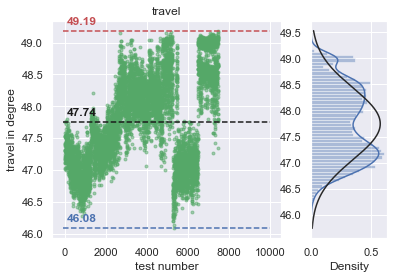

In [19]:

print('---------------------------------------------------------------------------------------------------')
print('{:<18}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}'.format('para', 'std',
                                                                        'start', 'end',
                                                                        'max', 'mean',
                                                                        'median', 'min',
                                                                        'span', 'alm_u',
                                                                        'alm_l'))
print('---------------------------------------------------------------------------------------------------')
ME.MechOperMconfig.para_dist_plot(travel_arr,
                                  title='travel',
                                  ylabel='travel in degree')


## 3.2_open/close speed

---------------------------------------------------------------------------------------------------
para              std     start   end     max     mean    median  min     span    alm_u   alm_l   
---------------------------------------------------------------------------------------------------
open speed        0.71    2.35    1.67    4.17    1.88    1.93    0.46    3.71    49.00   51.00   
close speed       0.62    5.16    4.79    6.09    4.74    4.50    3.50    2.59    36.00   64.00   


c:\users\cnbofan1\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\cnbofan1\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
c:\users\cnbofan1\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

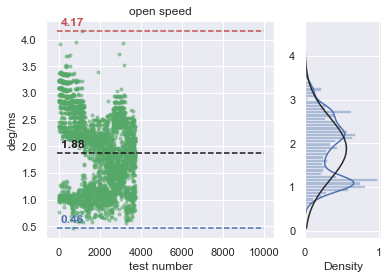

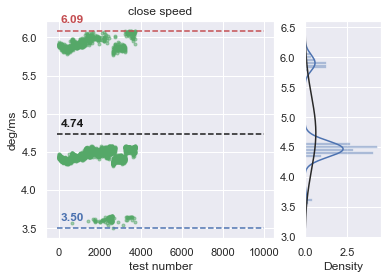

In [20]:
print('---------------------------------------------------------------------------------------------------')
print('{:<18}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}'.format('para', 'std',
                                                                        'start', 'end',
                                                                        'max', 'mean',
                                                                        'median', 'min',
                                                                        'span', 'alm_u',
                                                                        'alm_l'))
print('---------------------------------------------------------------------------------------------------')
ME.MechOperMconfig.para_dist_plot(open_spd_arr,
                                  title='open speed',
                                  ylabel='deg/ms')
ME.MechOperMconfig.para_dist_plot(close_spd_arr,
                                  title='close speed',
                                  ylabel='deg/ms')

## 3.3_Open/close rebounce & overshoot

---------------------------------------------------------------------------------------------------
para              std     start   end     max     mean    median  min     span    alm_u   alm_l   
---------------------------------------------------------------------------------------------------
open rebounce     1.12    3.12    0.86    4.45    1.44    0.89    0.18    4.26    31.00   69.00   
open overshoot    0.30    0.00    0.65    3.64    0.14    0.00    0.00    3.64    100.00  0.00    


c:\users\cnbofan1\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\cnbofan1\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
c:\users\cnbofan1\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

close overshoot   0.43    3.88    3.22    4.67    3.26    3.24    2.05    2.62    30.00   70.00   


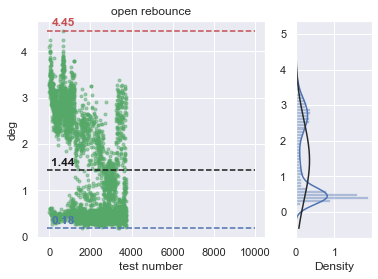

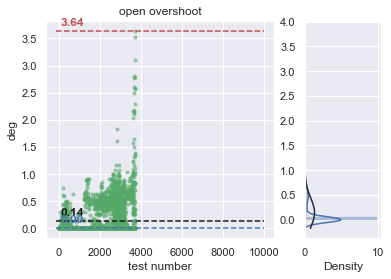

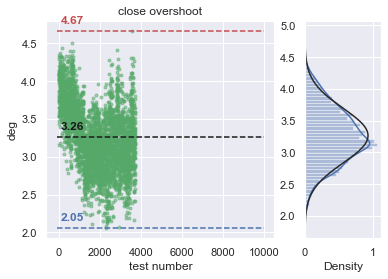

In [8]:
print('---------------------------------------------------------------------------------------------------')
print('{:<18}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}'.format('para', 'std',
                                                                        'start', 'end',
                                                                        'max', 'mean',
                                                                        'median', 'min',
                                                                        'span', 'alm_u',
                                                                        'alm_l'))
print('---------------------------------------------------------------------------------------------------')
ME.MechOperMconfig.para_dist_plot(open_rebounce_arr,
                                  title='open rebounce',
                                  ylabel='deg')
ME.MechOperMconfig.para_dist_plot(open_overshoot_arr,
                                  title='open overshoot',
                                  ylabel='deg')
ME.MechOperMconfig.para_dist_plot(close_overshoot_arr,
                                  title='close overshoot',
                                  ylabel='deg')

## 3.4_Open/close time

---------------------------------------------------------------------------------------------------
para              std     start   end     max     mean    median  min     span    alm_u   alm_l   
---------------------------------------------------------------------------------------------------
open time         7.54    23.06   24.80   68.80   28.73   24.80   21.60   47.20   97.00   3.00    


c:\users\cnbofan1\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\cnbofan1\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
c:\users\cnbofan1\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

close time        5.37    33.06   32.70   75.20   35.28   34.00   12.00   63.20   67.00   33.00   


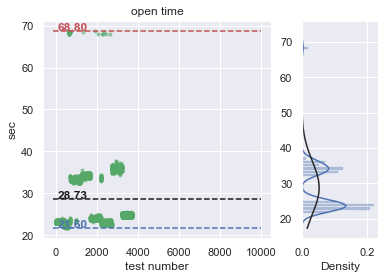

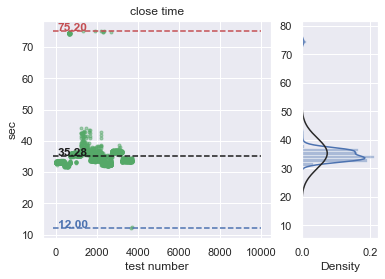

In [9]:
print('---------------------------------------------------------------------------------------------------')
print('{:<18}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}'.format('para', 'std',
                                                                        'start', 'end',
                                                                        'max', 'mean',
                                                                        'median', 'min',
                                                                        'span', 'alm_u',
                                                                        'alm_l'))
print('---------------------------------------------------------------------------------------------------')
ME.MechOperMconfig.para_dist_plot(open_time_arr,
                                  title='open time',
                                  ylabel='sec')
ME.MechOperMconfig.para_dist_plot(close_time_arr,
                                  title='close time',
                                  ylabel='sec')

## 3.5_Open/close coil current

---------------------------------------------------------------------------------------------------
para              std     start   end     max     mean    median  min     span    alm_u   alm_l   
---------------------------------------------------------------------------------------------------
open current avg  0.55    3.37    3.26    3.65    2.93    3.25    2.20    1.45    19.00   81.00   
close current avg 0.35    3.53    3.39    3.86    3.24    3.36    2.29    1.57    21.00   79.00   


c:\users\cnbofan1\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\cnbofan1\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
c:\users\cnbofan1\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

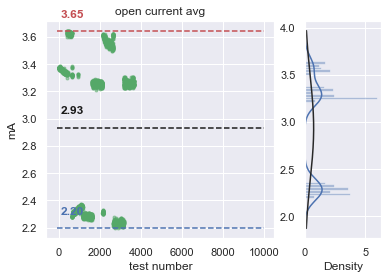

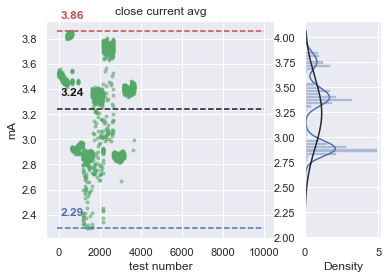

In [3]:
print('---------------------------------------------------------------------------------------------------')
print('{:<18}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}'.format('para', 'std',
                                                                        'start', 'end',
                                                                        'max', 'mean',
                                                                        'median', 'min',
                                                                        'span', 'alm_u',
                                                                        'alm_l'))
print('---------------------------------------------------------------------------------------------------')
ME.MechOperMconfig.para_dist_plot(open_cur_arr,
                                  title='open current avg',
                                  ylabel='mA')
ME.MechOperMconfig.para_dist_plot(close_cur_arr,
                                  title='close current avg',
                                  ylabel='mA')

## 3.6_Motor_Current_average/Motor_Charging_Time

invalid curve file name: 2022_11_22_8_58_15_575_current_motor.csv
invalid curve file name: 2022_11_22_8_58_48_551_current_motor.csv
invalid curve file name: 2022_11_22_8_58_55_983_current_motor.csv
invalid curve file name: 2022_11_22_8_58_9_823_current_motor.csv
invalid curve file name: 2022_11_22_8_59_28_441_current_motor.csv
invalid curve file name: 2022_11_22_8_59_34_772_current_motor.csv
invalid curve file name: 2022_11_22_9_0_13_462_current_motor.csv
invalid curve file name: 2022_11_22_9_0_46_79_current_motor.csv
invalid curve file name: 2022_11_22_9_0_52_210_current_motor.csv
invalid curve file name: 2022_11_22_9_0_7_234_current_motor.csv
invalid curve file name: 2022_11_22_9_10_2_251_current_motor.csv
invalid curve file name: 2022_11_22_9_10_35_27_current_motor.csv
invalid curve file name: 2022_11_22_9_10_41_64_current_motor.csv
invalid curve file name: 2022_11_22_9_11_15_796_current_motor.csv
invalid curve file name: 2022_11_22_9_11_21_927_current_motor.csv
invalid curve file n

c:\users\cnbofan1\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


invalid curve file name: 2022_11_22_9_15_55_279_current_motor.csv
invalid curve file name: 2022_11_22_9_16_29_155_current_motor.csv
invalid curve file name: 2022_11_22_9_16_35_87_current_motor.csv
invalid curve file name: 2022_11_22_9_17_14_878_current_motor.csv
invalid curve file name: 2022_11_22_9_17_47_755_current_motor.csv
invalid curve file name: 2022_11_22_9_17_53_685_current_motor.csv
invalid curve file name: 2022_11_22_9_17_8_943_current_motor.csv
invalid curve file name: 2022_11_22_9_18_27_522_current_motor.csv
invalid curve file name: 2022_11_22_9_18_33_454_current_motor.csv
invalid curve file name: 2022_11_22_9_19_12_302_current_motor.csv
invalid curve file name: 2022_11_22_9_19_45_140_current_motor.csv
invalid curve file name: 2022_11_22_9_19_51_70_current_motor.csv
invalid curve file name: 2022_11_22_9_19_6_350_current_motor.csv
invalid curve file name: 2022_11_22_9_1_26_870_current_motor.csv
invalid curve file name: 2022_11_22_9_1_32_99_current_motor.csv
invalid curve fil

Text(0.5, 1.0, 'motor current curves, total number: 3674/3795')

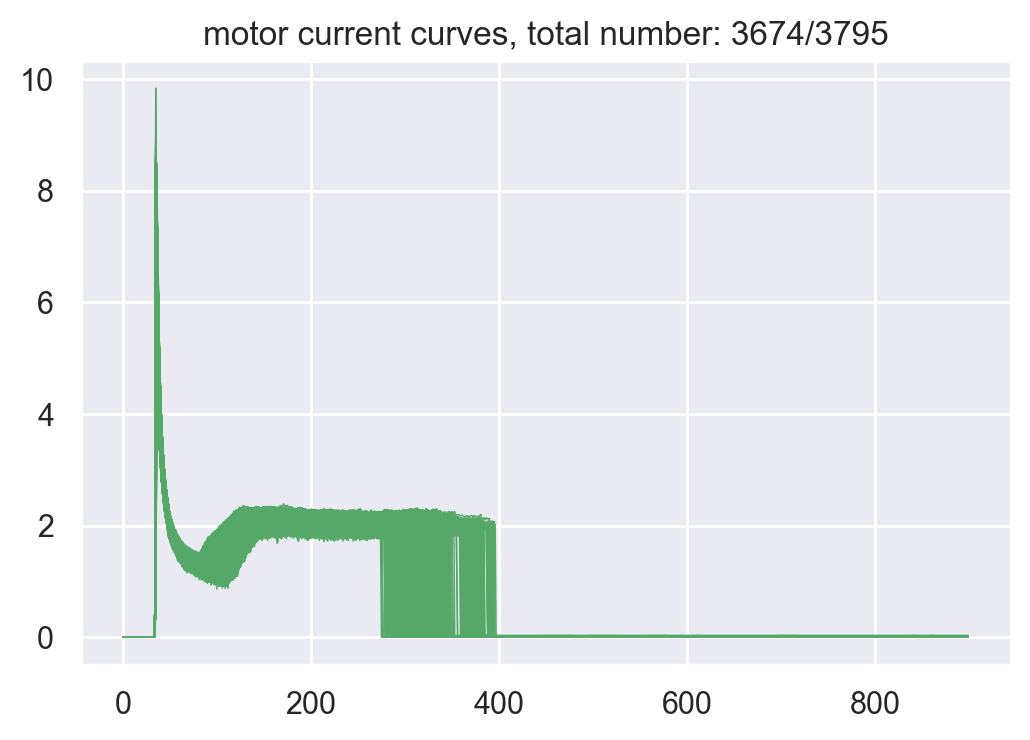

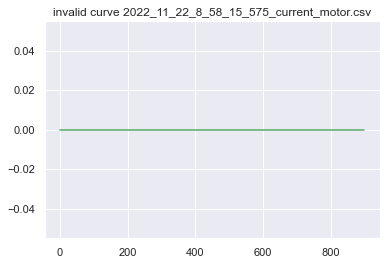

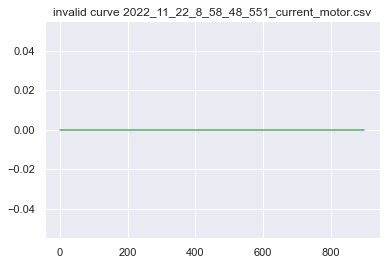

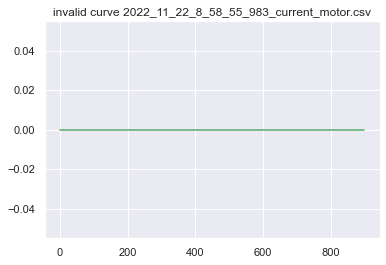

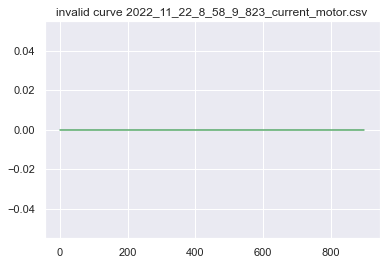

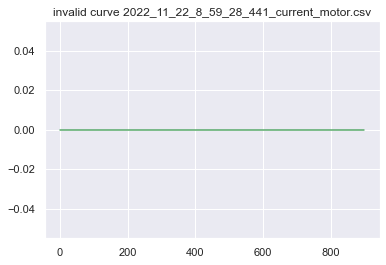

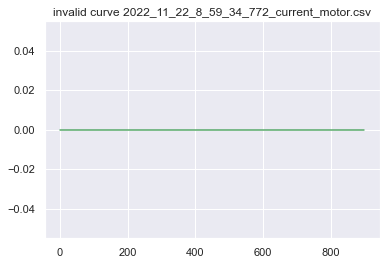

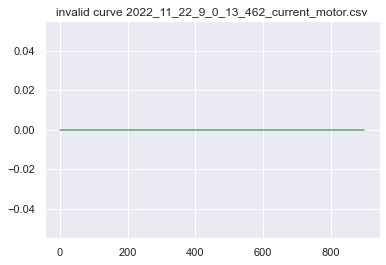

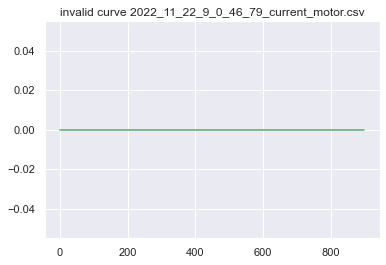

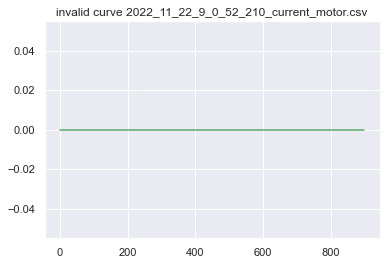

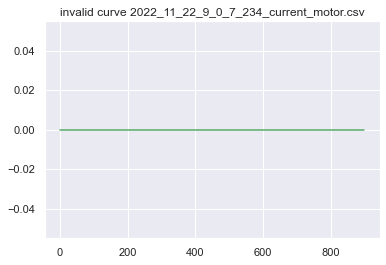

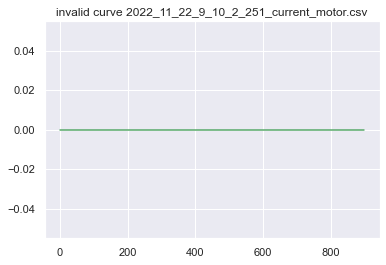

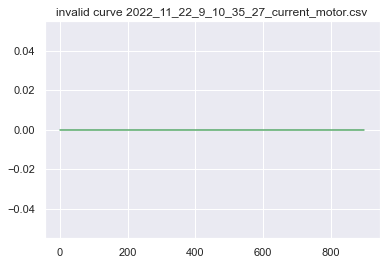

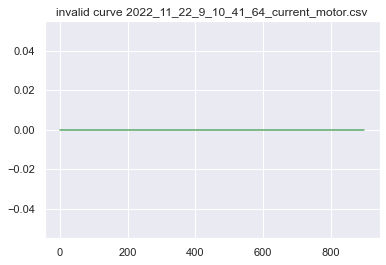

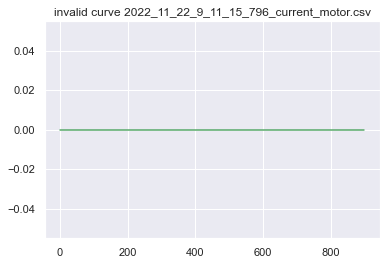

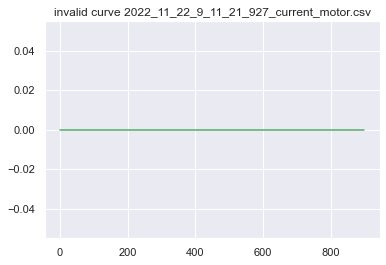

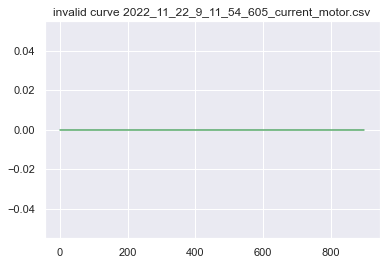

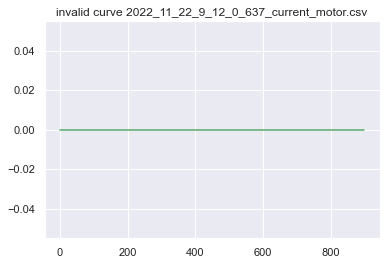

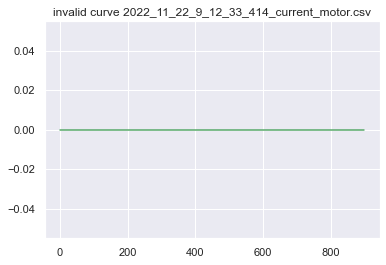

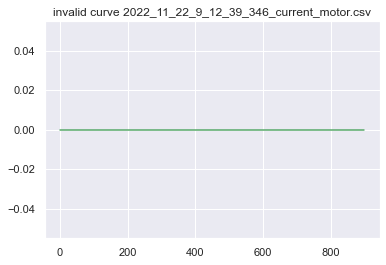

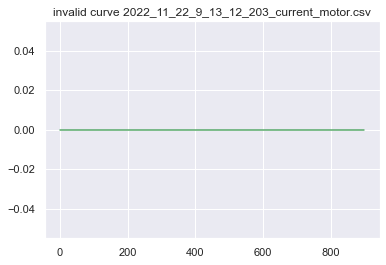

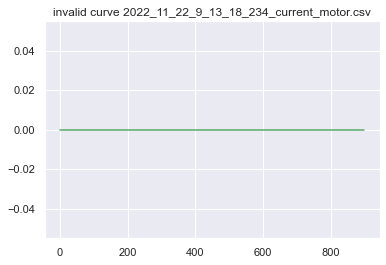

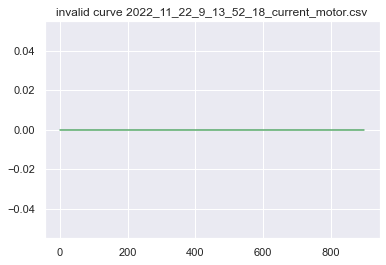

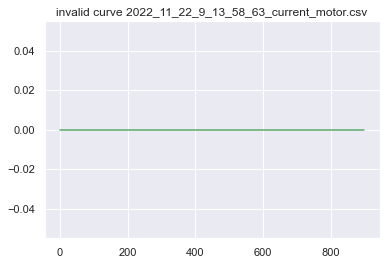

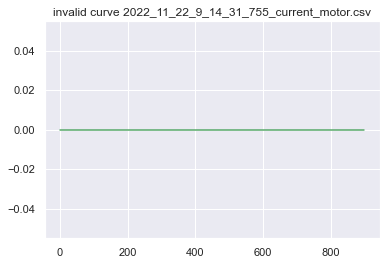

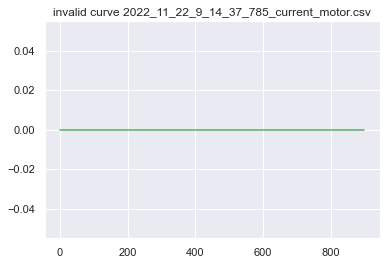

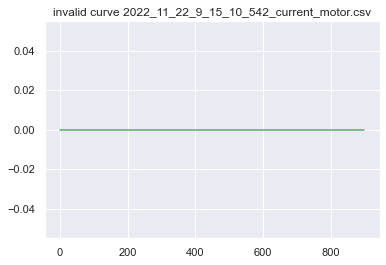

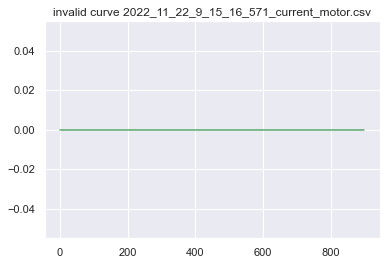

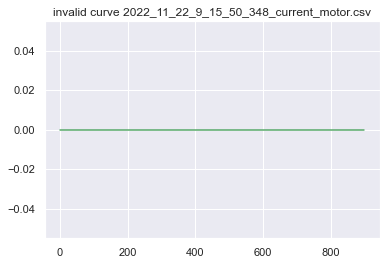

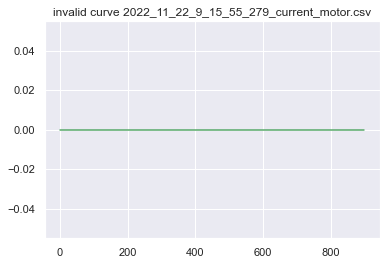

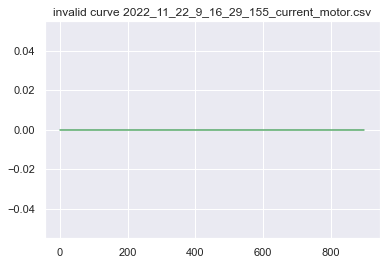

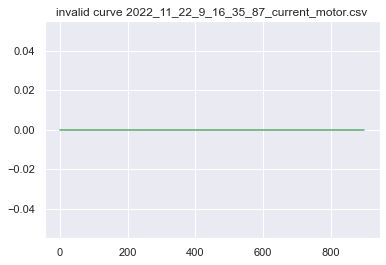

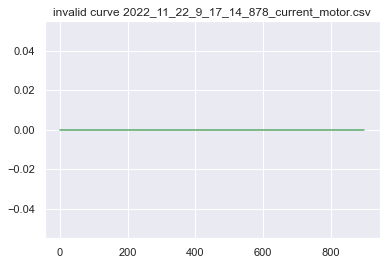

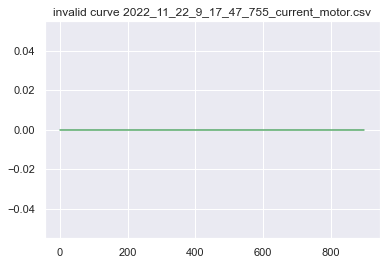

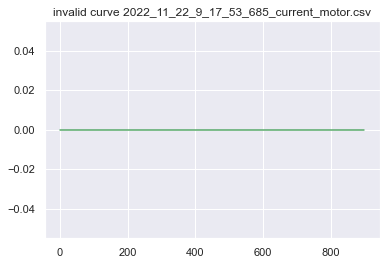

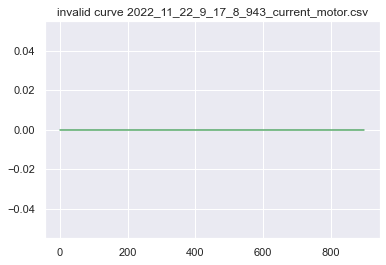

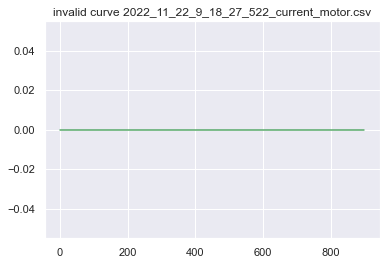

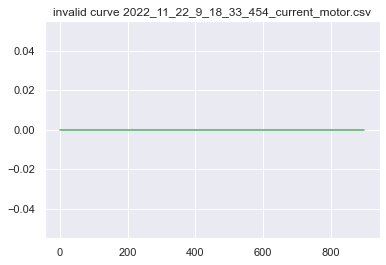

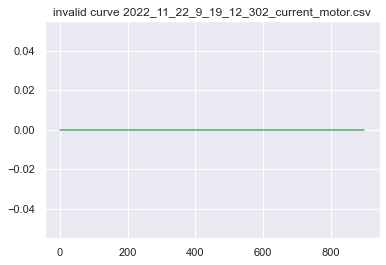

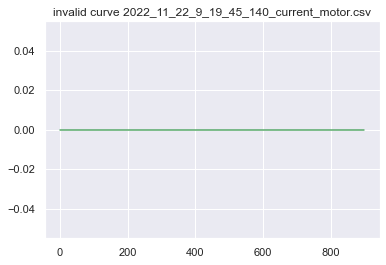

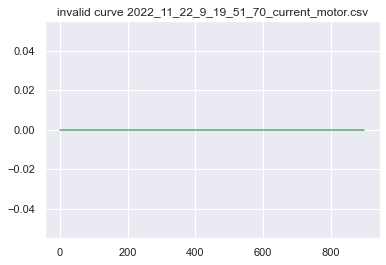

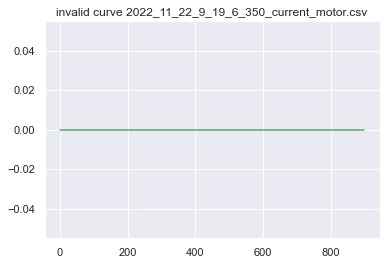

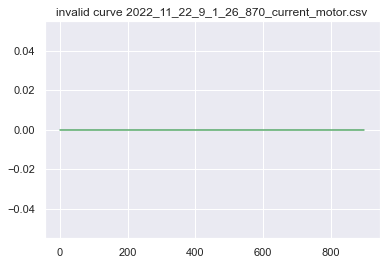

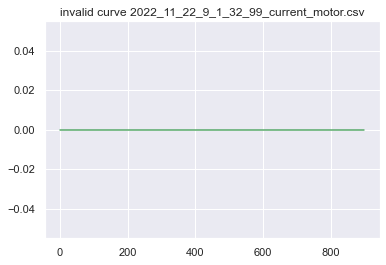

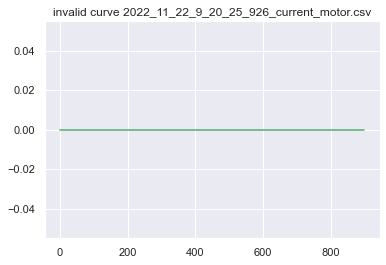

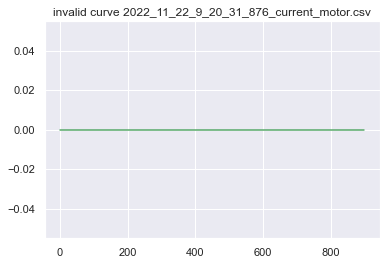

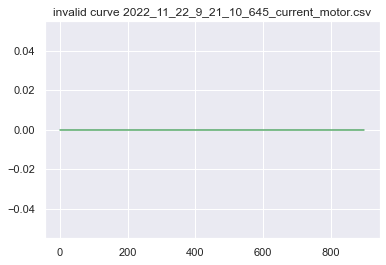

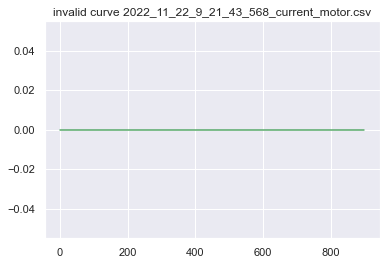

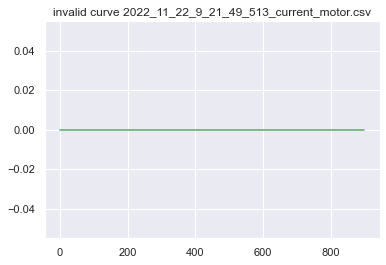

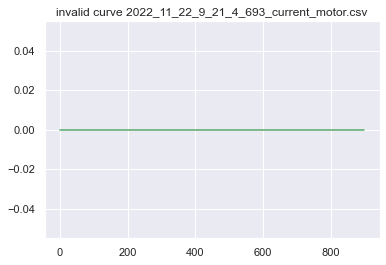

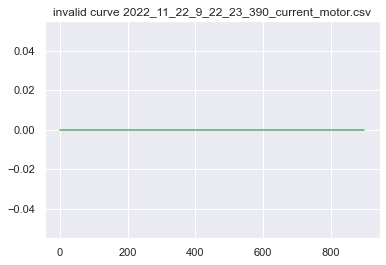

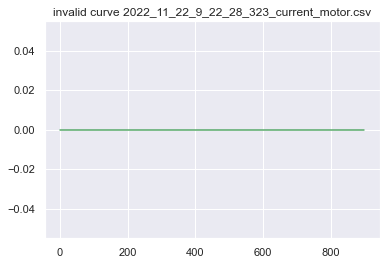

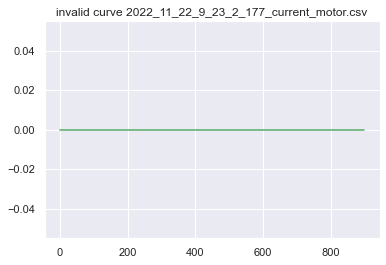

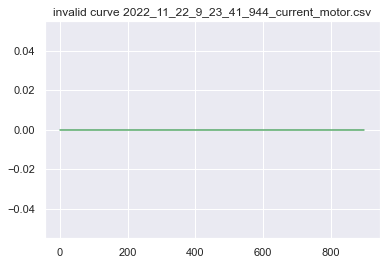

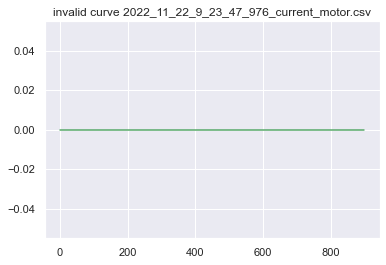

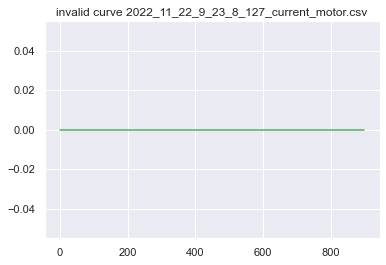

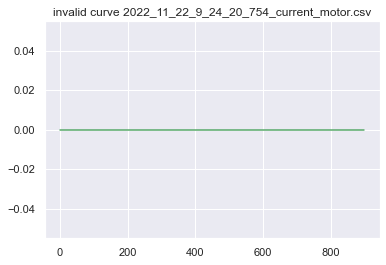

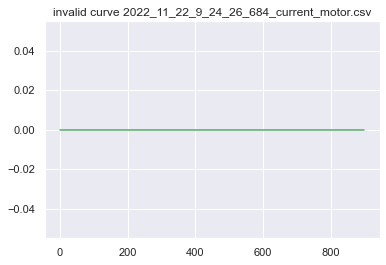

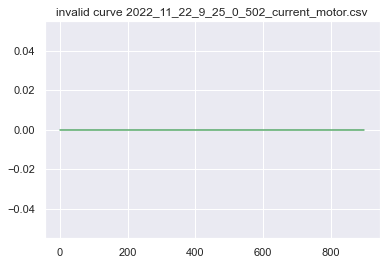

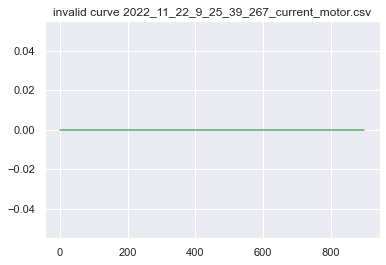

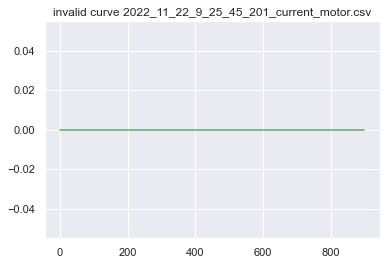

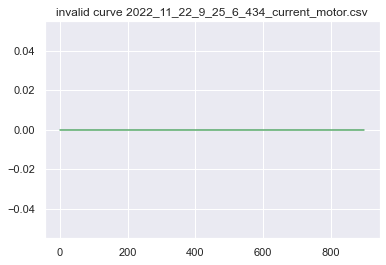

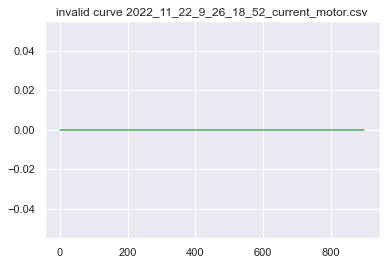

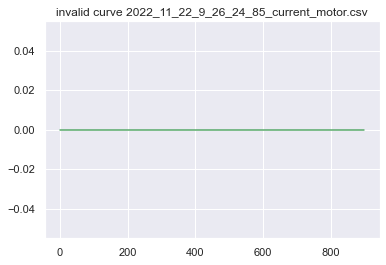

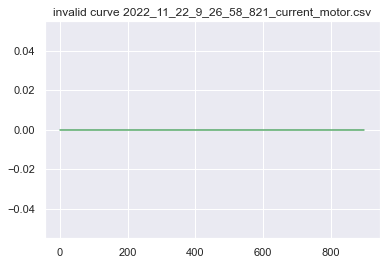

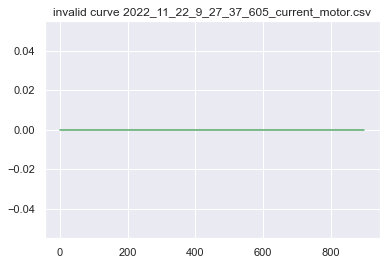

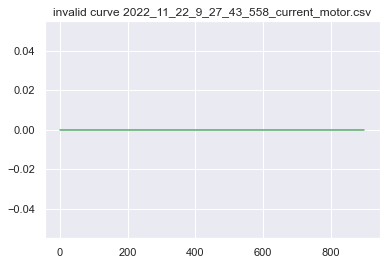

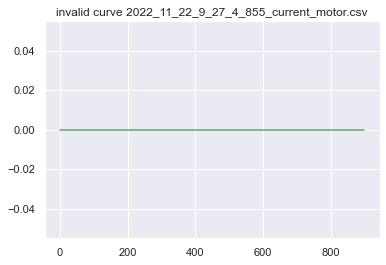

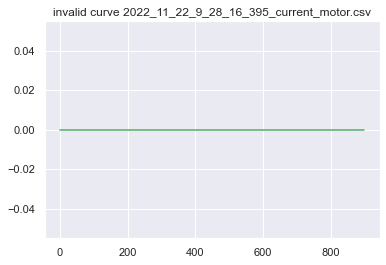

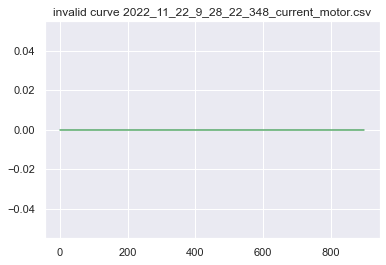

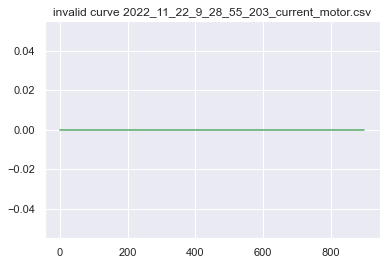

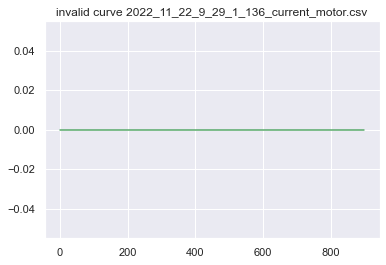

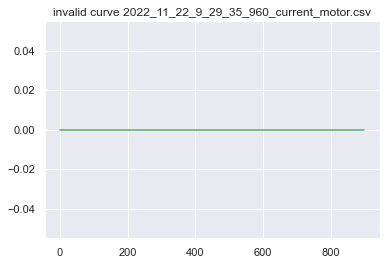

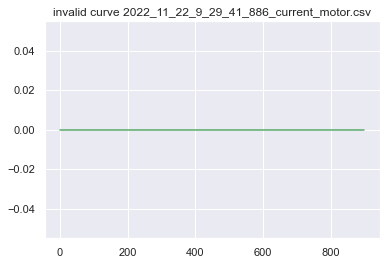

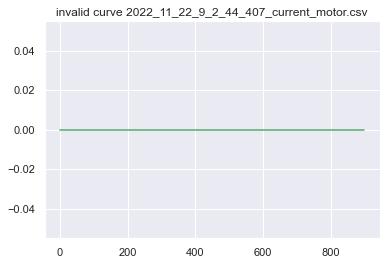

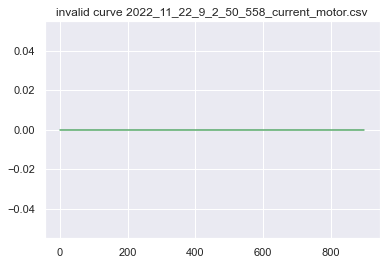

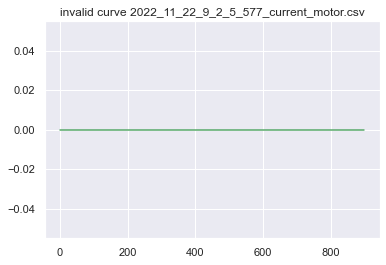

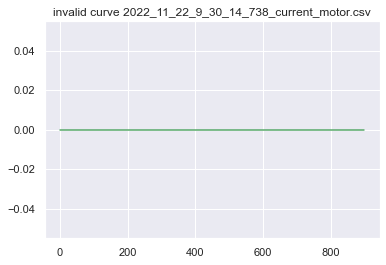

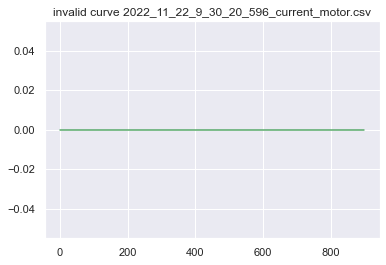

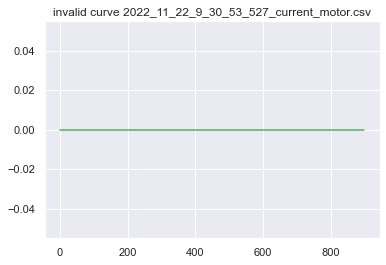

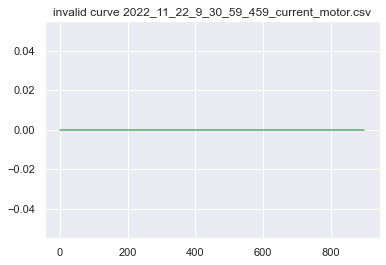

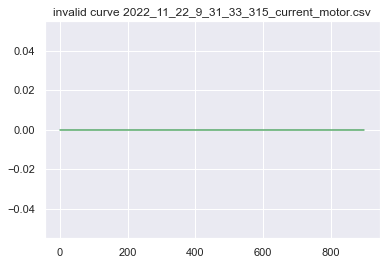

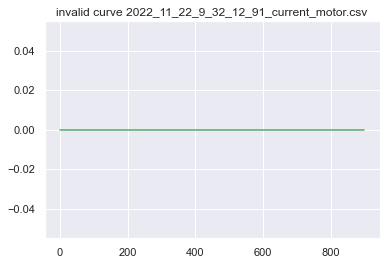

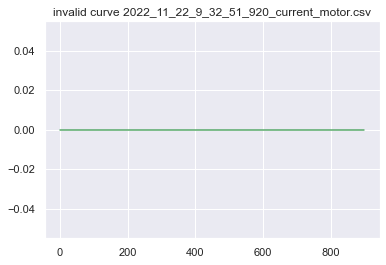

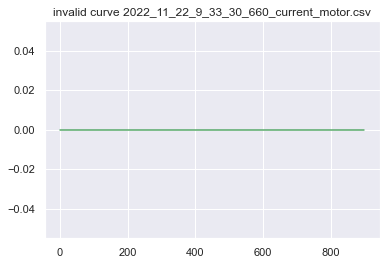

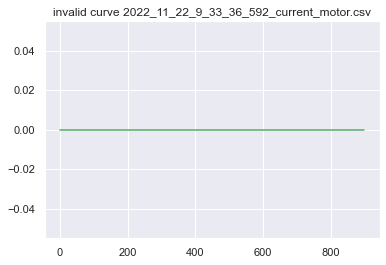

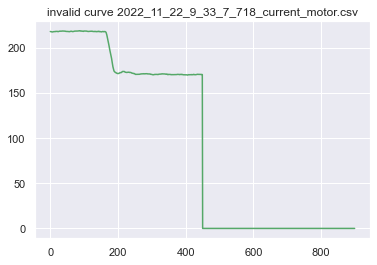

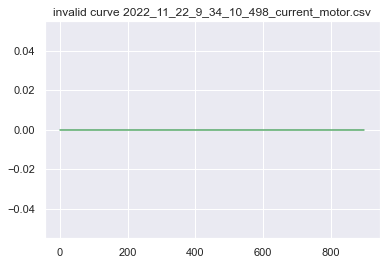

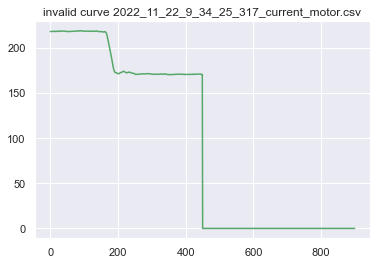

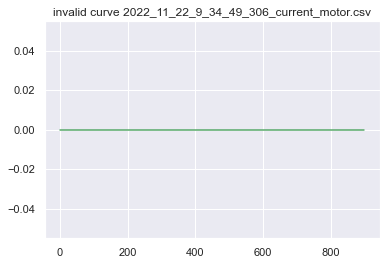

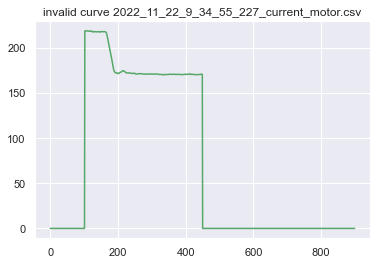

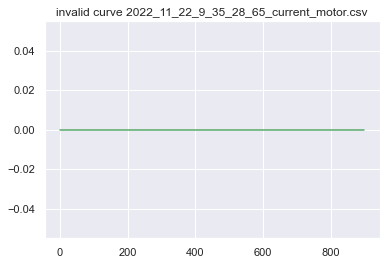

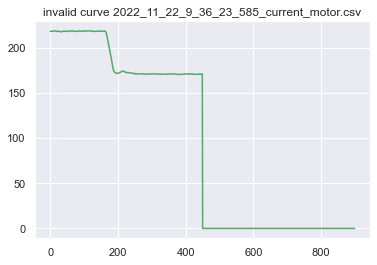

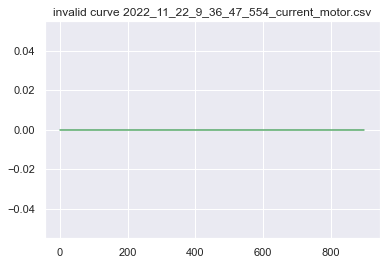

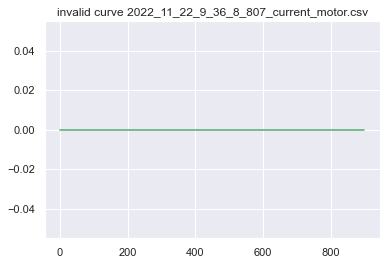

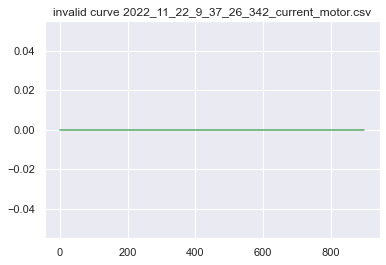

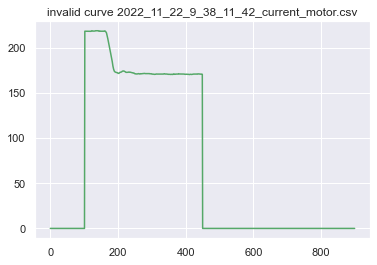

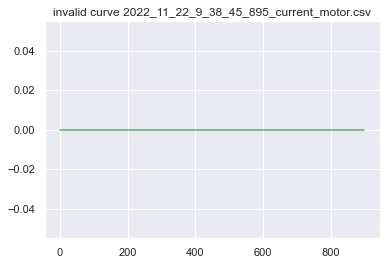

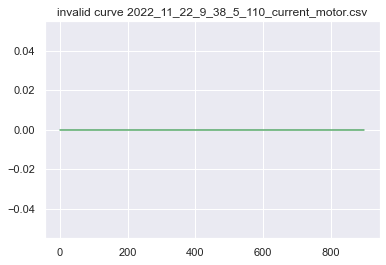

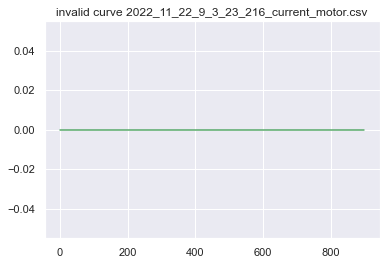

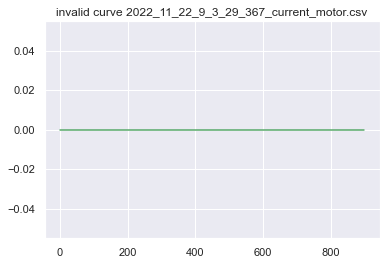

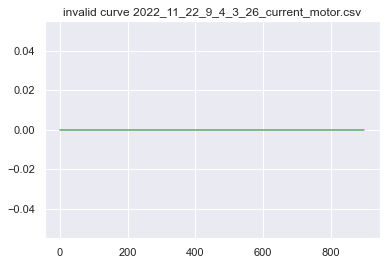

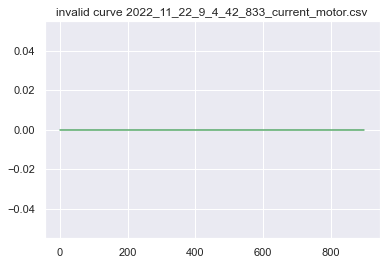

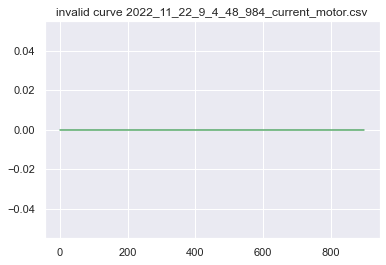

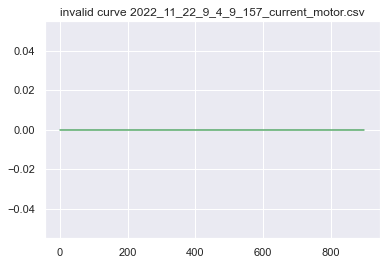

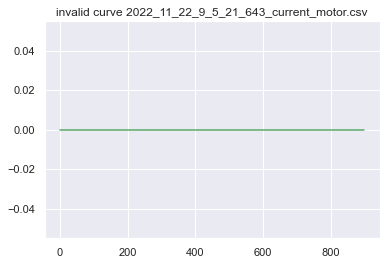

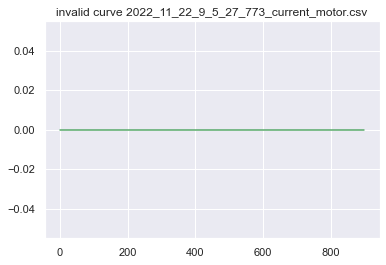

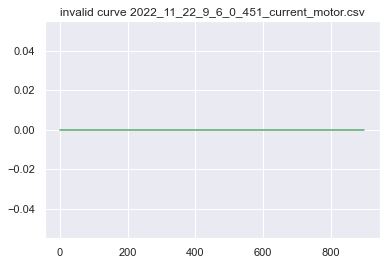

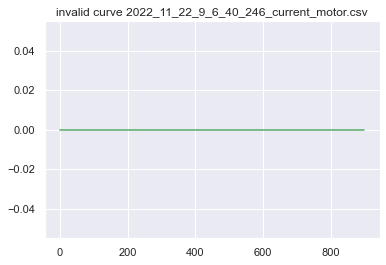

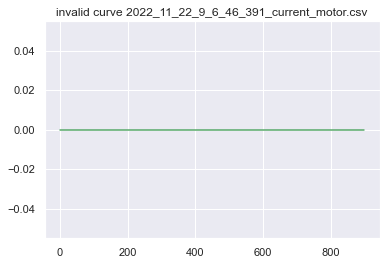

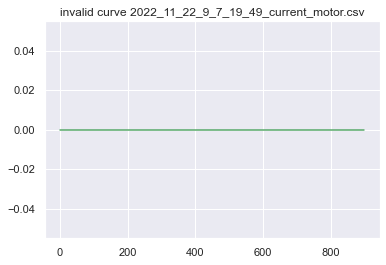

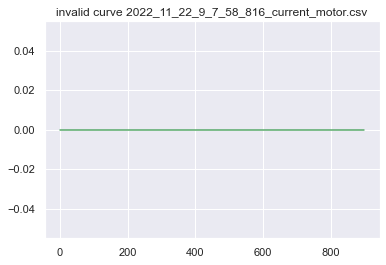

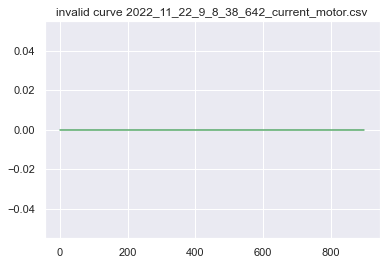

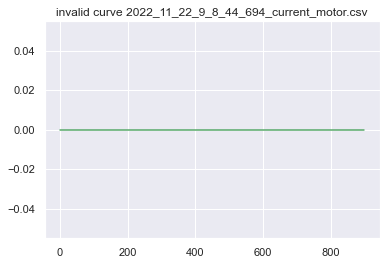

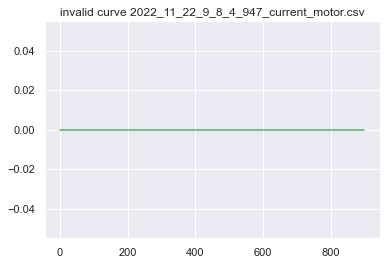

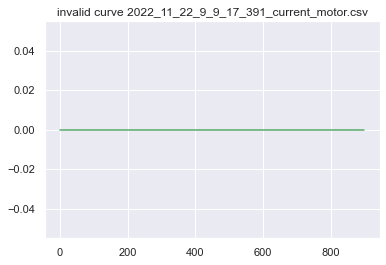

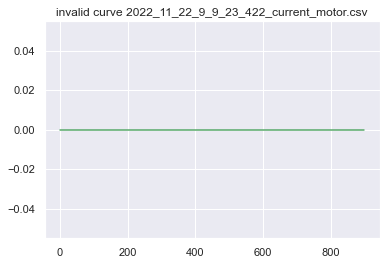

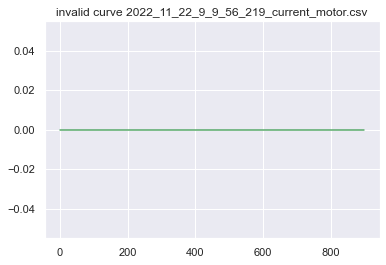

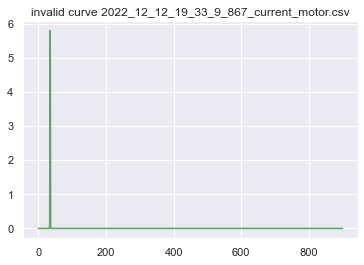

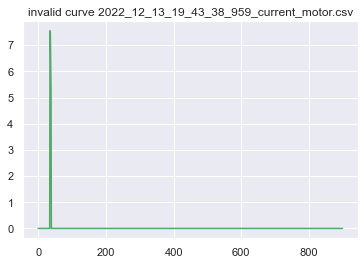

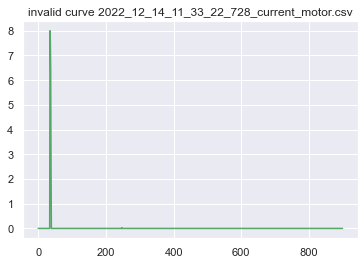

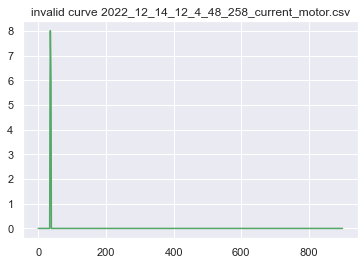

In [3]:
count_motor_current = 0
count_valid_motor_current = 0
fig, ax = plt.subplots(dpi=200)
motor_current_list, charge_time_list = [], []
for cur_dir, dirs, files in os.walk(dir_noreclosing_washed):

    # plot motor current curve
    for file in files[:]:

        if 'current_motor' in file:
            case = ME.MechOperMconfig(cur_dir, file, path_config)
            count_motor_current += 1
            motor_current_df = pd.read_csv(os.path.join(cur_dir, file), header=0)
            motor_current_arr = np.array(motor_current_df['data'])
            start_ix, end_ix, left_ix, right_ix, current_avg, charge_time = case.cal_motor_para(motor_current_arr, invalid_title='invalid_motor_current_curve {}'.format(file))
            if 1 < current_avg < 5:
                count_valid_motor_current += 1
                ax.plot(motor_current_arr,
                        c='g',
                        linewidth=0.5)
                motor_current_list.append(current_avg)
                charge_time_list.append(charge_time)
            else:
                print('invalid curve file name:', file)
                plt.figure()
                plt.plot(motor_current_arr,
                         c='g')
                plt.title('invalid curve {}'.format(file))
        else:
            pass

ax.set_title('motor current curves, total number: {}/{}'.format(count_valid_motor_current, count_motor_current))

#### calculation result

---------------------------------------------------------------------------------------------------
para              std     start   end     max     mean    median  min     span    alm_u   alm_l   
---------------------------------------------------------------------------------------------------
motor current     0.10    2.19    1.80    2.23    1.88    1.84    1.68    0.55    9.00    91.00   
charge time       0.66    5.93    5.53    7.22    6.01    5.83    4.78    2.44    53.00   47.00   


c:\users\cnbofan1\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\cnbofan1\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
c:\users\cnbofan1\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

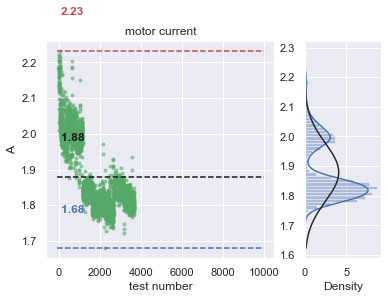

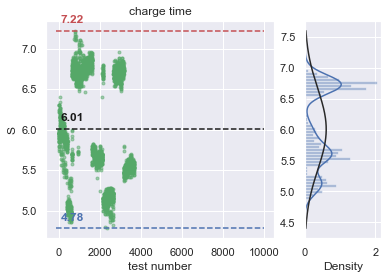

In [5]:
print('---------------------------------------------------------------------------------------------------')
print('{:<18}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}'.format('para', 'std',
                                                                        'start', 'end',
                                                                        'max', 'mean',
                                                                        'median', 'min',
                                                                        'span', 'alm_u',
                                                                        'alm_l'))
print('---------------------------------------------------------------------------------------------------')
ME.MechOperMconfig.para_dist_plot(motor_current_list,
                                  title='motor current',
                                  ylabel='A')
ME.MechOperMconfig.para_dist_plot(charge_time_list,
                                  title='charge time',
                                  ylabel='S')